# Problem Statement
Breast Cancer is a significant global health burden, with high morbidity and mortality rates arising from its development and progression to Advanced Breast Cancer. Despite advances in treatment and early detection, understanding the complex interplay of factors associated with advanced breast cancer progression remains a challenge. To address this gap, this research aims to systematically investigate and identify the various factors contributing to progression of advanced breast cancer.


Research topic:
Exploring the impact of age,race and imaging biomarkers on advanced breast cancer risk.

### Objectives:

*   To comprehensively review existing literature on known factors associated with advanced breast cancer.
*   To analyze and evaluate the independent and combined effects of imaging biomarkers, social factors; age, race and others on advanced breast cancer development.
*   To develop predictive models to quantify individualized risk profiles for advanced breast cancer.
*   To provide actionable insights for preventive strategies, early detection, and personalized interventions to mitigate advanced breast cancer risk.

#### Data Definition

###### Attribute Information for review and analysis:

* age_group_5_years : Age of participants grouped by 5 year range(1 = Age 18-29, 2 = Age 30-34, 3 = Age 35-39, 4 = Age 40-44, 5 = Age 45-49, 6 = Age 50-54, 7 = Age 55-59, 8 = Age 60-64, 9 = Age 65-69, 10 = Age 70-74, 11 = Age 75-79, 12 = Age 80-84, 13 = Age >85)

* race_eth : Racial classification (1 = Non-Hispanic white, 2 = Non-Hispanic black, 3 = Asian/Pacific Islander, 4 = Native American, 5 = Hispanic, 6 = Other/mixed, 9 = Unknown)

* BIRADS_breast_density: Breast imaging result grouping (1 = Almost entirely fat, 2 = Scattered fibroglandular densities, 3 = Heterogeneously dense, 4 = Extremely dense, 9 = Unknown or different measurement system)

* first_degree_hx: History of breast cancer in a first degree relative (0 = No, 1 = Yes, 9 = Unknown)

* breast_cancer_history : Prior breast cancer diagnosis (0 = No, 1 = Yes, 9 = Unknown)

* age_menarche: Age at menarche (0 = Age >14, 1 = Age 12-13, 2 = Age <12, 9 = Unknown)

* current_hrt: Patient use of hormone replacement therapy (0 = No, 1 = Yes, 9 = Unknown)

* menopaus: Menopausal status (1 = Pre- or peri-menopausal, 2 = Post-menopausal, 3 = Surgical menopause, 9 = Unknown)

* agegrp : Age at mammogram(40-49,50-59,60-69,70-74)

* density_c: Breast imaging category (a = almost entirely fatty, b = scattered fibroglandular densities, c = heterogeneously dense, d = extremely dense)

* examyear_cat: Year of mammogram (2005-2008, 2009-2010, 2011-2012, 2013-2014, 2015-2017)

* riskBCSC_v2_5y_cat: BCSC 5-year risk score category (0 to <1.00, 1.00 to 1.66, 1.67 to 2.49, 2.50 to 3.99, ≥4.00, unknown)

* resfnl_c3: Final result positive (breast imaging final assesment score of 3,4,or 5) and Final result negative (breats imaging assessment score of 1, or 2)

* cancscrfu1yr_c: Breast cancer (Ductal Carcinoma In-situ or invasive) diagnosed during 1-year followup, truncated at next screening exam (0: No, 1: Yes)

* stage_advanced: Advanced breast cancer at diagnosis (0: No, 1: Yes)



* The risk factor dataset includes information from 6,788,436 mammograms in the Breast Cancer Surveillance Consortium (BCSC) between 2005 and 2017. The dataset includes characteristics shown to be associated with breast cancer risk including age, ethnicity, family history of breast cancer, age at menarche, age at first birth, breast density, use of hormone replacement therapy, menopausal status, body mass index, history of biopsy, and history of breast cancer. These data can be used to describe and explore social characteristics relationship with breast mass.
* This dataset includes information from a sample of Breast Cancer Surveillance Consortium (BCSC) mammograms performed between 2005 and 2017. Data are from 40 to 74 year old women undergoing a screening mammogram within thirty months after a prior mammogram screening.This dataset can be used to describe and explore imaging related features.


**Original Source:**
### BREAST CANCER SURVEILLANCE CONSORTIUM
https://www.bcsc-research.org/index.php/datasets

# Process
There are seven major steps in the data science process.

1. Problem Framing
2. Data Collection
3. Data Cleaning
4. Data Exploration
5. Modeling
6. Evaluation
7. Deployment

## Data Collection:

Data collection begins with identifying a reliable and accurate data source and using tools to download the dataset for examination. Next, the necessary libraries are imported which contain pre-written code which perform specific tasks. Python has several libraries which are powerful tools from data analysis and visualization.

Once the dataset are loaded and the libraries imported, the dataset can be read and the dataframe created. Now the data is checked and the data cleaning process begins.

### Import libraries

In [1]:
# Import the libraries
import numpy as np                  # Scientific Computing
import pandas as pd                 # Data Analysis
import matplotlib.pyplot as plt     # Plotting
import seaborn as sns               # Statistical Data Visualization
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import category_encoders as ce
import statsmodels.api as sm

# from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

# Let's make sure pandas returns all the rows and columns for the dataframe
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Force pandas to display full numbers instead of scientific notation
# pd.options.display.float_format = '{:.0f}'.format

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [3]:
#load dataset
df_bcsc_rf = pd.read_csv("/Users/bayowaonabajo/Downloads/bcsc_risk_factors_summarized1_092020.csv")
df_bcsc_rf.head()
df_bcsc_rf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509410 entries, 0 to 509409
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   year                   509410 non-null  int64
 1   age_group_5_years      509410 non-null  int64
 2   race_eth               509410 non-null  int64
 3   first_degree_hx        509410 non-null  int64
 4   age_menarche           509410 non-null  int64
 5   age_first_birth        509410 non-null  int64
 6   BIRADS_breast_density  509410 non-null  int64
 7   current_hrt            509410 non-null  int64
 8   menopaus               509410 non-null  int64
 9   bmi_group              509410 non-null  int64
 10  biophx                 509410 non-null  int64
 11  breast_cancer_history  509410 non-null  int64
 12  count                  509410 non-null  int64
dtypes: int64(13)
memory usage: 50.5 MB


In [4]:
df_bcsc_rf.drop(columns=['year', 'bmi_group', 'biophx', 'count'], inplace=True, errors='ignore')
df_bcsc_rf.head()

age_group_5_years  race_eth  first_degree_hx  age_menarche  \
0                  7         1                0             9   
1                  7         1                0             9   
2                  7         1                0             9   
3                  7         1                0             9   
4                  7         1                0             9   

   age_first_birth  BIRADS_breast_density  current_hrt  menopaus  \
0                3                      1            1         2   
1                3                      1            1         2   
2                3                      1            1         2   
3                3                      1            1         2   
4                3                      1            1         2   

   breast_cancer_history  
0                      0  
1                      0  
2                      0  
3                      0  
4                      1

In [5]:
# Rename age-related columns
df_bcsc_rf.rename(columns={'age_group_5_years': 'age'}, inplace=True)
df_bcsc_rf.head()

age  race_eth  first_degree_hx  age_menarche  age_first_birth  \
0    7         1                0             9                3   
1    7         1                0             9                3   
2    7         1                0             9                3   
3    7         1                0             9                3   
4    7         1                0             9                3   

   BIRADS_breast_density  current_hrt  menopaus  breast_cancer_history  
0                      1            1         2                      0  
1                      1            1         2                      0  
2                      1            1         2                      0  
3                      1            1         2                      0  
4                      1            1         2                      1

In [6]:
df_bcsc_screening_perf = pd.read_csv("/Users/bayowaonabajo/Downloads/BCSC_Mammography_Screening_Performance_Dataset.csv")
df_bcsc_screening_perf.head()

agegrp density_c examyear_cat riskBCSC_v2_5y_cat    resinit_c     resfnl_c  \
0  40-49   unknown    2005-2008            unknown  0: Negative  0: Negative   
1  40-49   unknown    2009-2010            unknown  0: Negative  0: Negative   
2  40-49   unknown    2011-2012            unknown  0: Negative  0: Negative   
3  40-49   unknown    2013-2014            unknown  0: Negative  0: Negative   
4  40-49   unknown    2015-2017            unknown  0: Negative  0: Negative   

     resfnl_c3 cancscrfu1yr_c dcisscrfu1yr_c invscrfu1yr_c stage_advanced  \
0  0: Negative          0: No          0: No         0: No          0: No   
1  0: Negative          0: No          0: No         0: No          0: No   
2  0: Negative          0: No          0: No         0: No          0: No   
3  0: Negative          0: No          0: No         0: No          0: No   
4  0: Negative          0: No          0: No         0: No          0: No   

   count  
0  19320  
1  10035  
2  12778  
3   5708  
4    663

In [8]:
# Convert 'density_c' to numeric values
df_bcsc_screening_perf['density_c'] = df_bcsc_screening_perf['density_c'].replace({'a': 1, 'b': 2, 'c': 3, 'd': 4})

df_bcsc_screening_perf.tail()
df_bcsc_screening_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   agegrp              3071 non-null   object
 1   density_c           3071 non-null   object
 2   examyear_cat        3071 non-null   object
 3   riskBCSC_v2_5y_cat  3071 non-null   object
 4   resinit_c           3071 non-null   object
 5   resfnl_c            3071 non-null   object
 6   resfnl_c3           3071 non-null   object
 7   cancscrfu1yr_c      3071 non-null   object
 8   dcisscrfu1yr_c      3071 non-null   object
 9   invscrfu1yr_c       3071 non-null   object
 10  stage_advanced      3071 non-null   object
 11  count               3071 non-null   int64 
dtypes: int64(1), object(11)
memory usage: 288.0+ KB


In [12]:
df_bcsc_screening_perf.drop(columns=['examyear_cat', 'resinit_c', 'resfnl_c', 'dcisscrfu1yr_c', 'invscrfu1yr_c', 'count', ], inplace=True, errors='ignore')
df_bcsc_screening_perf.head()

agegrp density_c riskBCSC_v2_5y_cat    resfnl_c3 cancscrfu1yr_c  \
0  40-49   unknown            unknown  0: Negative          0: No   
1  40-49   unknown            unknown  0: Negative          0: No   
2  40-49   unknown            unknown  0: Negative          0: No   
3  40-49   unknown            unknown  0: Negative          0: No   
4  40-49   unknown            unknown  0: Negative          0: No   

  stage_advanced  
0          0: No  
1          0: No  
2          0: No  
3          0: No  
4          0: No

In [16]:
# Function to assign random specific ages within defined groups
def categorize_agegrp(age_category):
    if age_category == "40-49":
        return np.random.choice([4,5])  
    elif age_category == "50-59":
        return np.random.choice([6,7])  
    elif age_category == "60-69":
        return np.random.choice([8,9])    
    elif age_category == "70-74":
        return 10  
    else:
        return np.nan  # Handle unknown or missing values
df_bcsc_screening_perf ['age'] = df_bcsc_screening_perf['agegrp'].apply(categorize_agegrp)

df_bcsc_screening_perf.head()

agegrp density_c riskBCSC_v2_5y_cat    resfnl_c3 cancscrfu1yr_c  \
0  40-49   unknown            unknown  0: Negative          0: No   
1  40-49   unknown            unknown  0: Negative          0: No   
2  40-49   unknown            unknown  0: Negative          0: No   
3  40-49   unknown            unknown  0: Negative          0: No   
4  40-49   unknown            unknown  0: Negative          0: No   

  stage_advanced  age  
0          0: No    5  
1          0: No    4  
2          0: No    5  
3          0: No    4  
4          0: No    5

In [18]:
df_bcsc_screening_perf_clean = df_bcsc_screening_perf.drop(columns=['agegrp' ], errors='ignore')
df_bcsc_screening_perf_clean.tail()

density_c riskBCSC_v2_5y_cat    resfnl_c3 cancscrfu1yr_c stage_advanced  \
3066         4       2.50 to 3.99  1: Positive         1: Yes          0: No   
3067         4       2.50 to 3.99  1: Positive         1: Yes          0: No   
3068         4       2.50 to 3.99  1: Positive         1: Yes          0: No   
3069         4             >=4.00  1: Positive         1: Yes          0: No   
3070         4             >=4.00  1: Positive         1: Yes          0: No   

      age  
3066   10  
3067   10  
3068   10  
3069   10  
3070   10

In [20]:
# Convert binary variables to 0/1
binary_vars = [ 'resfnl_c3', 'cancscrfu1yr_c', 'stage_advanced']
for var in binary_vars:
    df_bcsc_screening_perf_clean[var] = df_bcsc_screening_perf_clean[var].apply(lambda x: 1 if "Positive" in str(x) or "Yes" in str(x) else 0)

df_bcsc_screening_perf_clean.head()

density_c riskBCSC_v2_5y_cat  resfnl_c3  cancscrfu1yr_c  stage_advanced  age
0   unknown            unknown          0               0               0    5
1   unknown            unknown          0               0               0    4
2   unknown            unknown          0               0               0    5
3   unknown            unknown          0               0               0    4
4   unknown            unknown          0               0               0    5

In [22]:
# Remove exact duplicates 
df_bcsc_rf_cleaned = df_bcsc_rf.drop_duplicates()
df_bcsc_screening_perf_clean_cleaned = df_bcsc_screening_perf_clean.drop_duplicates()

In [23]:
# Perform the join on cleaned data
df_merged_bcsc_rf_screening = pd.merge(df_bcsc_rf_cleaned, df_bcsc_screening_perf_clean_cleaned, on='age', how='inner')
print("Shape of merged DataFrame:", df_merged_bcsc_rf_screening.shape)

df_merged_bcsc_rf_screening.head()

Shape of merged DataFrame: (5237327, 14)


age  race_eth  first_degree_hx  age_menarche  age_first_birth  \
0    7         1                0             9                3   
1    7         1                0             9                3   
2    7         1                0             9                3   
3    7         1                0             9                3   
4    7         1                0             9                3   

   BIRADS_breast_density  current_hrt  menopaus  breast_cancer_history  \
0                      1            1         2                      0   
1                      1            1         2                      0   
2                      1            1         2                      0   
3                      1            1         2                      0   
4                      1            1         2                      0   

  density_c riskBCSC_v2_5y_cat  resfnl_c3  cancscrfu1yr_c  stage_advanced  
0   unknown            unknown          0               0               0  
1   unknown            unknown          0               1               0  
2   unknown            unknown          0               1               1  
3   unknown            unknown          1               0               0  
4   unknown            unknown          1               1               1

In [25]:
data= df_merged_bcsc_rf_screening
df = pd.DataFrame(data)

# Find rows with "unknown" in any column
unknown_rows = df[df.isin(['unknown']).any(axis=1)]
#unknown_rows

# Drop rows with "unknown" in any column
df_merged_bcsc_rf_screening_cleaned = df[~df.isin(['unknown']).any(axis=1)]
df_merged_bcsc_rf_screening_cleaned.head()

age  race_eth  first_degree_hx  age_menarche  age_first_birth  \
6     7         1                0             9                3   
7     7         1                0             9                3   
8     7         1                0             9                3   
9     7         1                0             9                3   
10    7         1                0             9                3   

    BIRADS_breast_density  current_hrt  menopaus  breast_cancer_history  \
6                       1            1         2                      0   
7                       1            1         2                      0   
8                       1            1         2                      0   
9                       1            1         2                      0   
10                      1            1         2                      0   

   density_c riskBCSC_v2_5y_cat  resfnl_c3  cancscrfu1yr_c  stage_advanced  
6          1     0.00 to < 1.00          0               0               0  
7          1       1.00 to 1.66          0               0               0  
8          1       1.67 to 2.49          0               0               0  
9          1       2.50 to 3.99          0               0               0  
10         1     0.00 to < 1.00          0               1               1

In [26]:
df_merged_bcsc_rf_screening_cleaned.drop(columns=[ 'BIRADS_breast_density'], inplace=True, errors='ignore')
df_merged_bcsc_rf_screening_cleaned.head()

age  race_eth  first_degree_hx  age_menarche  age_first_birth  \
6     7         1                0             9                3   
7     7         1                0             9                3   
8     7         1                0             9                3   
9     7         1                0             9                3   
10    7         1                0             9                3   

    current_hrt  menopaus  breast_cancer_history density_c riskBCSC_v2_5y_cat  \
6             1         2                      0         1     0.00 to < 1.00   
7             1         2                      0         1       1.00 to 1.66   
8             1         2                      0         1       1.67 to 2.49   
9             1         2                      0         1       2.50 to 3.99   
10            1         2                      0         1     0.00 to < 1.00   

    resfnl_c3  cancscrfu1yr_c  stage_advanced  
6           0               0               0  
7           0               0               0  
8           0               0               0  
9           0               0               0  
10          0               1               1

In [27]:
# Create mapping dictionary
risk_mapping = {
    '0.00 to < 1.00': 0,
    '1.00 to 1.66': 1,
    '1.67 to 2.49': 2,
    '2.50 to 3.99': 3,
    '>=4.00': 4
}


In [29]:
# Apply the mapping
df_merged_bcsc_rf_screening_cleaned['riskBCSC_v2_5y_cat_numeric'] = df_merged_bcsc_rf_screening_cleaned['riskBCSC_v2_5y_cat'].map(risk_mapping)

df_merged_bcsc_rf_screening_cleaned.head()

age  race_eth  first_degree_hx  age_menarche  age_first_birth  \
6     7         1                0             9                3   
7     7         1                0             9                3   
8     7         1                0             9                3   
9     7         1                0             9                3   
10    7         1                0             9                3   

    current_hrt  menopaus  breast_cancer_history density_c riskBCSC_v2_5y_cat  \
6             1         2                      0         1     0.00 to < 1.00   
7             1         2                      0         1       1.00 to 1.66   
8             1         2                      0         1       1.67 to 2.49   
9             1         2                      0         1       2.50 to 3.99   
10            1         2                      0         1     0.00 to < 1.00   

    resfnl_c3  cancscrfu1yr_c  stage_advanced  riskBCSC_v2_5y_cat_numeric  
6           0               0               0                           0  
7           0               0               0                           1  
8           0               0               0                           2  
9           0               0               0                           3  
10          0               1               1                           0

In [30]:
df_merged_bcsc_rf_screening_cleaned.drop(columns=[ 'riskBCSC_v2_5y_cat'], inplace=True, errors='ignore')
df_merged_bcsc_rf_screening_cleaned.head()

age  race_eth  first_degree_hx  age_menarche  age_first_birth  \
6     7         1                0             9                3   
7     7         1                0             9                3   
8     7         1                0             9                3   
9     7         1                0             9                3   
10    7         1                0             9                3   

    current_hrt  menopaus  breast_cancer_history density_c  resfnl_c3  \
6             1         2                      0         1          0   
7             1         2                      0         1          0   
8             1         2                      0         1          0   
9             1         2                      0         1          0   
10            1         2                      0         1          0   

    cancscrfu1yr_c  stage_advanced  riskBCSC_v2_5y_cat_numeric  
6                0               0                           0  
7                0               0                           1  
8                0               0                           2  
9                0               0                           3  
10               1               1                           0

#### Understand the Dataset

In [32]:
# Display the top five rows of the dataframe
df_merged_bcsc_rf_screening_cleaned.head()

age  race_eth  first_degree_hx  age_menarche  age_first_birth  \
6     7         1                0             9                3   
7     7         1                0             9                3   
8     7         1                0             9                3   
9     7         1                0             9                3   
10    7         1                0             9                3   

    current_hrt  menopaus  breast_cancer_history density_c  resfnl_c3  \
6             1         2                      0         1          0   
7             1         2                      0         1          0   
8             1         2                      0         1          0   
9             1         2                      0         1          0   
10            1         2                      0         1          0   

    cancscrfu1yr_c  stage_advanced  riskBCSC_v2_5y_cat_numeric  
6                0               0                           0  
7                0               0                           1  
8                0               0                           2  
9                0               0                           3  
10               1               1                           0

In [33]:
# Display the dimensions of the data. This is the number of rows and columns in the data
df_merged_bcsc_rf_screening_cleaned.shape

(4899755, 13)

* Regarding shape of the dataframe :
  - There are 4921928 rows in the dataframe.
  - There are 13 columns in the dataframe.
  - The total number of datapoints expected in the dataset is 4921928 x 13 (rows x columns).

#### Data Types

In [36]:
# Let's check the basic information about the dataset
# This command will show information like missing values, data types of the columns etc:-
df_merged_bcsc_rf_screening_cleaned.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 4899755 entries, 6 to 5237326
Data columns (total 13 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   age                         4899755 non-null  int64 
 1   race_eth                    4899755 non-null  int64 
 2   first_degree_hx             4899755 non-null  int64 
 3   age_menarche                4899755 non-null  int64 
 4   age_first_birth             4899755 non-null  int64 
 5   current_hrt                 4899755 non-null  int64 
 6   menopaus                    4899755 non-null  int64 
 7   breast_cancer_history       4899755 non-null  int64 
 8   density_c                   4899755 non-null  object
 9   resfnl_c3                   4899755 non-null  int64 
 10  cancscrfu1yr_c              4899755 non-null  int64 
 11  stage_advanced              4899755 non-null  int64 
 12  riskBCSC_v2_5y_cat_numeric  4899755 non-null  int64 
dtypes: int64(12), obj

#### Observations of the Data Set
The are no non-null values.

## Data Cleaning:



## Data Exploration and Visualization

## Exploratory Data Analysis and Preparation

1. There are 4921928 rows and 13 columns in the dataframe.
2. There are two data types in the dataset - object and int64. The int64 values displays as a float. So, there is a need to convert the values to int64 to display correctly on the dataframe.
3. Quick overview of the basic statistical properties of the data in a dataframe including the relative minimum and maximum for the range.
4. Check for missing values that may cause noise in machine learning models and visualizations.
5. Examine the correlation between data variables for future feature engineering.
6. Utilization of boxplots if needed.

### Missing Values

In [47]:
# Determine the number of missing values
# Syntax: DataFrame.isnull().sum()
df_merged_bcsc_rf_screening_cleaned.isnull().sum()

age                           0
race_eth                      0
first_degree_hx               0
age_menarche                  0
age_first_birth               0
current_hrt                   0
menopaus                      0
breast_cancer_history         0
density_c                     0
resfnl_c3                     0
cancscrfu1yr_c                0
stage_advanced                0
riskBCSC_v2_5y_cat_numeric    0
dtype: int64

In [51]:
#Calculate the percentage of missing values in each column of the dataset
missing_values_perc = df_merged_bcsc_rf_screening_cleaned.isnull().sum() / df_merged_bcsc_rf_screening_cleaned.shape[0] * 100
print(missing_values_perc)

age                           0.0
race_eth                      0.0
first_degree_hx               0.0
age_menarche                  0.0
age_first_birth               0.0
current_hrt                   0.0
menopaus                      0.0
breast_cancer_history         0.0
density_c                     0.0
resfnl_c3                     0.0
cancscrfu1yr_c                0.0
stage_advanced                0.0
riskBCSC_v2_5y_cat_numeric    0.0
dtype: float64


In [53]:
#Columns that have missing values exceeding 10% in the dataset
missing_values_column = missing_values_perc[missing_values_perc > 10].keys()
print(missing_values_column)

Index([], dtype='object')


In [55]:
#Find all the columns with the missing values
for column in df_merged_bcsc_rf_screening_cleaned.columns:
  print(f'{column}: {df_merged_bcsc_rf_screening_cleaned[column].isnull().sum()}')

age: 0
race_eth: 0
first_degree_hx: 0
age_menarche: 0
age_first_birth: 0
current_hrt: 0
menopaus: 0
breast_cancer_history: 0
density_c: 0
resfnl_c3: 0
cancscrfu1yr_c: 0
stage_advanced: 0
riskBCSC_v2_5y_cat_numeric: 0


### Observations
- Just showing missing value checks.

In [59]:
# Take a copy of the original dataframe before manipulation
df_merged_bcsc_rf_screening_cleaned_df1 = df_merged_bcsc_rf_screening_cleaned

#### Get more details on few observations

**Get the count of male and female participants.**

In [63]:
# Count occurrences of each unique value in the column
race_counts = df_merged_bcsc_rf_screening_cleaned['race_eth'].value_counts()
age_counts = df_merged_bcsc_rf_screening_cleaned['age'].value_counts()
#race_counts
age_counts

age
7     1126600
6     1053308
5      681527
8      590681
9      575575
10     503190
4      368874
Name: count, dtype: int64

**Count of participants who have and have no confirmed cancer**

In [67]:
# Count occurrences of each unique value in the column
cancer_counts = df_merged_bcsc_rf_screening_cleaned['stage_advanced'].value_counts()

# Access the counts for participants who have 'not-confirmed' and 'confirmed' Cancer
not_confirmed_count = cancer_counts.get(0, 0)
confirmed_count = cancer_counts.get(1, 0)

print("Count of participants who have not-confirmed Cancer in the dataset:", not_confirmed_count)
print("Count of participants who have confirmed Cancer in the dataset:", confirmed_count)

Count of participants who have not-confirmed Cancer in the dataset: 3631532
Count of participants who have confirmed Cancer in the dataset: 1268223


**Proportion of negative cases to positive cases**

In [70]:
#Proportion of negative cases to positive cases

df_merged_bcsc_rf_screening_cleaned["stage_advanced"].value_counts(normalize=True)

stage_advanced
0    0.741166
1    0.258834
Name: proportion, dtype: float64

As we can see here, there is a huge difference between the number of positive and negative advanced breast cancer cases, which is not good for machine learning algorithms. The proportion of negative cases to positive cases is extremely high. Therefore, there is a need to downsample the dataset for negative cases.

**Percentage of participants for each race group in the dataset**

In [74]:
# Count occurrences of each unique value in the 'race7' column
race_counts = df_merged_bcsc_rf_screening_cleaned['race_eth'].value_counts()

# Get the total count of all values in the column
total_race_counts = race_counts.sum()
print("Total count in the column:", total_race_counts)

# Access the counts of participants in each race or ethnic background
white_count = race_counts.get(1, 0)
black_count = race_counts.get(2, 0)
asian_pacific_count = race_counts.get(3, 0)
native_american_count = race_counts.get(4, 0)
hispanic_count = race_counts.get(5, 0)
other_mixed_count = race_counts.get(6, 0)
unknown_count = race_counts.get(9, 0)

print("Count of White participants:", white_count)
print("Count of Black participants:", black_count)
print("Count of Asian pacific participants:", asian_pacific_count)
print("Count of Native american participants:", native_american_count)
print("Count of Hispanic participants:", hispanic_count)
print("Count of Other/Mixed participants:", other_mixed_count)
print("Count of Persons indentified as Unknown in ethnic background:", unknown_count)

# Calculate the percentage and round the value to two digits
white_percentage = round((white_count / total_race_counts) * 100,2)
print("Percentage of White:", white_percentage)
black_percentage = round((black_count / total_race_counts) * 100,2)
print("Percentage of Black:", black_percentage)
Asian_pacific_percentage = round((asian_pacific_count / total_race_counts) * 100,2)
print("Percentage of Asian_pacific:", Asian_pacific_percentage)
Native_american_percentage = round((native_american_count / total_race_counts) * 100,2)
print("Percentage of Native_american:", Native_american_percentage)
Hispanic_count_percentage = round((hispanic_count / total_race_counts) * 100,2)
print("Percentage of Hispanic:", Hispanic_count_percentage)
Other_mixed_count_percentage = round((other_mixed_count / total_race_counts) * 100,2)
print("Percentage of Other_mixed_count:", Other_mixed_count_percentage)
Unknown_count_percentage = round((unknown_count / total_race_counts) * 100,2)
print("Percentage of unknown ethnic background:", Unknown_count_percentage)

Total count in the column: 4899755
Count of White participants: 1451487
Count of Black participants: 889984
Count of Asian pacific participants: 749349
Count of Native american participants: 183830
Count of Hispanic participants: 759045
Count of Other/Mixed participants: 438221
Count of Persons indentified as Unknown in ethnic background: 427839
Percentage of White: 29.62
Percentage of Black: 18.16
Percentage of Asian_pacific: 15.29
Percentage of Native_american: 3.75
Percentage of Hispanic: 15.49
Percentage of Other_mixed_count: 8.94
Percentage of unknown ethnic background: 8.73


**Count of participants for each race group in the dataset**

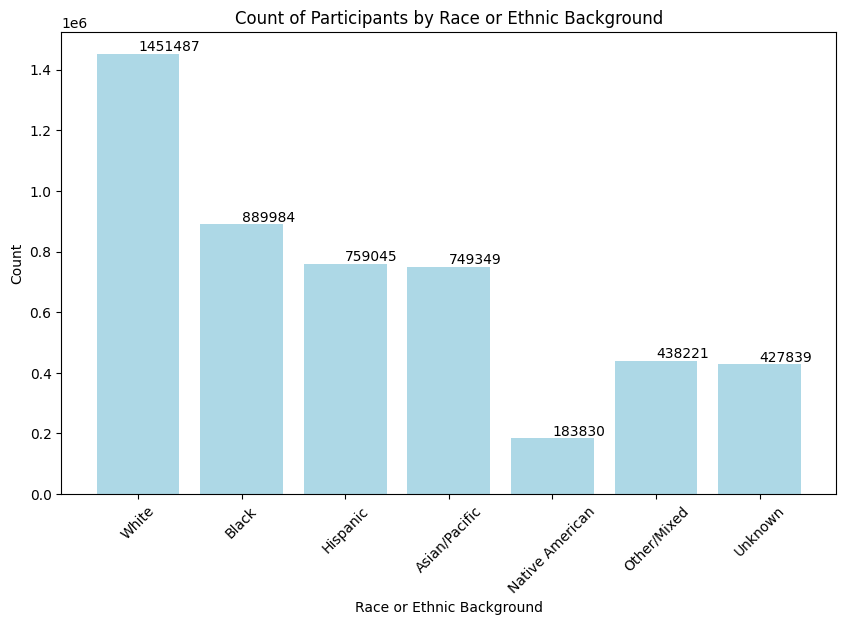

In [77]:
import matplotlib.pyplot as plt

# Define the race categories
races = ['White', 'Black', 'Hispanic', 'Asian/Pacific', 'Native American', 'Other/Mixed', 'Unknown']

# Define the counts and percentages
counts = [white_count, black_count, hispanic_count, asian_pacific_count, native_american_count, other_mixed_count, unknown_count]
percentages = [white_percentage, black_percentage, Hispanic_count_percentage, Asian_pacific_percentage, Native_american_percentage, Other_mixed_count_percentage, Unknown_count_percentage]

# Plot the count by race
plt.figure(figsize=(10, 6))
bars = plt.bar(races, counts, color='lightblue')

# Annotate each bar with its count value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

plt.xlabel('Race or Ethnic Background')
plt.ylabel('Count')
plt.title('Count of Participants by Race or Ethnic Background')
plt.xticks(rotation=45)
plt.show()

**Percentage of participants with confirmed cancer by race**

In [80]:
confirmed_count = cancer_counts.get(1, 0)

white_with_cancer = df_merged_bcsc_rf_screening_cleaned[(df_merged_bcsc_rf_screening_cleaned['race_eth'] == 1) & (df_merged_bcsc_rf_screening_cleaned['stage_advanced'] == 1)]
count_white_with_cancer = len(white_with_cancer)
print("Number of White Non-Hispanic with confirmed cancer:", count_white_with_cancer)
black_with_cancer = df_merged_bcsc_rf_screening_cleaned[(df_merged_bcsc_rf_screening_cleaned['race_eth'] == 2) & (df_merged_bcsc_rf_screening_cleaned['stage_advanced'] == 1)]
count_black_with_cancer = len(black_with_cancer)
print("Number of Black Non-Hispanic with confirmed cancer:", count_black_with_cancer)
hispanic_with_cancer = df_merged_bcsc_rf_screening_cleaned[(df_merged_bcsc_rf_screening_cleaned['race_eth'] == 5) & (df_merged_bcsc_rf_screening_cleaned['stage_advanced'] == 1)]
count_hispanic_with_cancer = len(hispanic_with_cancer)
print("Number of Hispanic with confirmed cancer:", count_hispanic_with_cancer)
asian_pacific_count_with_cancer = df_merged_bcsc_rf_screening_cleaned[(df_merged_bcsc_rf_screening_cleaned['race_eth'] == 3) & (df_merged_bcsc_rf_screening_cleaned['stage_advanced'] == 1)]
count_asian_with_cancer = len(asian_pacific_count_with_cancer)
print("Number of Asian/Pacific with confirmed cancer:", count_asian_with_cancer)
native_american_with_cancer = df_merged_bcsc_rf_screening_cleaned[(df_merged_bcsc_rf_screening_cleaned['race_eth'] == 4) & (df_merged_bcsc_rf_screening_cleaned['stage_advanced'] == 1)]
count_native_american_with_cancer = len(native_american_with_cancer)
print("Number of Nativeamerican with confirmed cancer:", count_native_american_with_cancer)
other_mixed_with_cancer = df_merged_bcsc_rf_screening_cleaned[(df_merged_bcsc_rf_screening_cleaned['race_eth'] == 6) & (df_merged_bcsc_rf_screening_cleaned['stage_advanced'] == 1)]
count_other_mixed_with_cancer = len(other_mixed_with_cancer)
print("Number of Other/Mixed with confirmed cancer:", other_mixed_with_cancer)
unknown_ethnicity_with_cancer = df_merged_bcsc_rf_screening_cleaned[(df_merged_bcsc_rf_screening_cleaned['race_eth'] == 9) & (df_merged_bcsc_rf_screening_cleaned['stage_advanced'] == 1)]
count_unknown_ethnicity_with_cancer = len(unknown_ethnicity_with_cancer)
print("Number of unknown_ethnicity with confirmed cancer:", count_unknown_ethnicity_with_cancer)

# Calculate the percentage and round the value to two digits
white_with_cancer_percentage = round((count_white_with_cancer / confirmed_count) * 100,2)
print("Percentage of white with cancer:", white_with_cancer_percentage)
black_with_cancer_percentage = round((count_black_with_cancer / confirmed_count) * 100,2)
print("Percentage of black with cancer:", black_with_cancer_percentage)
hispanic_with_cancer_percentage = round((count_hispanic_with_cancer / confirmed_count) * 100,2)
print("Percentage of hispanic with cancer:", hispanic_with_cancer_percentage)
asian_pacific_count_with_cancer_percentage = round((count_asian_with_cancer / confirmed_count) * 100,2)
print("Percentage of asian/pacific with cancer:", asian_pacific_count_with_cancer_percentage)
native_american_with_cancer_percentage = round((count_native_american_with_cancer / confirmed_count) * 100,2)
print("Percentage of nativeamerican with cancer:", native_american_with_cancer_percentage)
other_mixed_with_cancer_percentage = round((count_other_mixed_with_cancer / confirmed_count) * 100,2)
print("Percentage of other_mixed ethnicity with cancer:", other_mixed_with_cancer_percentage)
unknown_ethnicity_with_cancer_percentage = round((count_unknown_ethnicity_with_cancer / confirmed_count) * 100,2)
print("Percentage of unknown_ethnicity with cancer:", unknown_ethnicity_with_cancer_percentage)

Number of White Non-Hispanic with confirmed cancer: 375541
Number of Black Non-Hispanic with confirmed cancer: 230385
Number of Hispanic with confirmed cancer: 196255
Number of Asian/Pacific with confirmed cancer: 194534
Number of Nativeamerican with confirmed cancer: 47588
Number of Other/Mixed with confirmed cancer:          age  race_eth  first_degree_hx  age_menarche  age_first_birth  \
521190     7         6                0             0                0   
521197     7         6                0             0                0   
521198     7         6                0             0                0   
521207     7         6                0             0                0   
521208     7         6                0             0                0   
...      ...       ...              ...           ...              ...   
5234530   10         6                9             9                9   
5234531   10         6                9             9                9   
5234532   10  

Here we can see the percentage of participants with confirmed cancer. Based on the dataset, we can see that more data has collected and recorded for white  than any other race.

In [83]:
#Visualizing the missing values using a heatmap. It provides a quick glance of the missing values in the dataset.
#It generates a boolean dataframe where the lighter color represents missing values and darker color represents non-missing values.

#plt.figure(figsize = (15,15))
#sns.heatmap(df_merged_bcsc_rf_screening_cleaned.isnull())
#plt.title("Correlation Heatmap")
#plt.show()

In [85]:
df_merged_bcsc_rf_screening_cleaned.shape

(4899755, 13)

In [87]:
df_merged_bcsc_rf_screening_cleaned.tail()

age  race_eth  first_degree_hx  age_menarche  age_first_birth  \
5237322   10         9                9             9                9   
5237323   10         9                9             9                9   
5237324   10         9                9             9                9   
5237325   10         9                9             9                9   
5237326   10         9                9             9                9   

         current_hrt  menopaus  breast_cancer_history density_c  resfnl_c3  \
5237322            9         2                      0         4          1   
5237323            9         2                      0         4          1   
5237324            9         2                      0         4          1   
5237325            9         2                      0         4          1   
5237326            9         2                      0         4          1   

         cancscrfu1yr_c  stage_advanced  riskBCSC_v2_5y_cat_numeric  
5237322               1               0                           3  
5237323               1               0                           4  
5237324               1               1                           2  
5237325               1               1                           4  
5237326               1               0                           1

Positive Selection Criteria

Negative Selection Criteria

In [91]:
# Count occurrences of each unique value in the column
history_counts = df_merged_bcsc_rf_screening_cleaned['breast_cancer_history'].value_counts()

# Access the counts for participants who have 'not-confirmed' and 'confirmed' history
not_confirmed_count = history_counts.get(0, 0)
confirmed_count = history_counts.get(1, 0)

print("Count of participants who have not-confirmed history in the dataset:", not_confirmed_count)
print("Count of participants who have confirmed history in the dataset:", confirmed_count)

Count of participants who have not-confirmed history in the dataset: 2403012
Count of participants who have confirmed history in the dataset: 1065596


In [93]:
# Selecting only features I am interested in
df_merged_bcsc_rf_screening_cleaned1 = df_merged_bcsc_rf_screening_cleaned[['age','race_eth','density_c','resfnl_c3','cancscrfu1yr_c',
                     'stage_advanced','riskBCSC_v2_5y_cat_numeric'
                     ]]

In [95]:
# Check the dataframe size after dropping columns
df_merged_bcsc_rf_screening_cleaned1.shape

(4899755, 7)

In [97]:
df_merged_bcsc_rf_screening_cleaned1.isna().sum()

age                           0
race_eth                      0
density_c                     0
resfnl_c3                     0
cancscrfu1yr_c                0
stage_advanced                0
riskBCSC_v2_5y_cat_numeric    0
dtype: int64

In [99]:
df_merged_bcsc_rf_screening_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4899755 entries, 6 to 5237326
Data columns (total 7 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   age                         int64 
 1   race_eth                    int64 
 2   density_c                   object
 3   resfnl_c3                   int64 
 4   cancscrfu1yr_c              int64 
 5   stage_advanced              int64 
 6   riskBCSC_v2_5y_cat_numeric  int64 
dtypes: int64(6), object(1)
memory usage: 299.1+ MB


**Proportion of negative cases to positive cases**

In [102]:
#Proportion of negative cases to positive cases

df_merged_bcsc_rf_screening_cleaned1["stage_advanced"].value_counts(normalize=True)

stage_advanced
0    0.741166
1    0.258834
Name: proportion, dtype: float64

In [104]:
# Check columns of the dataframe
df_merged_bcsc_rf_screening_cleaned1.columns

Index(['age', 'race_eth', 'density_c', 'resfnl_c3', 'cancscrfu1yr_c',
       'stage_advanced', 'riskBCSC_v2_5y_cat_numeric'],
      dtype='object')

In [106]:
#df_encoded = pd.get_dummies(df_merged_bcsc_rf_screening_cleaned1, columns=['density_c'], prefix='density_c')

# Now plot the heatmap with the one-hot encoded columns
# only numerical columns 
#numerical_df_encoded = df_encoded.select_dtypes(include=np.number)

#plt.figure(figsize=(30, 20))
#sns.heatmap(numerical_df_encoded, annot=True, cmap='viridis', fmt=".1f", annot_kws={"size": 8})
#plt.title('Correlation Heatmap (density_c One-Hot Encoded - Numerical Only)')
#plt.show()

In [108]:
sample_size = 300000
if len(df_merged_bcsc_rf_screening_cleaned1) > sample_size:
    df = df_merged_bcsc_rf_screening_cleaned1.sample(n=sample_size, random_state=42) 
else:
    df = df_merged_bcsc_rf_screening_cleaned1.copy() 

df.head()

age  race_eth density_c  resfnl_c3  cancscrfu1yr_c  stage_advanced  \
1775283   10         9         1          0               0               0   
4318836    8         4         2          1               0               0   
690970     8         1         4          1               1               0   
2978370    6         3         3          0               1               0   
4610705    6         1         1          1               1               0   

         riskBCSC_v2_5y_cat_numeric  
1775283                           2  
4318836                           4  
690970                            4  
2978370                           1  
4610705                           1

In [109]:
#  DataFrame and 'cancer' is the target variable
target_variable = df['stage_advanced'].copy()
predictors = df.drop(columns=['stage_advanced'])

In [112]:
# Reset the index of predictors dataframe
predictors.reset_index(drop=True, inplace=True)

In [114]:
# Target needs to be extracted and aligned post-preprocessing
target_variable = target_variable.reset_index(drop=True)

In [116]:
# Make sure the length of target_variable and predictors are the same
# This is crucial for alignment. If they are not the same, further investigation is needed on how predictors was constructed.

assert len(predictors) == len(target_variable)

### Feature Selection - Chi-Square Test

In [119]:
# Chi-Square Test
 
from scipy.stats import chi2_contingency
import pandas as pd

# target_variable is already correctly defined and contains the target data

# Initialize an empty list to store the results
chi_square_results = []

for column in predictors.columns:  #  DataFrame with encoded predictors
    # Create a contingency table
    crosstab = pd.crosstab(predictors[column], target_variable)

    # Perform the chi-square test
    chi2, p, dof, ex = chi2_contingency(crosstab, correction=False)  # Use correction=False for Yates' correction in large samples

    # Append the results to the list as a dictionary
    chi_square_results.append({"Variable": column, "Chi-square Statistic": chi2, "P-value": p})

# Create a DataFrame from the list of dictionaries
chi_results = pd.DataFrame(chi_square_results)

pd.set_option('display.max_rows', 100)  # or another number large enough to display your full results

# Display the resulting DataFrame
#print(chi_results)

# Optionally, we can sort by P-value to see the most significant variables first
chi_results_sorted = chi_results.sort_values(by="P-value")
print(chi_results_sorted)

                     Variable  Chi-square Statistic       P-value
2                   density_c           1958.677574  0.000000e+00
4              cancscrfu1yr_c          71074.876840  0.000000e+00
5  riskBCSC_v2_5y_cat_numeric           3515.542760  0.000000e+00
0                         age            452.975102  1.123570e-94
3                   resfnl_c3             67.243370  2.399765e-16
1                    race_eth              1.588081  9.534305e-01


In [120]:
# Check the column names to ensure 'cancer' is not listed
print(predictors.columns)

Index(['age', 'race_eth', 'density_c', 'resfnl_c3', 'cancscrfu1yr_c',
       'riskBCSC_v2_5y_cat_numeric'],
      dtype='object')


In [123]:
# Convert 'density_c' to integer type
predictors['density_c'] = pd.to_numeric(predictors['density_c'], errors='raise')


In [124]:
# see which columns are being processed
for column in predictors.columns:
    print(f"Processing column: {column}")

Processing column: age
Processing column: race_eth
Processing column: density_c
Processing column: resfnl_c3
Processing column: cancscrfu1yr_c
Processing column: riskBCSC_v2_5y_cat_numeric


In [127]:
# unique_values = predictors[''].unique()

# # Print unique values
# print(unique_values)

###Feature Selection - Stat Model

In [130]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
import numpy as np                  # Scientific Computingimport pandas as pd  


# The target variable 'cancer' is in 'target_variable' and the predictors are in 'df'
X = predictors  # Predictors
y = target_variable  # Target variable

# Add a constant to the predictors to include an intercept in the model
X = sm.add_constant(X)  # X is already your predictors dataframe df

# Initialize the logistic regression model
logit_model = sm.Logit(y, X)

# Fit the model
result = logit_model.fit(method='bfgs',maxiter=100)


# Print the summary of the model
print(result.summary())

# Predicting the probabilities of the positive class
y_pred_prob = result.predict(X)

# Converting probabilities to class labels based on a 0.5 threshold
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Calculate and print the accuracy
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy}')

Optimization terminated successfully.
         Current function value: 0.405591
         Iterations: 42
         Function evaluations: 44
         Gradient evaluations: 44
                           Logit Regression Results                           
Dep. Variable:         stage_advanced   No. Observations:               300000
Model:                          Logit   Df Residuals:                   299993
Method:                           MLE   Df Model:                            6
Date:                Fri, 25 Apr 2025   Pseudo R-squ.:                  0.2914
Time:                        21:58:06   Log-Likelihood:            -1.2168e+05
converged:                       True   LL-Null:                   -1.7170e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const 

## Visualization Tasks

You can explore the data visually to gain insights into the dataset

**Univariate Analysis:**

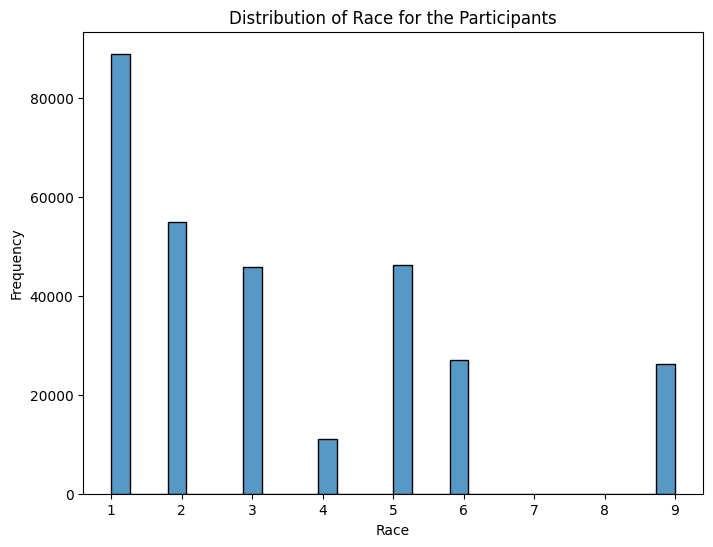

In [134]:
# Plot a histogram of the 'race' target variable
plt.figure(figsize=(8, 6))
sns.histplot(predictors['race_eth'], bins=30)
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.title('Distribution of Race for the Participants')
plt.show()

# comments

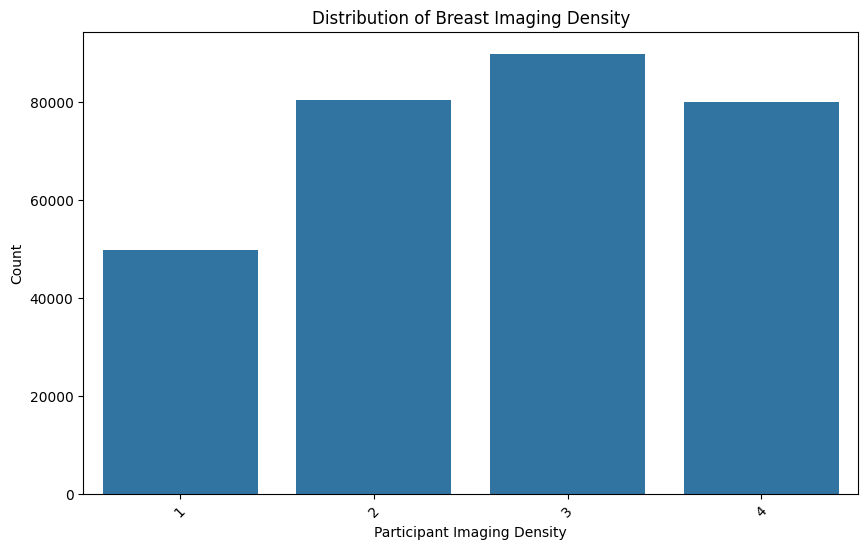

In [138]:
# Bar Plot for Categorical Variables (e.g., age)

plt.figure(figsize=(10, 6))
sns.countplot(data=predictors, x='density_c')
plt.title("Distribution of Breast Imaging Density")
plt.xlabel("Participant Imaging Density")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

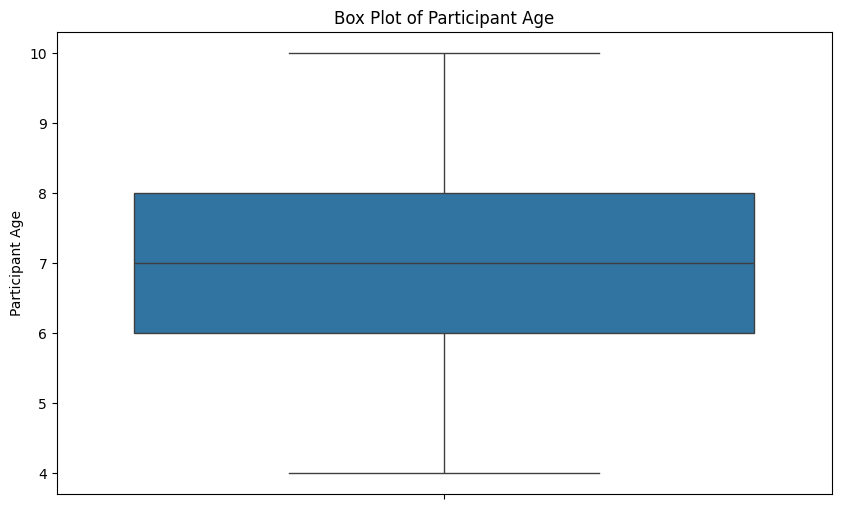

In [140]:
# Box Plot for Numeric Variables (e.g., age)
plt.figure(figsize=(10, 6))
sns.boxplot(data=predictors, y='age')
plt.title("Box Plot of Participant Age")
plt.ylabel("Participant Age")
plt.show()

**Bivariate Analysis:**

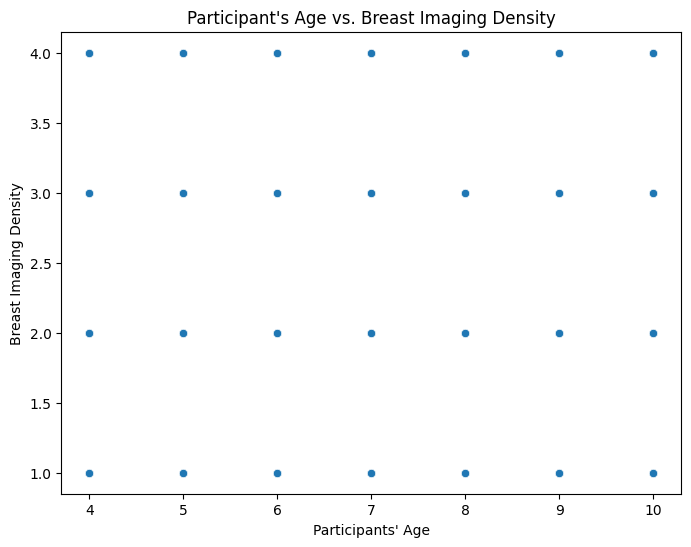

In [142]:
# Scatter Plot for Relationship: Participant's Age vs.  Density
plt.figure(figsize=(8, 6))
sns.scatterplot(data=predictors, x='age', y='density_c')
plt.title("Participant's Age vs. Breast Imaging Density")
plt.xlabel("Participants' Age")
plt.ylabel("Breast Imaging Density")
plt.show()

In [143]:
predictors

age  race_eth  density_c  resfnl_c3  cancscrfu1yr_c  \
0         7         9          2          1               0   
1         6         2          1          1               0   
2        10         5          4          1               0   
3         6         2          1          1               0   
4         5         1          3          0               1   
...     ...       ...        ...        ...             ...   
299995   10         1          3          1               0   
299996    5         5          4          0               0   
299997    5         3          3          0               1   
299998   10         6          4          1               0   
299999    6         5          3          1               0   

        riskBCSC_v2_5y_cat_numeric  
0                                4  
1                                3  
2                                1  
3                                0  
4                                0  
...                            ...  
299995                           3  
299996                           3  
299997                           2  
299998                           1  
299999                           3  

[300000 rows x 6 columns]

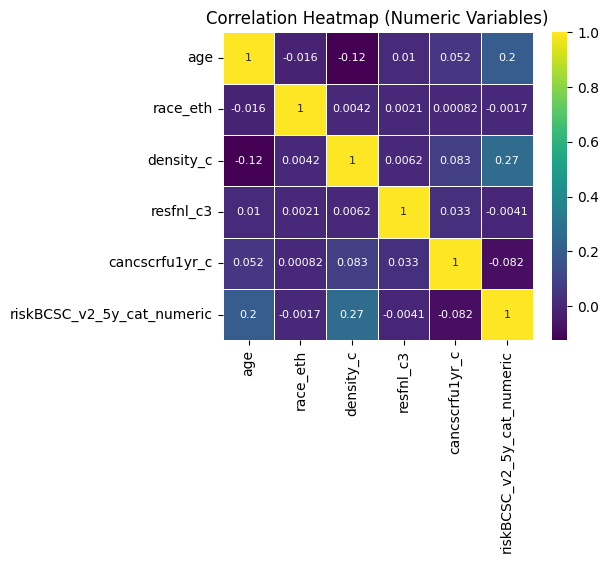

In [145]:
# Correlation Heatmap (for numeric variables)
numeric_columns = ['age','race_eth','density_c','resfnl_c3', 'cancscrfu1yr_c', 'riskBCSC_v2_5y_cat_numeric']

#Correlation
encoded_dfCorr = predictors[numeric_columns].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(encoded_dfCorr, annot=True, cmap='viridis', linewidths=0.5, annot_kws={"size": 8})
plt.title("Correlation Heatmap (Numeric Variables)")
plt.show()

#### Statistical Visualizations using Seaborn:

#####Pairplot#####

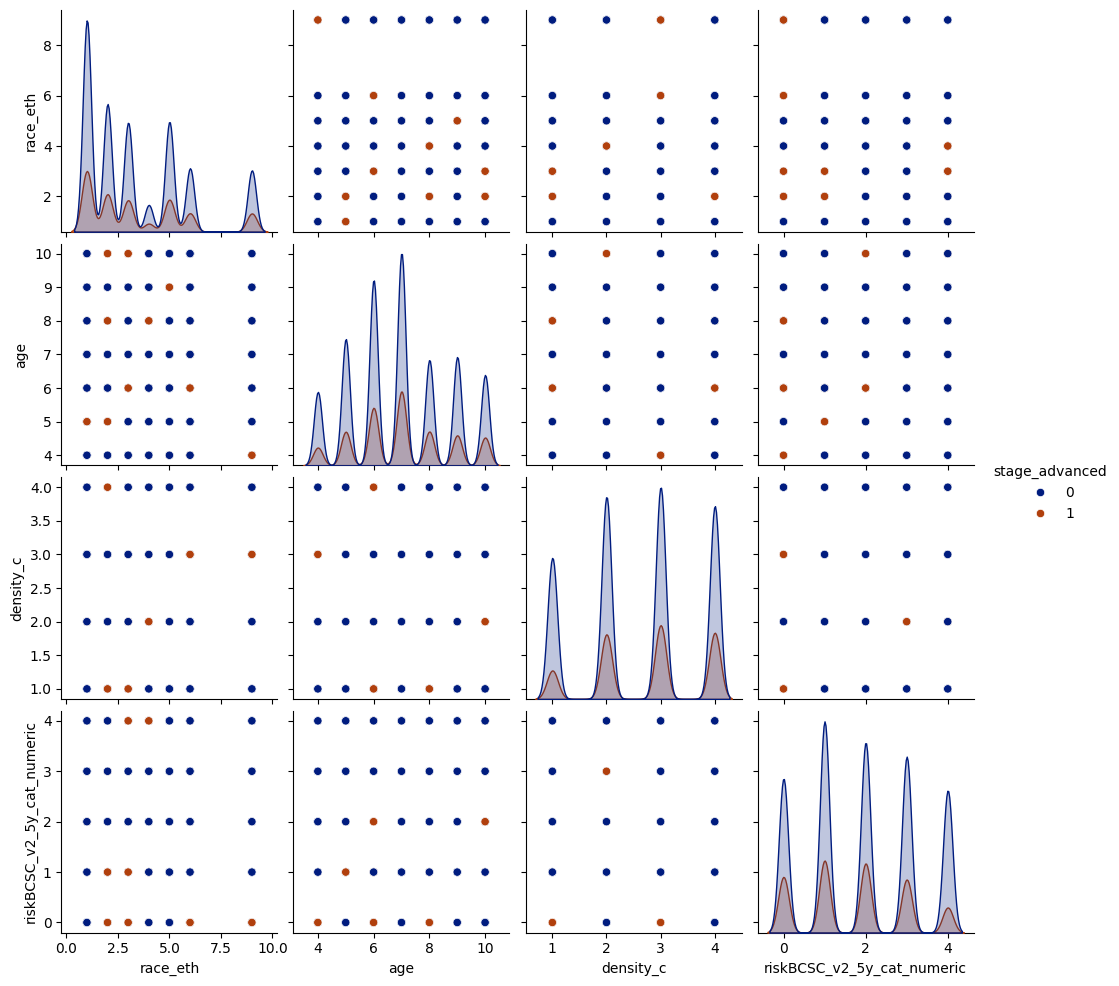

In [151]:
# Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.
# Plot pairwise relationships in a data-set.

selected_vars = ['stage_advanced','race_eth', 'age', 'density_c', 'riskBCSC_v2_5y_cat_numeric']

# Creating a copy of the DataFrame for plotting
df_plot = df[selected_vars].copy()


# Plot using the modified copy
sns.pairplot(df_plot, hue="stage_advanced", palette="dark")
plt.show()

#####Count Plot#####

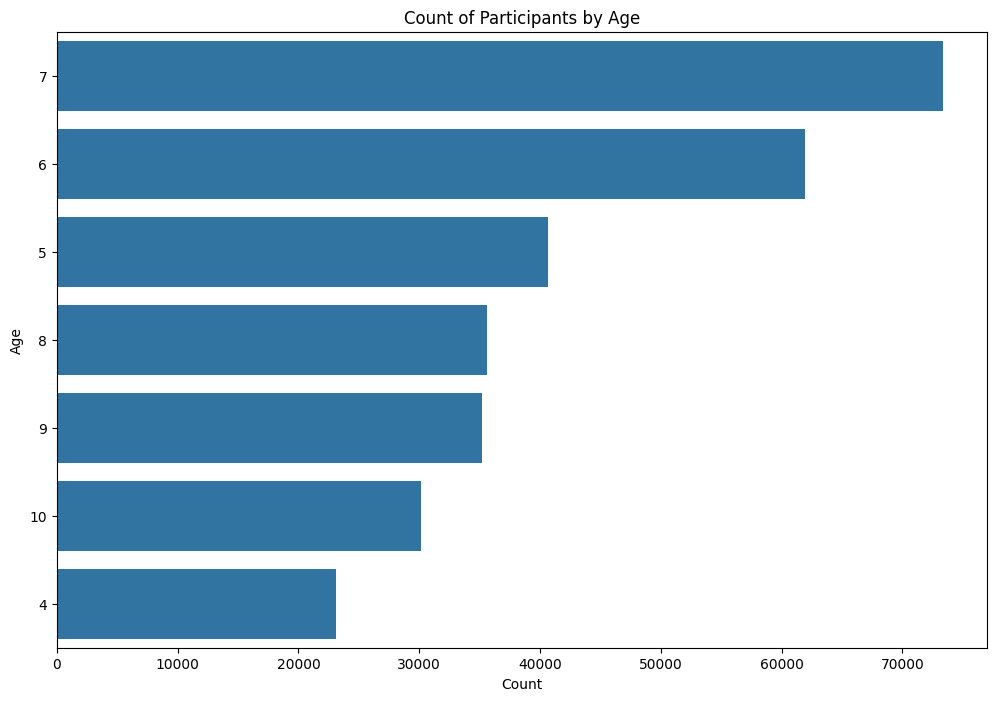

In [153]:
# Count Plot (e.g., age)
plt.figure(figsize=(12, 8))
sns.countplot(data=predictors, y='age', order=predictors['age'].value_counts().index)
plt.title("Count of Participants by Age")
plt.xlabel("Count")
plt.ylabel("Age")
plt.show()

#####Box Plot#####

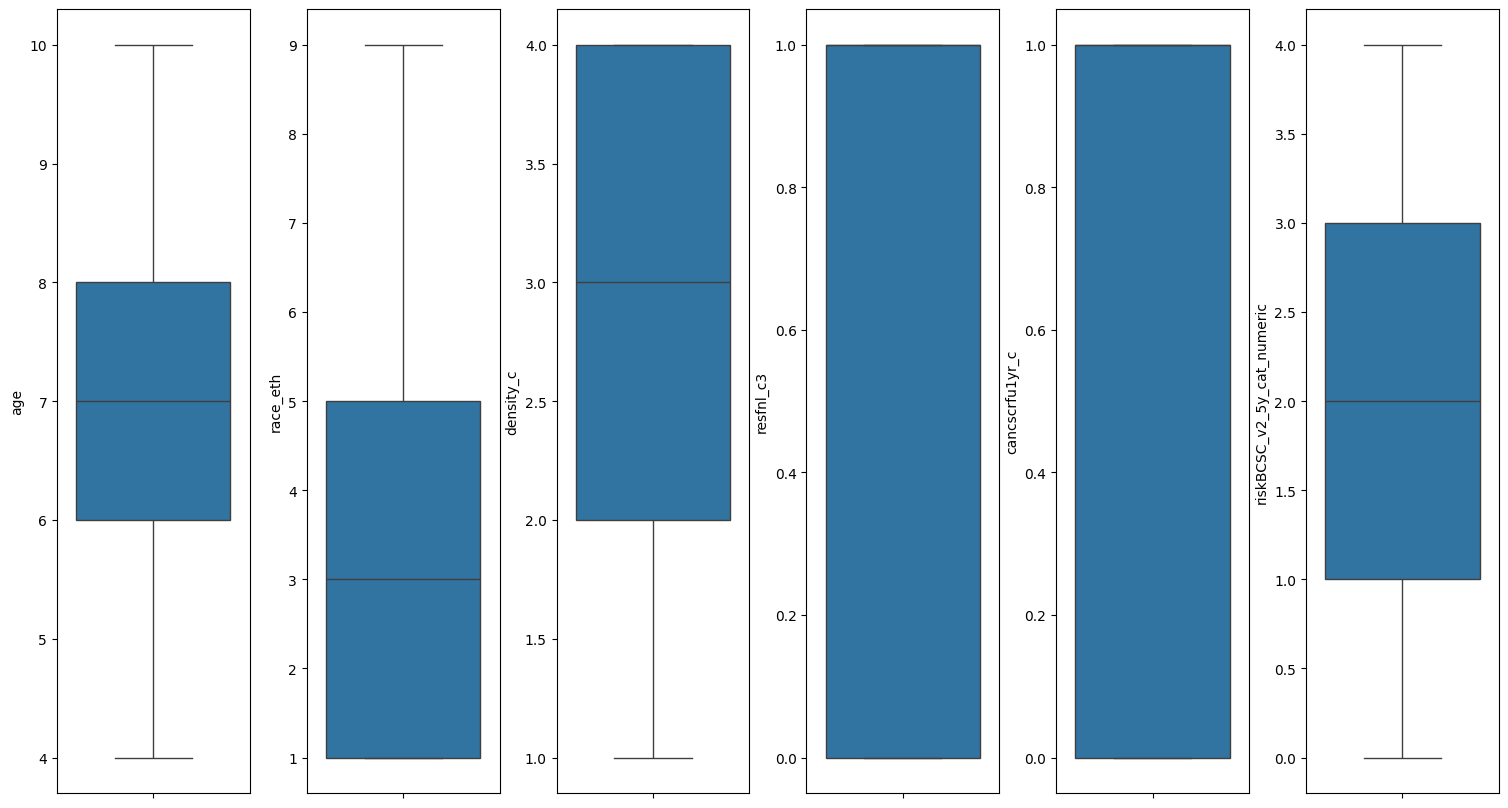

In [142]:
# Generating box plots to see the range, IQR, and spread of the data (two rows of seven boxplots):

import seaborn as sns
import matplotlib_inline

# race, age etc.

# Let's designate the figure
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(15,8))
index = 0
axs = axs.flatten()

for k,v in predictors.items():
  if index >= len(axs):  # Prevent IndexError by breaking the loop if index exceeds the subplot array size
        break
  sns.boxplot(y=k, data=predictors, ax=axs[index])
  index +=1

plt.tight_layout(pad=0.4)
plt.show()

# Supervised Machine Learning

**The ratio of negative cases to positive cases being very high can cause bias in machine learning models. Therefore, here we are downsampling the negative cases to 1:1 ratio with positive cases.**

In [137]:
df.columns

Index(['age', 'race_eth', 'density_c', 'resfnl_c3', 'cancscrfu1yr_c',
       'stage_advanced', 'riskBCSC_v2_5y_cat_numeric'],
      dtype='object')

In [139]:
df.shape

(300000, 7)

In [141]:
Noncancer_count, Cancer_count = df['stage_advanced'].value_counts()
print(f'CA count: {Cancer_count}\nNonCA count: {Noncancer_count}')

CA count: 77796
NonCA count: 222204


In [143]:
# Downsampling negative cases

NonCA_dataframe = df[df['stage_advanced'] == 0].sample(Cancer_count, random_state=50)
CA_dataframe = df[df['stage_advanced'] == 1]
final_df = pd.concat([NonCA_dataframe, CA_dataframe], axis=0)

In [145]:
Noncancer_count2, Cancer_count2 = final_df['stage_advanced'].value_counts()
print(f'CA count: {Cancer_count2}\nNonCA count: {Noncancer_count2}')

CA count: 77796
NonCA count: 77796


In [147]:
final_df.shape

(155592, 7)

In [149]:
final_df.columns

Index(['age', 'race_eth', 'density_c', 'resfnl_c3', 'cancscrfu1yr_c',
       'stage_advanced', 'riskBCSC_v2_5y_cat_numeric'],
      dtype='object')

In [151]:
# Check for any null values
final_df.isnull().sum().sum()

# Ensure all data types are numeric
#final_df.dtypes.unique()

0

In [153]:
final_df.shape

(155592, 7)

In [155]:
#final_df.to_csv('final_df.csv', index = False)

In [157]:
final_df.reset_index(drop=True, inplace=True)

#Machine Learning Algorithmns

## Logistic Regression

### Train | Test Split and Scaling
Split the data into features and target variable

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [170]:
X1 = final_df.drop('stage_advanced', axis=1)
# Separating 'cancer' records to a Pandas Series, y
y1 = final_df['stage_advanced']

In [172]:
from sklearn.model_selection import train_test_split

# Splitting the DataFrame, X1 and the Series, y1 to a train set and a test set in a 70/30 ratio.
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.7, random_state=50)
print("Training data size:", X1_train.shape[0])

Training data size: 110532


In [122]:
#  Standardize the data
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler_lr = StandardScaler()

In [123]:
# Fit and transform the training data
scaled_X1_train = scaler_lr.fit_transform(X1_train)

# Transform the test data using the same scaler fitted on the training data
scaled_X1_test = scaler_lr.transform(X1_test)

### Modeling

#####First Evaluation Matrix - Logistic

In [126]:
# Create and train the logistic regression model
model_lr = LogisticRegression()
model_lr.fit(scaled_X1_train, y1_train)

LogisticRegression()

**Coefficient Interpretation**

In [128]:
model_lr.coef_
#This means:
#Based on the ratios with each of the predictors,
#the age indicator is a stronger predictor than any other precidtors as it has the highest positive value of 0.41.

array([[ 9.01641793e-02,  1.02324557e-03,  1.23741064e-01,
        -5.94235824e-02,  4.51356641e+00, -1.92836618e-01]])

#### Modeling

In [130]:
# Make predictions on the scaled test data
y1_pred = model_lr.predict(scaled_X1_test)

In [131]:
accuracy_score(y1_test,y1_pred)

# Calculate accuracy
accuracy_lr = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy_lr)

Accuracy: 0.7717772659764524


#####First Confusion Matrix - Logistic

Confusion Matrix for Logistic Regression:

 [[12547 10603]
 [    0 23309]]


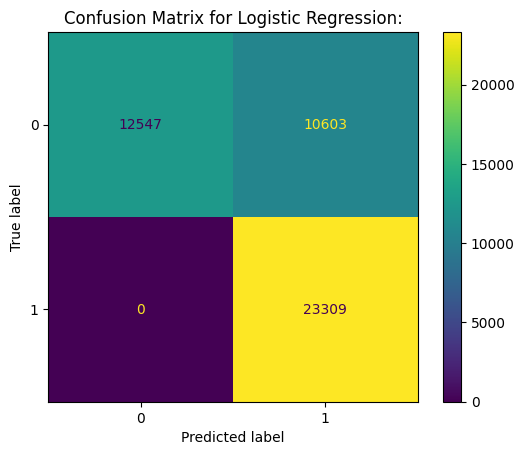

In [133]:
# Print confusion matrix
print("Confusion Matrix for Logistic Regression:\n\n", confusion_matrix(y1_test, y1_pred))

# Print Confusion Matric plot
disp = ConfusionMatrixDisplay(confusion_matrix(y1_test, y1_pred))
disp.plot()
plt.title("Confusion Matrix for Logistic Regression:")
plt.show()

#####First Classification Report - Logistic

In [135]:
#print("Classification Report:\n\n", classification_report(y1_test,y1_pred))
target_names = ['No CA', 'CA']
print("Classification Report for Logistic Regression:\n", classification_report(y1_test, y1_pred, target_names=target_names))

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

       No CA       1.00      0.54      0.70     23150
          CA       0.69      1.00      0.81     23309

    accuracy                           0.77     46459
   macro avg       0.84      0.77      0.76     46459
weighted avg       0.84      0.77      0.76     46459



In [136]:
X1_train.iloc[0]

age                           4
race_eth                      1
density_c                     4
resfnl_c3                     0
cancscrfu1yr_c                1
riskBCSC_v2_5y_cat_numeric    4
Name: 59295, dtype: object

In [137]:
y1_train.iloc[0]

0

In [138]:
# Predicts the probability that an instance belongs to one class or the other.
# 87% probability of 0 class
# 13% probability of 1 class
model_lr.predict_proba(X1_train.iloc[0].values.reshape(1, -1))

array([[0.06866405, 0.93133595]])

In [139]:
# Predicts the class label for the first data point in the training set
model_lr.predict(X1_train.iloc[0].values.reshape(1, -1))

array([1])

#### Evaluating Curves and AUC

#####First Precision-Recall Curve - Logistic

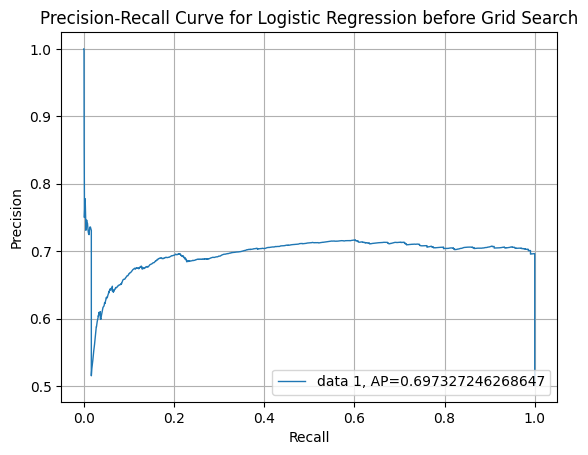

In [142]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y1_pred_proba1 = model_lr.predict_proba(scaled_X1_test)[:, 1]

# Calculate precision-recall curve
precision_lr1, recall_lr1, thresholds_lr1 = precision_recall_curve(y1_test, y1_pred_proba1)

# Calculate average precision
ap_lr1 = average_precision_score(y1_test, y1_pred_proba1)

# Plot precision-recall curve
plt.plot(recall_lr1, precision_lr1, lw=1, label="data 1, AP=" + str(ap_lr1))
plt.legend(loc=4)
plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.title('Precision-Recall Curve (AP={:.2f})'.format(ap))
plt.title('Precision-Recall Curve for Logistic Regression before Grid Search')
plt.grid(True)
plt.show()

#####First ROC Curve - Logistic

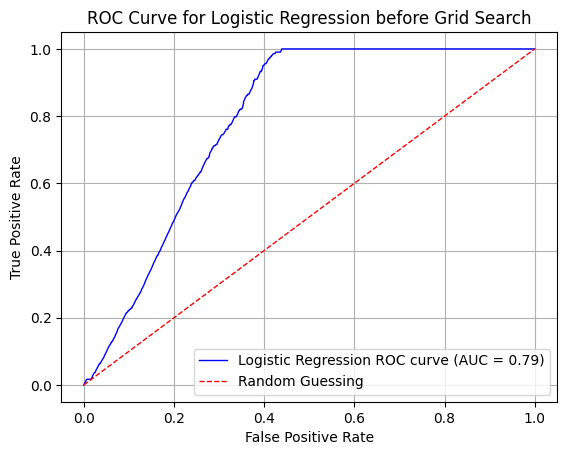

In [144]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y1_prob_lr1 = model_lr.predict_proba(scaled_X1_test)[:, 1]

# Calculate ROC curve
fpr_lr1, tpr_lr1, thresholds_lr1 = roc_curve(y1_test, y1_prob_lr1)

# Calculate AUC (Area Under the Curve)
roc_auc_lr = auc(fpr_lr1, tpr_lr1)

# Plot ROC curve
plt.plot(fpr_lr1, tpr_lr1, color='blue', lw=1, label='Logistic Regression ROC curve (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression before Grid Search')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### GridSearch for Best Hyper-Parameters

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV

In [147]:
# Logistic Regression model with Elastic Net regularization
lr_model_enet = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=5000, random_state=50)

In [148]:
# GRIDSEARCHCV

# Parameters for GridSearchCV
param_grid_lr = {
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1],  # Mix of L1 and L2
    'C': [0.1, 0.5, 1, 5, 10]  # Inverse of regularization strength
}

# Using GridSearchCV to find the best parameters for Logistic Regression with Elastic Net
best_model_lr = GridSearchCV(estimator=lr_model_enet, param_grid=param_grid_lr, scoring='roc_auc', cv=5)
best_model_lr.fit(scaled_X1_train, y1_train)

# Best parameters and model
best_params_lr = best_model_lr.best_params_
best_model_lr = best_model_lr.best_estimator_

print("Best parameters found:", best_params_lr)

Best parameters found: {'C': 1, 'l1_ratio': 0.5}


###Model Performance Evaluation

In [150]:
# Predictions
y1_pred2 = best_model_lr.predict(scaled_X1_test)
# For Elastic Net, which is typically used for regression, you might need to convert the output to binary (0 or 1) for classification purposes
y1_pred2_class = [1 if prob > 0.5 else 0 for prob in y1_pred2]

In [151]:
# Evaluate the model to find the accuracy of our Logistic Regression model. In this case, the model can successfully predict the response label 64.43% of the time.
accuracy_lr1 = accuracy_score(y1_test, y1_pred2, normalize=True, sample_weight=None)
print("Accuracy:", accuracy_lr1)

Accuracy: 0.7717772659764524


In [152]:
# Score based on the updated model
best_model_lr.score(scaled_X1_test, y1_test)

0.7717772659764524

####Second Confusion Matrix - Logistic

Confusion Matrix for Logistic Regression after Grid Search:

 [[12547 10603]
 [    0 23309]]


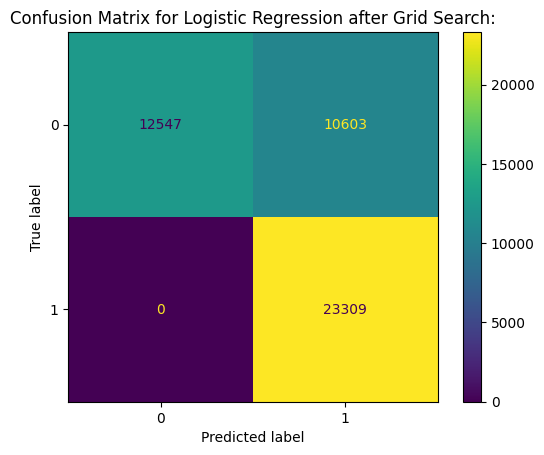

In [154]:
# Determine the True-Positive, True-Negative, False-Positive, False-Negative
# cm_lr2 = confusion_matrix(y1_test, y1_pred2_class)
# cm_lr2

print("Confusion Matrix for Logistic Regression after Grid Search:\n\n", confusion_matrix(y1_test, y1_pred2_class))

# Confusion Matric plot
disp = ConfusionMatrixDisplay(confusion_matrix(y1_test, y1_pred2_class))
disp.plot()
plt.title("Confusion Matrix for Logistic Regression after Grid Search:")
plt.show()

#### Comments


####Log odds and odds ratio

In [157]:
# Logit (or log odds) of how the predictor affects the response variable
# log(P/1-P) = B0 + B1X1 + B2X2 + .... + BnXn

log_odds = np.round(best_model_lr.coef_[0], 2)

In [158]:
pd.DataFrame({'log odds': log_odds }, index=X1.columns )

log odds
age                             0.09
race_eth                        0.00
density_c                       0.12
resfnl_c3                      -0.06
cancscrfu1yr_c                  4.80
riskBCSC_v2_5y_cat_numeric     -0.19

In [159]:
# Converting the log odd to odds ratio
odds = np.round(np.exp(log_odds), 2)

In [160]:
pd.DataFrame({'odds': odds }, index=X1.columns )
# Based on the Odds ratio

odds
age                           1.09
race_eth                      1.00
density_c                     1.13
resfnl_c3                     0.94
cancscrfu1yr_c              121.51
riskBCSC_v2_5y_cat_numeric    0.83

####Second Classification Report - Logistic

In [162]:
# Second Evaluation Matrix
# print("Second Evaluation Matrix-Logistic:")
target_names = ['No CA', 'CA']
print("Classification Report for Logistic Regression after Grid Search:\n\n", classification_report(y1_test, y1_pred2_class, target_names=target_names))

Classification Report for Logistic Regression after Grid Search:

               precision    recall  f1-score   support

       No CA       1.00      0.54      0.70     23150
          CA       0.69      1.00      0.81     23309

    accuracy                           0.77     46459
   macro avg       0.84      0.77      0.76     46459
weighted avg       0.84      0.77      0.76     46459



#### Evaluating Curves and AUC


---
---
*Precision = True-Positive / (True-Positive + False-Positive)*<br>
Precision is ratio of True-Positive cases that were correctly identified with respect to cases that were correctly and incorrectly identified as positive CA cases. Incorrectly identified as positive CA cases are actually non-CA cases.<br>
*Recall = True-Positive / (True-Positive + False-Negative)*2<br>
Recall is ratio of True-Positive cases that were correctly identified with
respect to cases that were correctly identified as positive CA cases and incorrectly identified as non-CA cases. Incorrectly identified as non-CA cases are actually positive CA cases.<br>\
*F1-score = 2 x Precision x Recall / (Precision + Recall)*


---
---


#####Second Precision-Recall Curve - Logistic

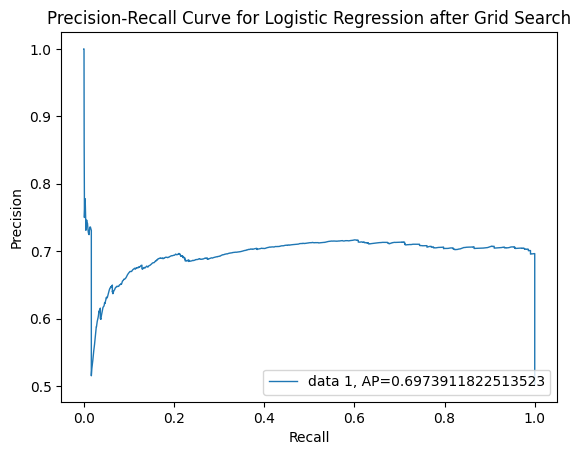

In [166]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y1_pred_proba2 = best_model_lr.predict_proba(scaled_X1_test)[:, 1]

# Calculate precision-recall curve
precision_lr2, recall_lr2, _ = precision_recall_curve(y1_test, y1_pred_proba2)

# Calculate average precision
ap_lr2 = average_precision_score(y1_test, y1_pred_proba2)

# Plot precision-recall curve
plt.plot(recall_lr2, precision_lr2, lw=1, label="data 1, AP=" + str(ap_lr2))
plt.legend(loc=4)
plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.title('Precision-Recall Curve (AP={:.2f})'.format(ap))
plt.title('Precision-Recall Curve for Logistic Regression after Grid Search')
#plt.grid(True)
plt.show()

#####Second ROC Curve - Logistic

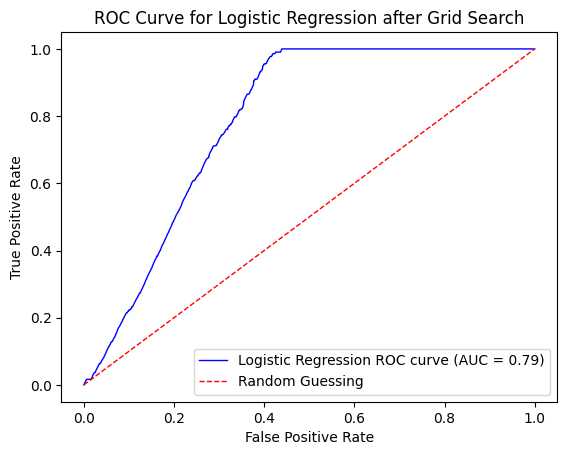

In [168]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y1_prob_lr2 = best_model_lr.predict_proba(scaled_X1_test)[:, 1]

# Calculate ROC curve
fpr_lr_best, tpr_lr_best, thresholds_lr_best = roc_curve(y1_test, y1_prob_lr2)

# Calculate AUC (Area Under the Curve)
roc_auc_lr_best = auc(fpr_lr_best, tpr_lr_best)

# Plot ROC curve
plt.plot(fpr_lr_best, tpr_lr_best, color='blue', lw=1, label='Logistic Regression ROC curve (AUC = %0.2f)' % roc_auc_lr_best)
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression after Grid Search')
plt.legend(loc='lower right')
#plt.grid(True)
plt.show()

###Sorted Coefficients and Visualization

In [170]:
# Compute the intercept B0
best_model_lr.intercept_

array([-2.16529833])

In [171]:
import pandas as pd

# Get the names of the predictors
predictor_names = X1_train.columns

# Get the coefficients of the predictors from the model
coefficients_lr = best_model_lr.coef_[0]

# Create a DataFrame to display the coefficients along with the predictor names
coefficients_lr_df = pd.DataFrame({'Predictor': predictor_names, 'Coefficient': coefficients_lr})

# Display the DataFrame
print(coefficients_lr_df)

                    Predictor  Coefficient
0                         age     0.090010
1                    race_eth     0.000608
2                   density_c     0.123920
3                   resfnl_c3    -0.059360
4              cancscrfu1yr_c     4.798172
5  riskBCSC_v2_5y_cat_numeric    -0.192917


In [172]:
# Compute the coefficients of all predictors
best_model_lr.coef_

array([[ 9.00102455e-02,  6.08206169e-04,  1.23920356e-01,
        -5.93597464e-02,  4.79817189e+00, -1.92917324e-01]])

####Feature Importance Plot

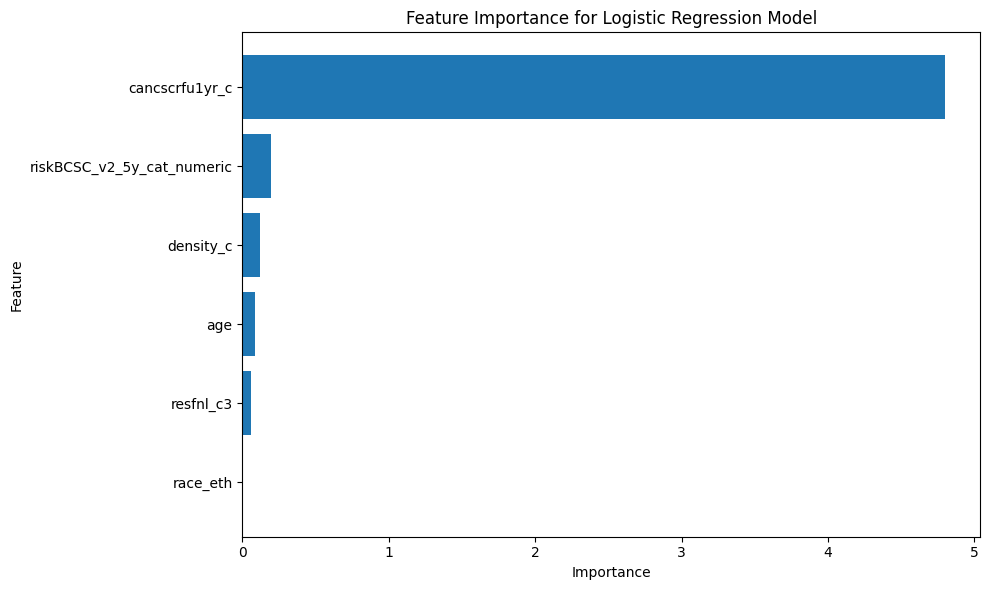

In [174]:
import matplotlib.pyplot as plt

# Create the feature importance plot
coefficients = best_model_lr.coef_[0]
feature_importance = pd.DataFrame({'Feature': X1.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])

# Customize the plot
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Logistic Regression Model')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

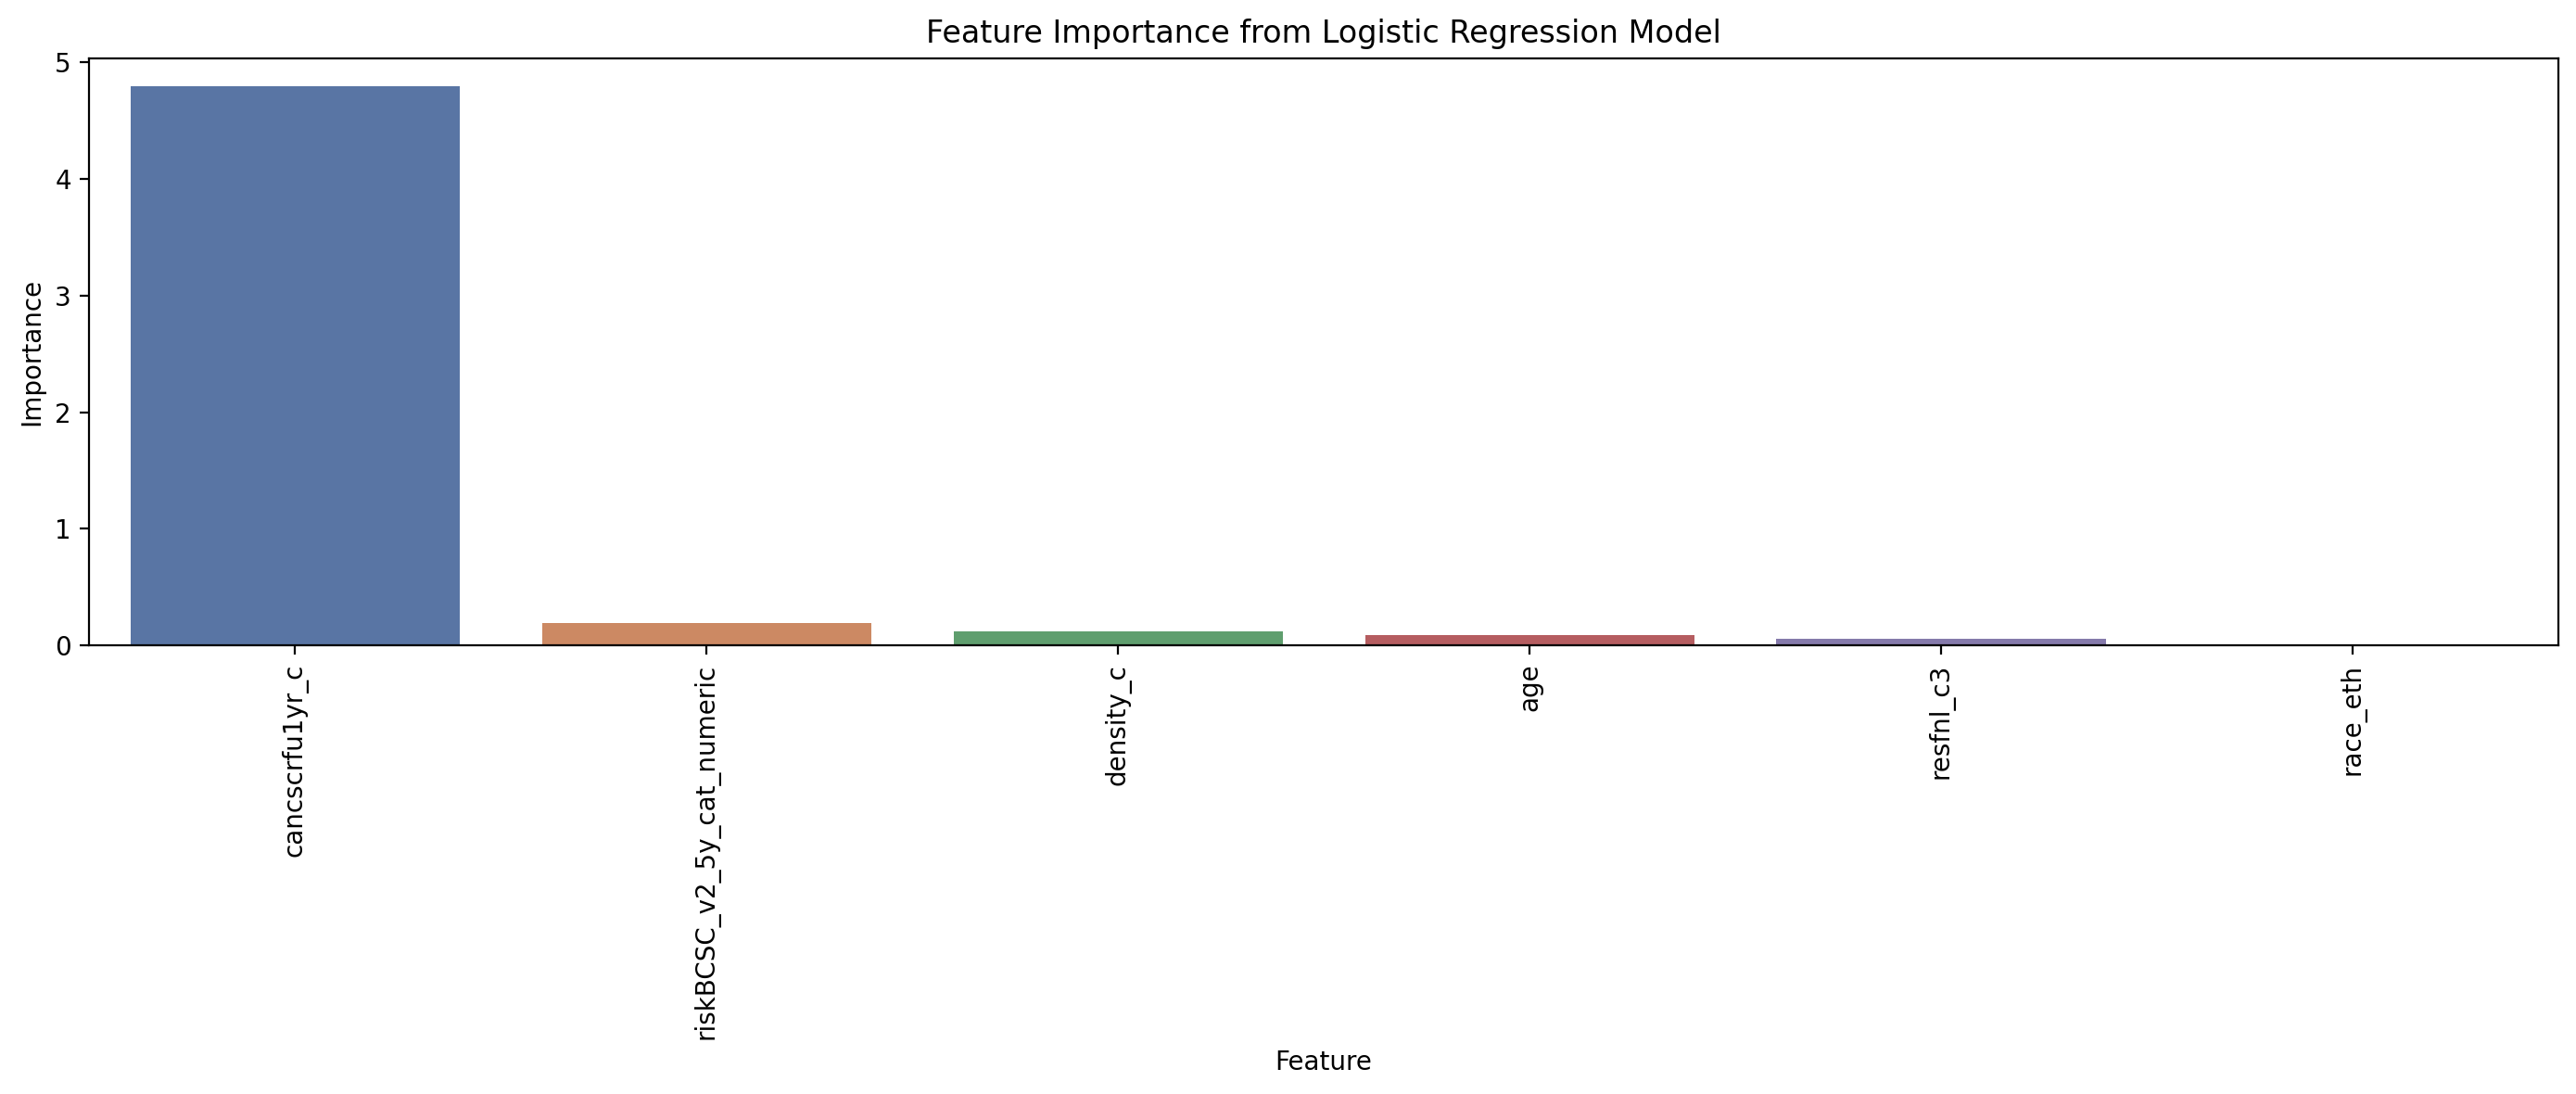

In [175]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Extract the coefficients of the logistic regression model
coefficients_lr1 = best_model_lr.coef_[0]

# Get the absolute values of coefficients for feature importance
feature_importance_lr = abs(coefficients_lr1)

# Create a DataFrame with feature importances
feats_lr = pd.DataFrame(index=X1.columns, data=feature_importance_lr, columns=['Importance'])

# Sort the dataframe by the values in the "Importance" column in descending order
feats_lr = feats_lr.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(14, 6), dpi=200)
sns.barplot(data=feats_lr.reset_index(), x='index', y='Importance', palette='deep')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from Logistic Regression Model')
plt.tight_layout()
plt.show()

####Sorted Coefficients Visualization

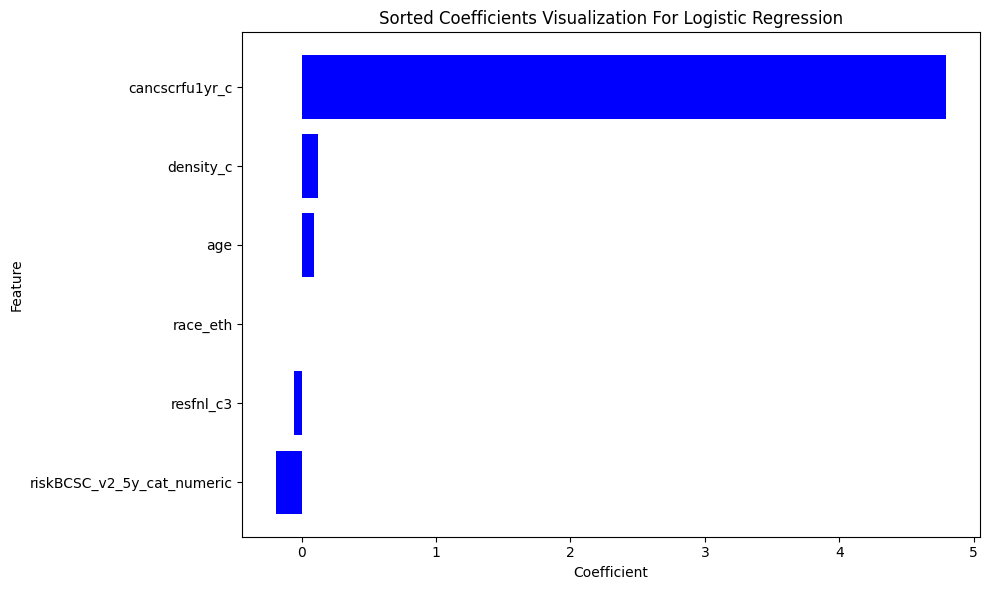

In [177]:
import matplotlib.pyplot as plt

# Get coefficients and feature names
coefficients = best_model_lr.coef_[0]
feature_names = X1.columns

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients in descending order
sorted_coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=True)

#Create a barplot of sorted coefficients
plt.figure(figsize=(10, 6))
plt.barh(sorted_coefficients_df['Feature'], sorted_coefficients_df['Coefficient'], color ='blue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Sorted Coefficients Visualization For Logistic Regression')
plt.tight_layout()
plt.show()

## KNN - K Nearest Neighbors

<Axes: xlabel='age', ylabel='density_c'>

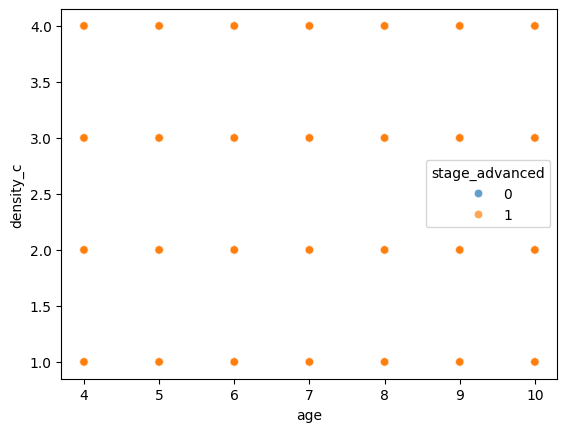

In [179]:
sns.scatterplot(x='age',y='density_c',hue='stage_advanced',data=final_df,alpha=0.7)

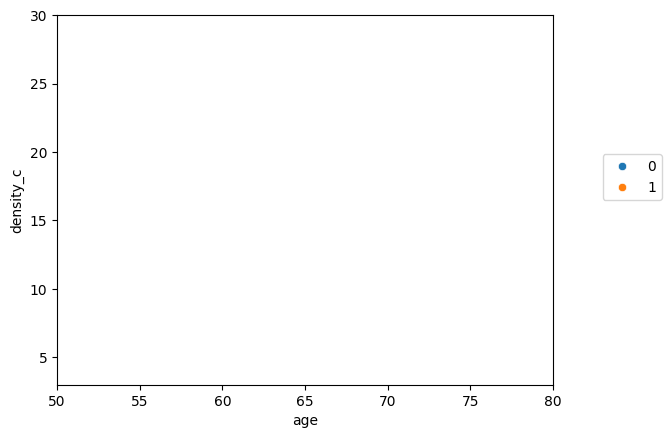

In [180]:
sns.scatterplot(x='age',y='density_c',hue='stage_advanced',data=final_df)
plt.xlim(50,80)
plt.ylim(3,30)
plt.legend(loc=(1.1,0.5))

### Train|Test Split and Scaling Data

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [183]:
X2 = final_df.drop('stage_advanced', axis=1)
# Separating 'colo_cancer' records to a Pandas Series, y
y2 = final_df['stage_advanced']

In [184]:
# Splitting the DataFrame, X and the Series, y to a train set and a test set in a 70/30 ratio.
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.7, random_state=50)
print("Training data size:", X2_train.shape[0])

Training data size: 108403


In [185]:
#  Standardize the data
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler_knn = StandardScaler()

In [186]:
scaled_X2_train = scaler_knn.fit_transform(X2_train)
scaled_X2_test = scaler_knn.transform(X2_test)

### Modeling

In [188]:
from sklearn.neighbors import KNeighborsClassifier

In [189]:
model_knn = KNeighborsClassifier(n_neighbors=1)

In [190]:
model_knn.fit(scaled_X2_train,y2_train)

KNeighborsClassifier(n_neighbors=1)

### Understanding KNN and Choosing K Value

In [192]:
full_test = pd.concat([X2_test,y2_test],axis=1)

In [193]:
len(full_test)

46459

### Model Evaluation

In [195]:
y2_pred = model_knn.predict(scaled_X2_test)

In [196]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [197]:
accuracy_score(y2_test,y2_pred)

0.7553757076131643

####First Confusion Matrix - KNN

Confusion Matrix for KNN:

 [[17137  6013]
 [ 5352 17957]]


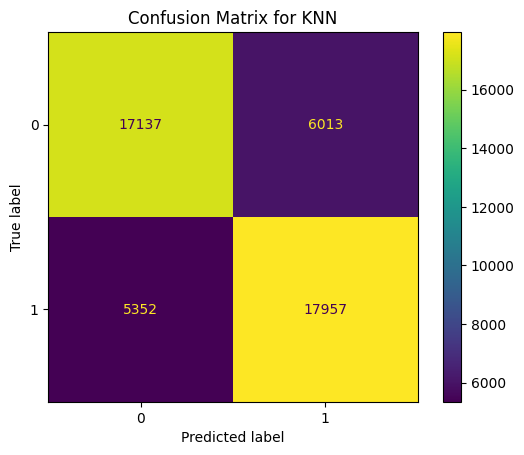

In [199]:
# Compute confusion matrix. Determine the True-Positive, True-Negative, False-Positive, False-Negative
print("Confusion Matrix for KNN:\n\n", confusion_matrix(y2_test, y2_pred))

# Confusion Matric plot

disp = ConfusionMatrixDisplay(confusion_matrix(y2_test, y2_pred))
disp.plot()
plt.title("Confusion Matrix for KNN")
plt.show()

####First Classification Report - KNN

In [201]:
target_names = ['No CA', 'CA']
print("Classification Report for KNN:\n\n", classification_report(y2_test, y2_pred, target_names=target_names))

Classification Report for KNN:

               precision    recall  f1-score   support

       No CA       0.76      0.74      0.75     23150
          CA       0.75      0.77      0.76     23309

    accuracy                           0.76     46459
   macro avg       0.76      0.76      0.76     46459
weighted avg       0.76      0.76      0.76     46459



#### Evaluating Curves and AUC

#####First Precision-Recall Curve - KNN

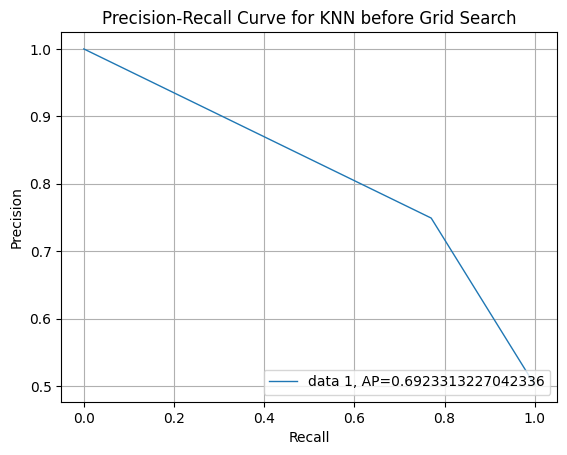

In [204]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y2_pred_proba1 = model_knn.predict_proba(scaled_X2_test)[:, 1]

# Calculate precision-recall curve
precision_knn1, recall_knn1, _ = precision_recall_curve(y2_test, y2_pred_proba1)

# Calculate average precision
ap_knn1 = average_precision_score(y2_test, y2_pred_proba1)

# Plot precision-recall curve
plt.plot(recall_knn1, precision_knn1, lw=1, label="data 1, AP=" + str(ap_knn1))
plt.legend(loc=4)
plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.title('Precision-Recall Curve (AP={:.2f})'.format(ap))
plt.title('Precision-Recall Curve for KNN before Grid Search')
plt.grid(True)

#####First ROC Curve - KNN

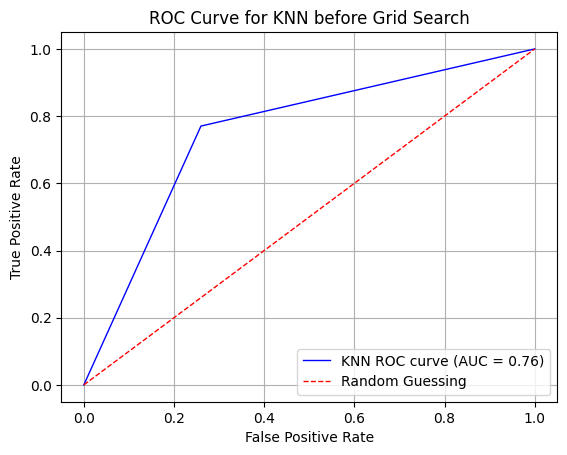

In [206]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y2_prob_knn = model_knn.predict_proba(scaled_X2_test)[:, 1]

# Calculate ROC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y2_test, y2_prob_knn)

# Calculate AUC (Area Under the Curve)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve
plt.plot(fpr_knn, tpr_knn, color='blue', lw=1, label='KNN ROC curve (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN before Grid Search')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Elbow Method for Choosing Reasonable K Values

In [208]:
test_error_rates = []


for k in range(1,30):
    best_model_knn = KNeighborsClassifier(n_neighbors=k)
    best_model_knn.fit(scaled_X2_train,y2_train)

    y2_pred2 = best_model_knn.predict(scaled_X2_test)

    test_error = 1 - accuracy_score(y2_test,y2_pred2)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

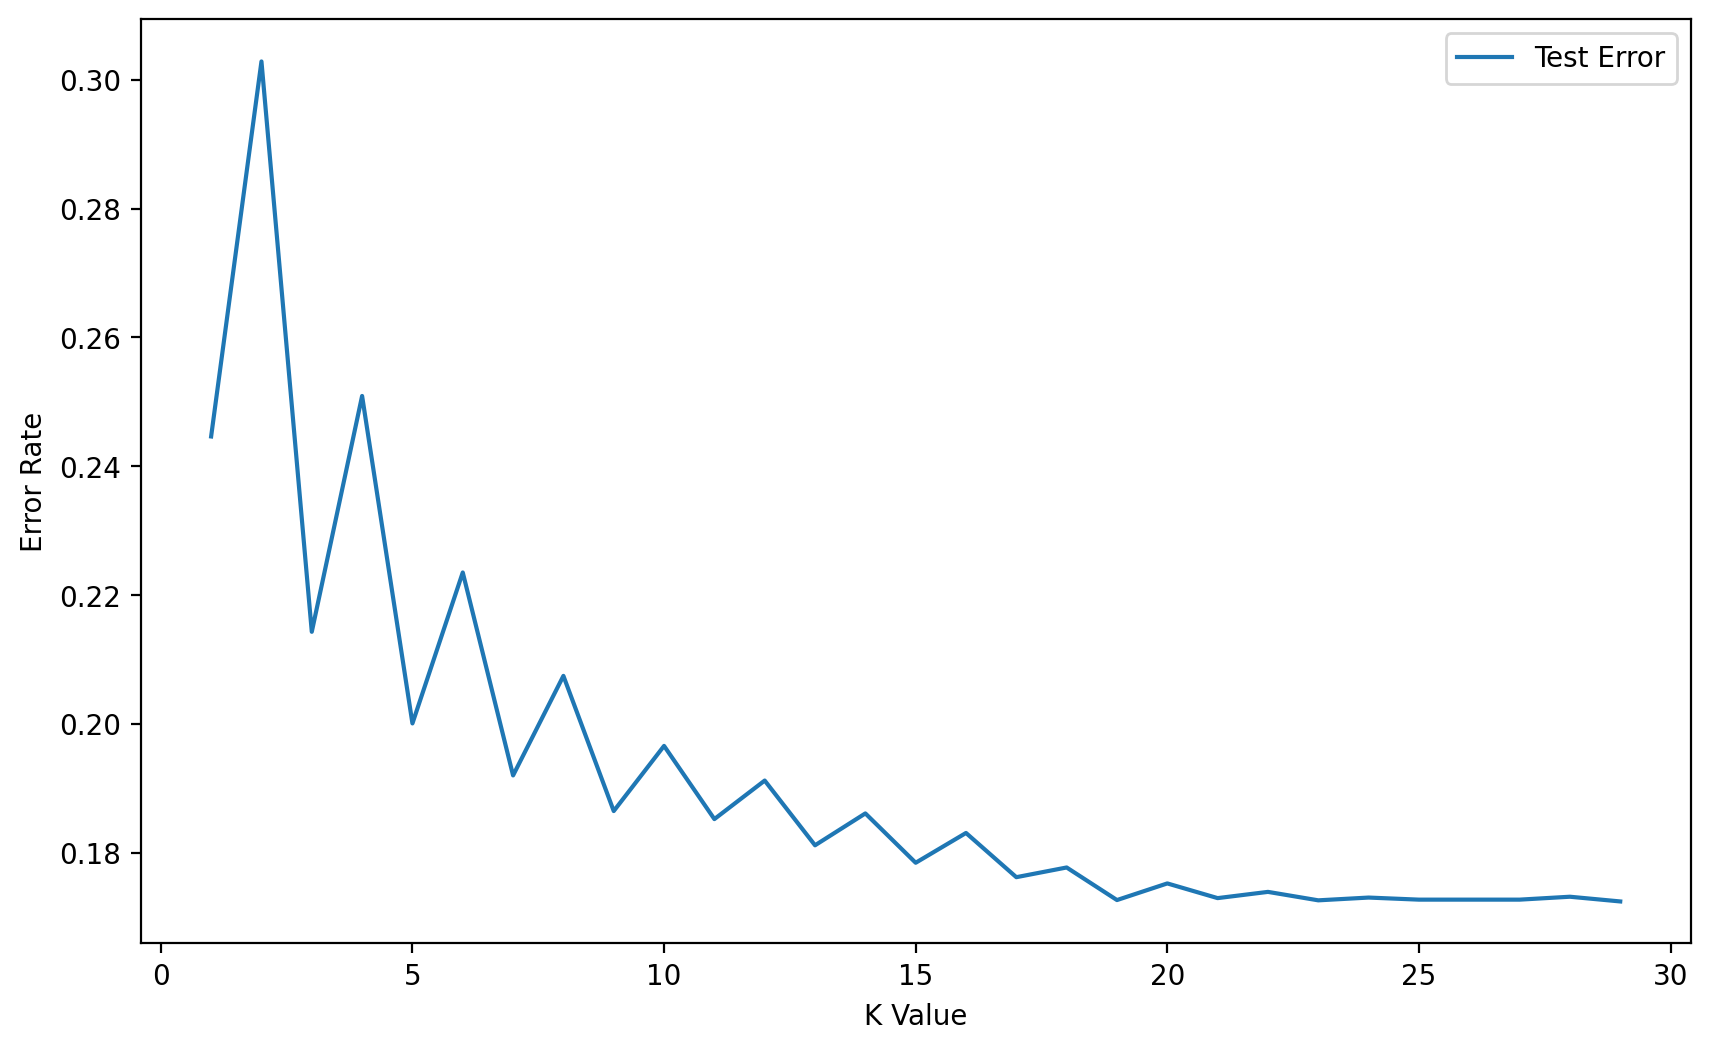

In [209]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

**Full Cross Validation Grid Search for K Value**

#### Creating a Pipeline to find K value

In [212]:
scaler_knn = StandardScaler()

In [213]:
knn = KNeighborsClassifier()

In [214]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [215]:
# Highly recommend string code matches variable name!
operations = [('scaler',scaler_knn),('knn',knn)]

In [216]:
from sklearn.pipeline import Pipeline

In [217]:
pipe = Pipeline(operations)

In [218]:
from sklearn.model_selection import GridSearchCV

In [219]:
k_values = list(range(1,20))

In [220]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [221]:
param_grid_knn = {'knn__n_neighbors': k_values}

In [222]:
full_cv_classifier = GridSearchCV(pipe,param_grid_knn,cv=10,scoring='accuracy')

In [223]:
# Use full X2 and y2 if you DON'T want a hold-out test set
# Use X2_train and y2_train if you DO want a holdout test set (X2_test,y2_test)
full_cv_classifier.fit(scaled_X2_train,y2_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [224]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=19))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=19),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 19,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [225]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

**How many total runs did we do?**

In [227]:
len(k_values)

19

In [228]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.75649191, 0.70013743, 0.78770886, 0.7500438 , 0.80262536,
       0.77906514, 0.81033734, 0.79686907, 0.81633342, 0.80710857,
       0.81989417, 0.8118224 , 0.82396234, 0.81799389, 0.82541065,
       0.82161927, 0.82708959, 0.82468193, 0.82895303])

In [229]:
len(full_cv_classifier.cv_results_['mean_test_score'])

19

**Final Model**

We just saw that our  GridSearch recommends a K=7 (is not in line with our alternative Elbow Method). Let's now use the PipeLine again, but this time, no need to do a grid search, instead we will evaluate on our hold-out Test Set.Based on cross validation K-value of 19, the accuracy score is .60.

In [231]:
scaler_knn2 = StandardScaler()
knn7= KNeighborsClassifier(n_neighbors=7)
operations = [('scaler',scaler_knn2),('knn7',knn7)]

In [232]:
pipe = Pipeline(operations)

In [233]:
pipe.fit(scaled_X2_train,y2_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn7', KNeighborsClassifier(n_neighbors=7))])

In [234]:
pipe_pred = pipe.predict(scaled_X2_test)

In [235]:
accuracy_score(y2_test,pipe_pred)

0.8080027551174154

####Second Confusion Matrix - KNN

Confusion Matrix for KNN after Grid Search:

 [[15790  7360]
 [ 1560 21749]]


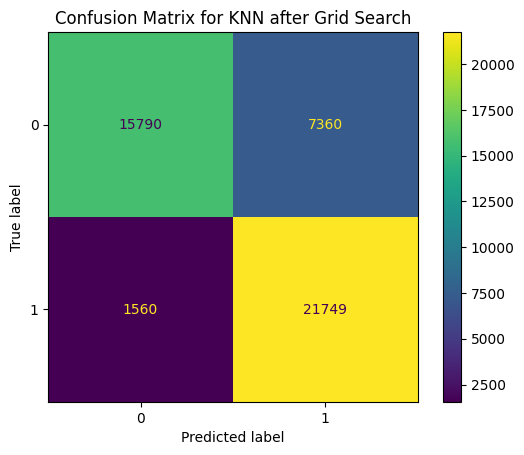

In [237]:
# Compute confusion matrix. Determine the True-Positive, True-Negative, False-Positive, False-Negative
print("Confusion Matrix for KNN after Grid Search:\n\n", confusion_matrix(y2_test, pipe_pred))# y2_pred2

# Confusion Matric plot
disp = ConfusionMatrixDisplay(confusion_matrix(y2_test,pipe_pred)) # y2_pred2
disp.plot()
plt.title("Confusion Matrix for KNN after Grid Search")
plt.show()

####Second Classification Report - KNN

In [239]:
target_names = ['No CA', 'CA']
print("Classification Report for KNN after Grid Search:\n\n", classification_report(y2_test, pipe_pred, target_names=target_names))

Classification Report for KNN after Grid Search:

               precision    recall  f1-score   support

       No CA       0.91      0.68      0.78     23150
          CA       0.75      0.93      0.83     23309

    accuracy                           0.81     46459
   macro avg       0.83      0.81      0.80     46459
weighted avg       0.83      0.81      0.80     46459



### Evaluating Curves and AUC

####Second Precision-Recall Curve - KNN

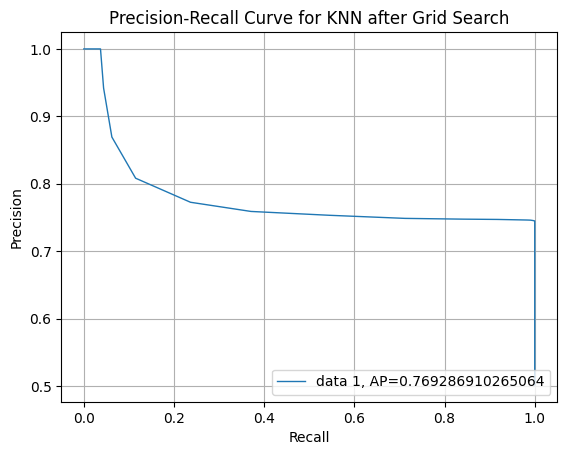

In [242]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y2_pred_proba2 = best_model_knn.predict_proba(scaled_X2_test)[:, 1]

# Calculate precision-recall curve
precision_knn2, recall_knn2, _ = precision_recall_curve(y2_test, y2_pred_proba2)

# Calculate average precision
ap_knn2 = average_precision_score(y2_test, y2_pred_proba2)

# Plot precision-recall curve
plt.plot(recall_knn2, precision_knn2, lw=1, label="data 1, AP=" + str(ap_knn2))
plt.legend(loc=4)
plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.title('Precision-Recall Curve (AP={:.2f})'.format(ap))
plt.title('Precision-Recall Curve for KNN after Grid Search')
plt.grid(True)
plt.show()

####Second ROC Curve - KNN

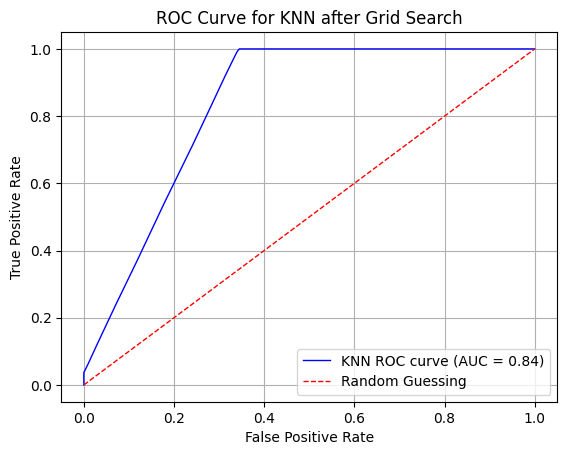

In [244]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y2_prob_knn2 = best_model_knn.predict_proba(scaled_X2_test)[:, 1]

# Calculate ROC curve
fpr_knn_gs, tpr_knn_gs, thresholds_knn_gs = roc_curve(y2_test, y2_prob_knn2)

# Calculate AUC (Area Under the Curve)
roc_auc_knn2 = auc(fpr_knn_gs, tpr_knn_gs)

# Plot ROC curve
plt.plot(fpr_knn_gs, tpr_knn_gs, color='blue', lw=1, label='KNN ROC curve (AUC = %0.2f)' % roc_auc_knn2)
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN after Grid Search')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [245]:
single_sample = X2_test.iloc[40]

In [246]:
single_sample

age                           5
race_eth                      3
density_c                     4
resfnl_c3                     0
cancscrfu1yr_c                1
riskBCSC_v2_5y_cat_numeric    2
Name: 122294, dtype: object

###Feature Importance Plot

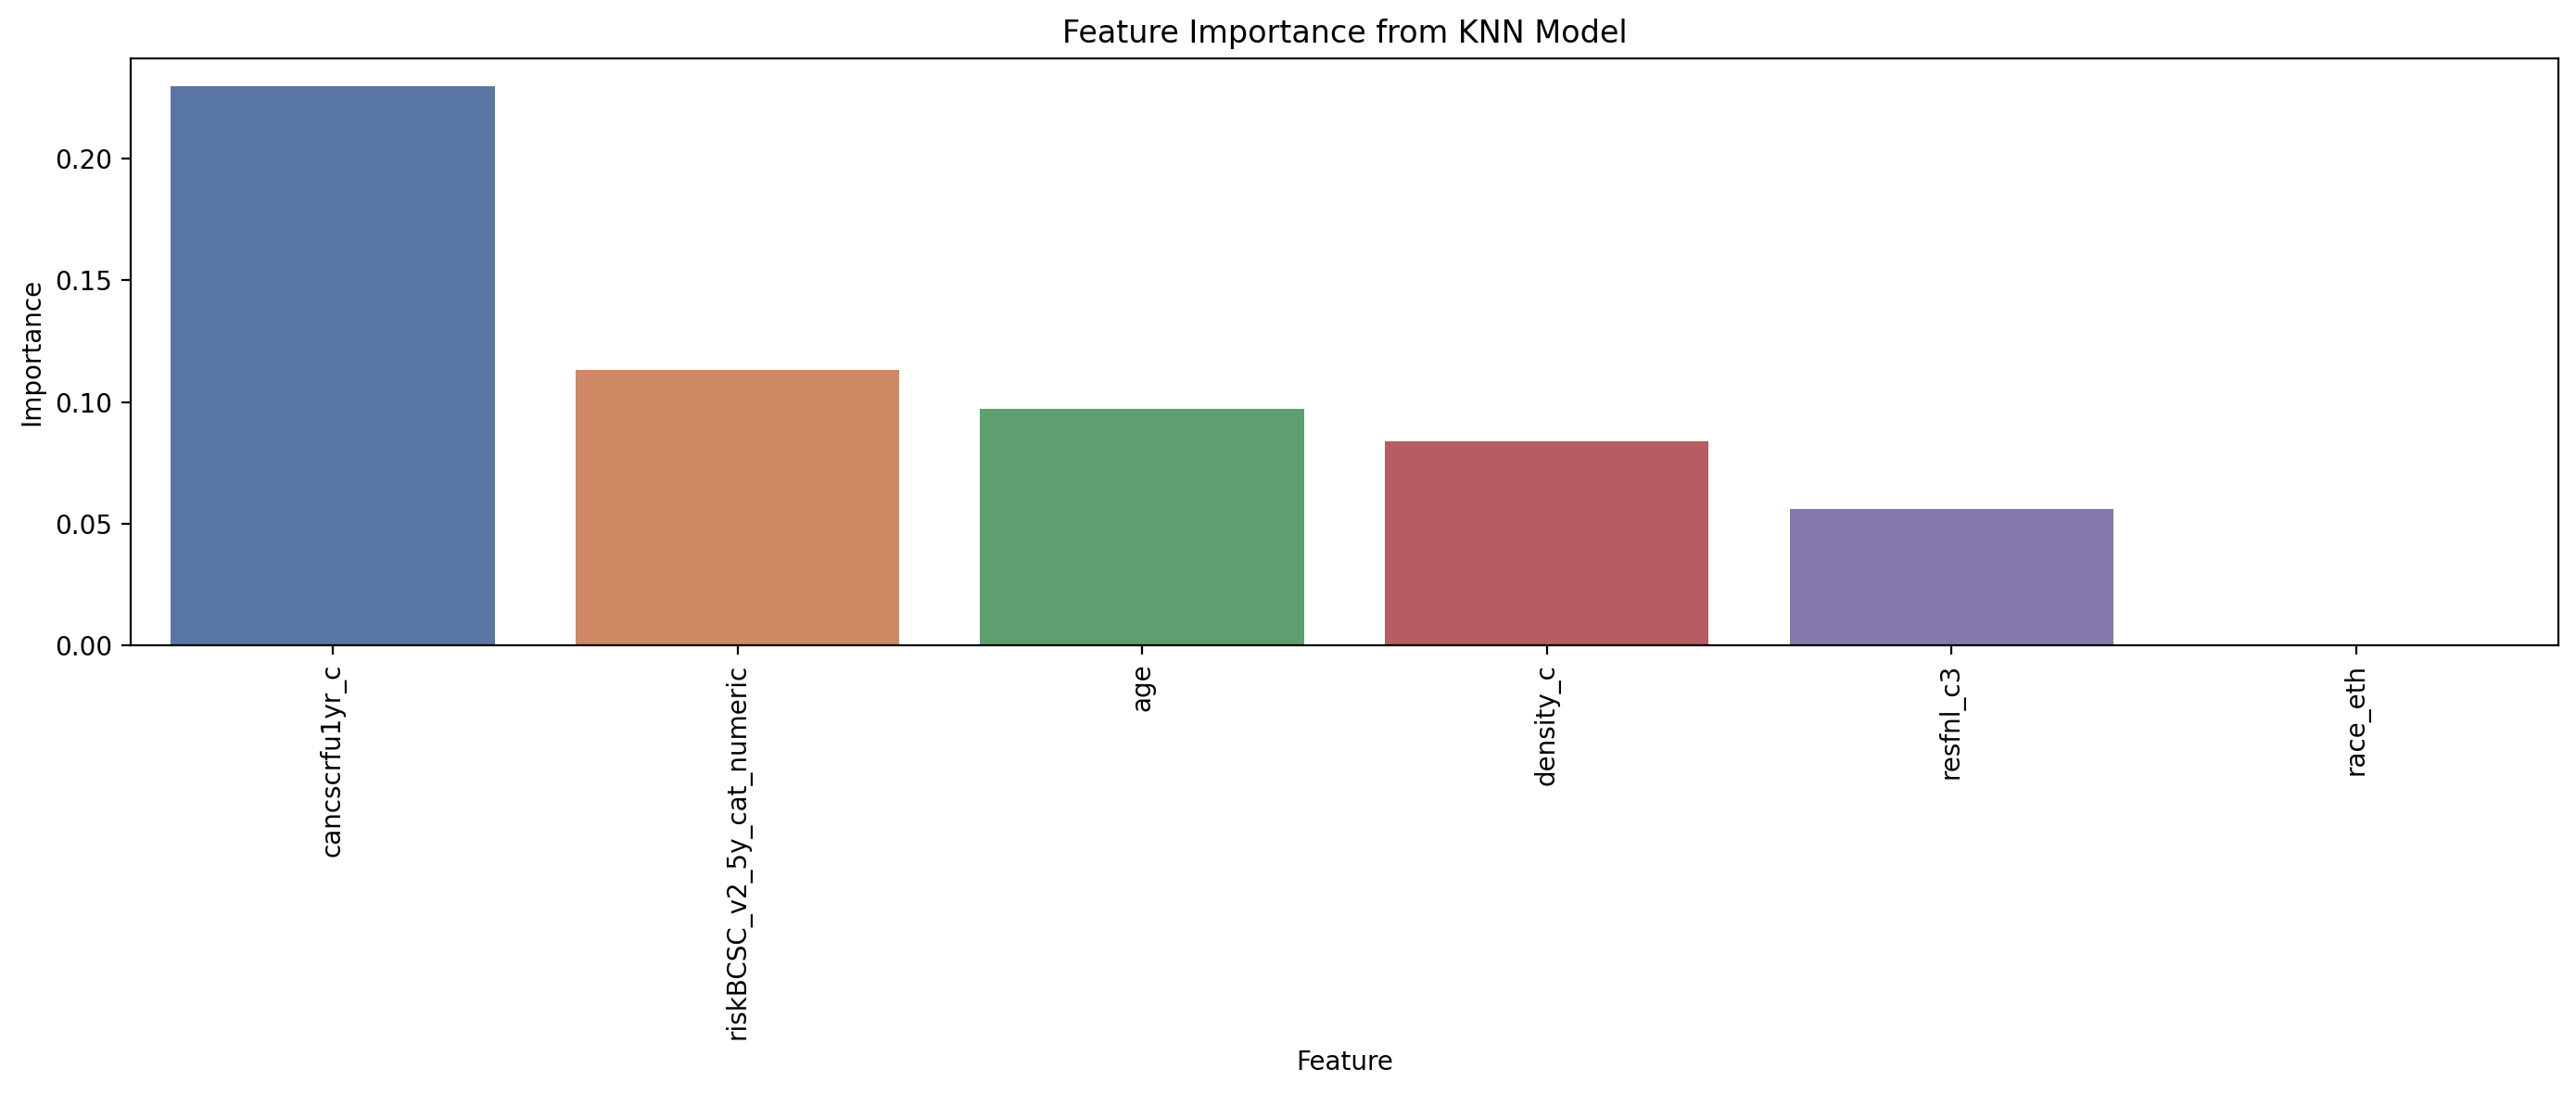

In [248]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# Calculate permutation feature importances
perm_importance = permutation_importance(best_model_knn, scaled_X2_train, y2_train, n_repeats=30, random_state=50)

# Create a DataFrame with feature importances
feats_knn = pd.DataFrame(index=X2.columns, data=perm_importance.importances_mean, columns=['Importance'])

# Sort the dataframe by the values in the "Importance" column in descending order
feats_knn = feats_knn.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(14, 6), dpi=200)
sns.barplot(data=feats_knn.reset_index(), x='index', y='Importance', palette='deep')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from KNN Model')
plt.tight_layout()
plt.show()

## SVM - Support Vector Machines

### Train|Test Split and Scaling Data

In [180]:
# # Split the data into features and target variable
X3 = final_df.drop('stage_advanced', axis=1)
y3 = final_df['stage_advanced']

In [182]:
from sklearn.model_selection import train_test_split

In [184]:
# Splitting the DataFrame, X3 and the Series, y3 to a train set and a test set in a 70/30 ratio.
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, train_size=0.7, random_state=50)
print("Training data size:", X3_train.shape[0])

Training data size: 110532


In [186]:
#  Standardize the data
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler_svm = StandardScaler()

In [188]:
scaled_X3_train = scaler_svm.fit_transform(X3_train)
scaled_X3_test = scaler_svm.transform(X3_test)

### Modeling

In [191]:
from sklearn.svm import SVC # Supprt Vector Classifier

In [193]:
model_svm = SVC(probability=True)

# Fit the SVM model to the training data
model_svm.fit(scaled_X3_train, y3_train)

SVC(probability=True)

### Model Evaluation

In [196]:
# Make predictions on the test set
y3_pred = model_svm.predict(scaled_X3_test)

In [261]:
# Calculate accuracy score
accuracy_svm = accuracy_score(y3_test, y3_pred)
print('Accuracy:', accuracy_svm)

Accuracy: 0.7902236380464496


####First Confusion Matrix - SVM

Confusion Matrix for SVM: 

[[13404  9746]
 [    0 23309]]


Text(0.5, 1.0, 'Confusion Matrix for SVM')

<Figure size 200x100 with 0 Axes>

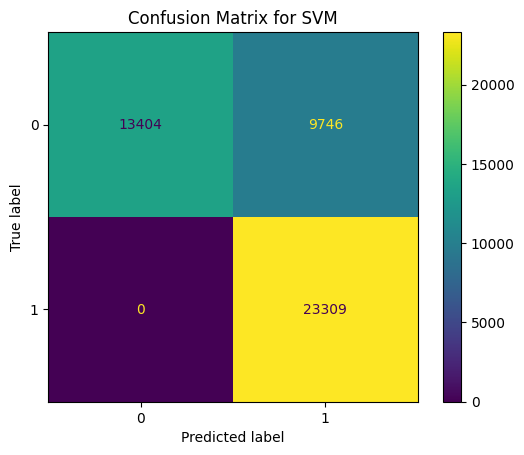

In [263]:
# Compute confusion matrix
cm_svm = confusion_matrix(y3_test, y3_pred)
print('Confusion Matrix for SVM: \n')
print(cm_svm)

# Confusion Matric plot
plt.figure(figsize=(2, 1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()
plt.title('Confusion Matrix for SVM')
# plt.show()

####First Classification Report - SVM

In [265]:
# # Generate classification report
target_names = ['No CA', 'CA']
print("Classification Report for SVM:\n\n", classification_report(y3_test, y3_pred, target_names=target_names))

Classification Report for SVM:

               precision    recall  f1-score   support

       No CA       1.00      0.58      0.73     23150
          CA       0.71      1.00      0.83     23309

    accuracy                           0.79     46459
   macro avg       0.85      0.79      0.78     46459
weighted avg       0.85      0.79      0.78     46459



#### Evaluating Curves and AUC

#####First Precision-Recall Curve - SVM

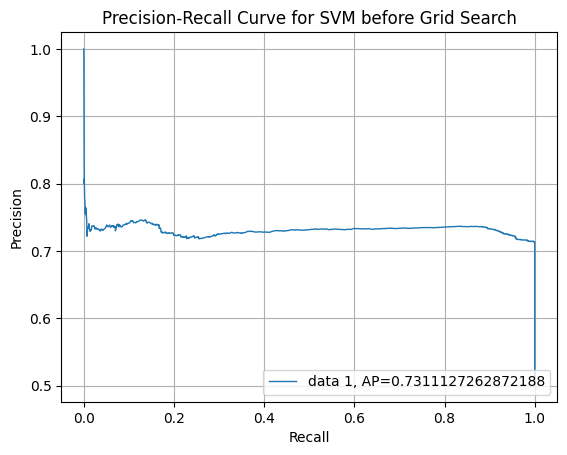

In [198]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y3_pred_proba1 = model_svm.predict_proba(scaled_X3_test)[:, 1]

# Calculate precision-recall curve
precision_svm1, recall_svm1, _ = precision_recall_curve(y3_test, y3_pred_proba1)

# Calculate average precision
ap_svm1 = average_precision_score(y3_test, y3_pred_proba1)

# Plot precision-recall curve
plt.plot(recall_svm1, precision_svm1, lw=1, label="data 1, AP=" + str(ap_svm1))
plt.legend(loc=4)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM before Grid Search')
plt.grid(True)
plt.show()

#####First ROC Curve - SVM

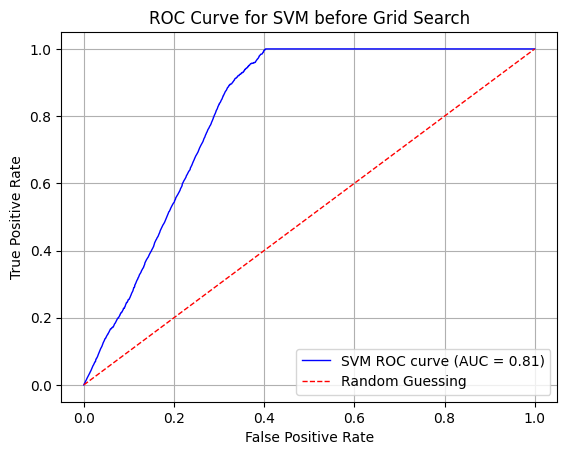

In [199]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y3_prob_svm = model_svm.predict_proba(scaled_X3_test)[:, 1]

# Calculate ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y3_test, y3_prob_svm)

# Calculate AUC (Area Under the Curve)
roc_auc_svm1 = auc(fpr_svm, tpr_svm)

# Plot ROC curve
plt.plot(fpr_svm, tpr_svm, color='blue', lw=1, label='SVM ROC curve (AUC = %0.2f)' % roc_auc_svm1)
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM before Grid Search')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### Grid Search in Attempt for Better Model

In [203]:
from sklearn.model_selection import GridSearchCV

In [205]:
# Define the parameter grid
param_grid_svm = {'C': [0.01, 0.1, 1], 'kernel': ['linear']}

# Initialize an SVM classifier
svm = SVC(probability=True)

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5)

# Fit the GridSearchCV to the training data
grid_search_svm.fit(scaled_X3_train, y3_train)

# Get the best parameters and best score
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_
print("Best Parameters:", best_params_svm)
print("Best Score:", best_score_svm)

# Make predictions on the test set using the best model
best_model_svm = grid_search_svm.best_estimator_
y3_pred_svm = best_model_svm.predict(scaled_X3_test)

# Evaluate the model
accuracy = accuracy_score(y3_test, y3_pred_svm)
print("Accuracy:", accuracy)

Best Parameters: {'C': 0.01, 'kernel': 'linear'}
Best Score: 0.7723284064843554
Accuracy: 0.7738748627881449


#####Second Confusion Matrix - SVM

Confusion Matrix for SVM after Grid Search: 

[[13404  9746]
 [    0 23309]]


Text(0.5, 1.0, 'Confusion Matrix for SVM after Grid Search')

<Figure size 200x100 with 0 Axes>

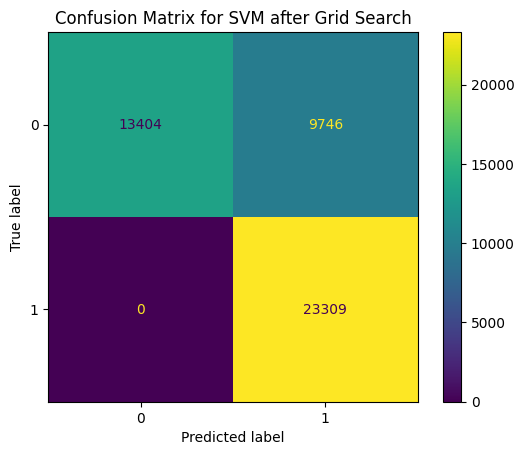

In [275]:
# Confusion matrix
cm_svm2 = confusion_matrix(y3_test, y3_pred_svm)
print('Confusion Matrix for SVM after Grid Search: \n')
print(cm_svm2)

# Display Confusion Matrix
plt.figure(figsize=(2, 1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm2)
disp.plot()
plt.title('Confusion Matrix for SVM after Grid Search')

#####Second Classification Report - SVM

In [277]:
# Generate classification report

target_names = ['No CA', 'CA']
print("Classification Report for SVM after Grid Search:\n\n", classification_report(y3_test, y3_pred_svm, target_names=target_names))

Classification Report for SVM after Grid Search:

               precision    recall  f1-score   support

       No CA       1.00      0.58      0.73     23150
          CA       0.71      1.00      0.83     23309

    accuracy                           0.79     46459
   macro avg       0.85      0.79      0.78     46459
weighted avg       0.85      0.79      0.78     46459



#####Evaluating curves and AUC

######Second Precision-Recall Curve - SVM

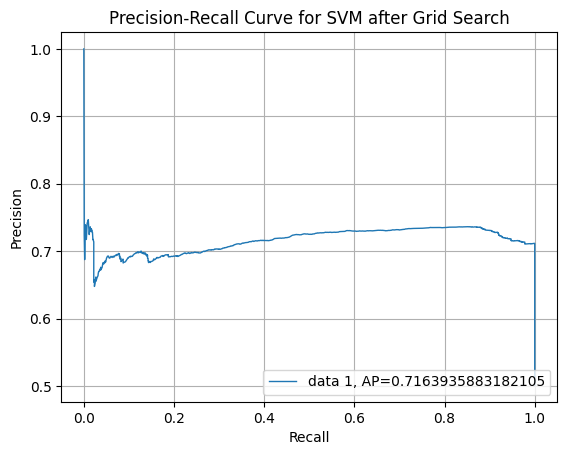

In [280]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Get predicted probabilities
y3_pred_proba2 = best_model_svm.predict_proba(scaled_X3_test)[:, 1]

# Calculate precision-recall curve
precision_svm2, recall_svm2, _ = precision_recall_curve(y3_test, y3_pred_proba2)

# Calculate average precision
ap_svm2 = average_precision_score(y3_test, y3_pred_proba2)

# Plot precision-recall curve
plt.plot(recall_svm2, precision_svm2, lw=1, label="data 1, AP=" + str(ap_svm2))
plt.legend(loc=4)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM after Grid Search')
plt.grid(True)
plt.show()

######Second ROC Curve - SVM

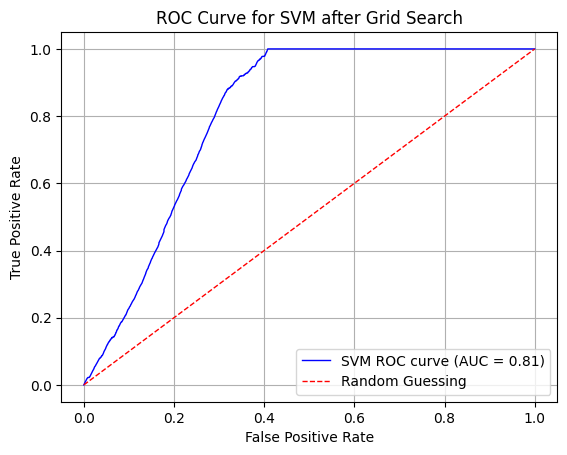

In [282]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y3_prob_svm2 = best_model_svm.predict_proba(scaled_X3_test)[:, 1]

# Calculate ROC curve
fpr_svm_gs, tpr_svm_gs, thresholds_svm_gs = roc_curve(y3_test, y3_prob_svm2)

# Calculate AUC (Area Under the Curve)
roc_auc_svm2 = auc(fpr_svm_gs, tpr_svm_gs)

# Plot ROC curve
plt.plot(fpr_svm_gs, tpr_svm_gs, color='blue', lw=1, label='SVM ROC curve (AUC = %0.2f)' % roc_auc_svm2)
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM after Grid Search')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

####Feature Importance Plot

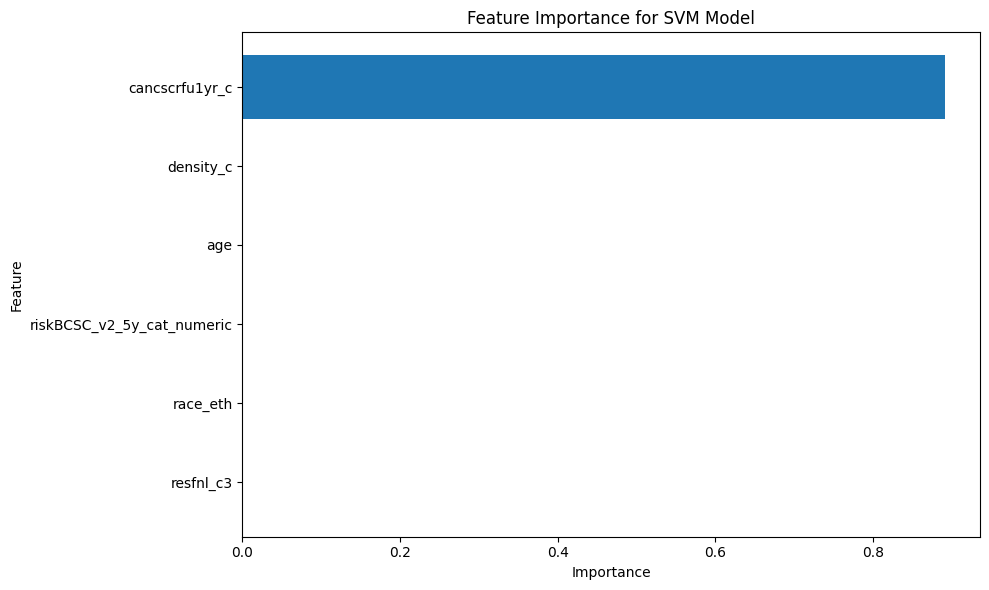

In [207]:
import matplotlib.pyplot as plt

# Create the feature importance plot
coefficients = best_model_svm.coef_[0]
feature_importance = pd.DataFrame({'Feature': X3.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])

# Customize the plot
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for SVM Model')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

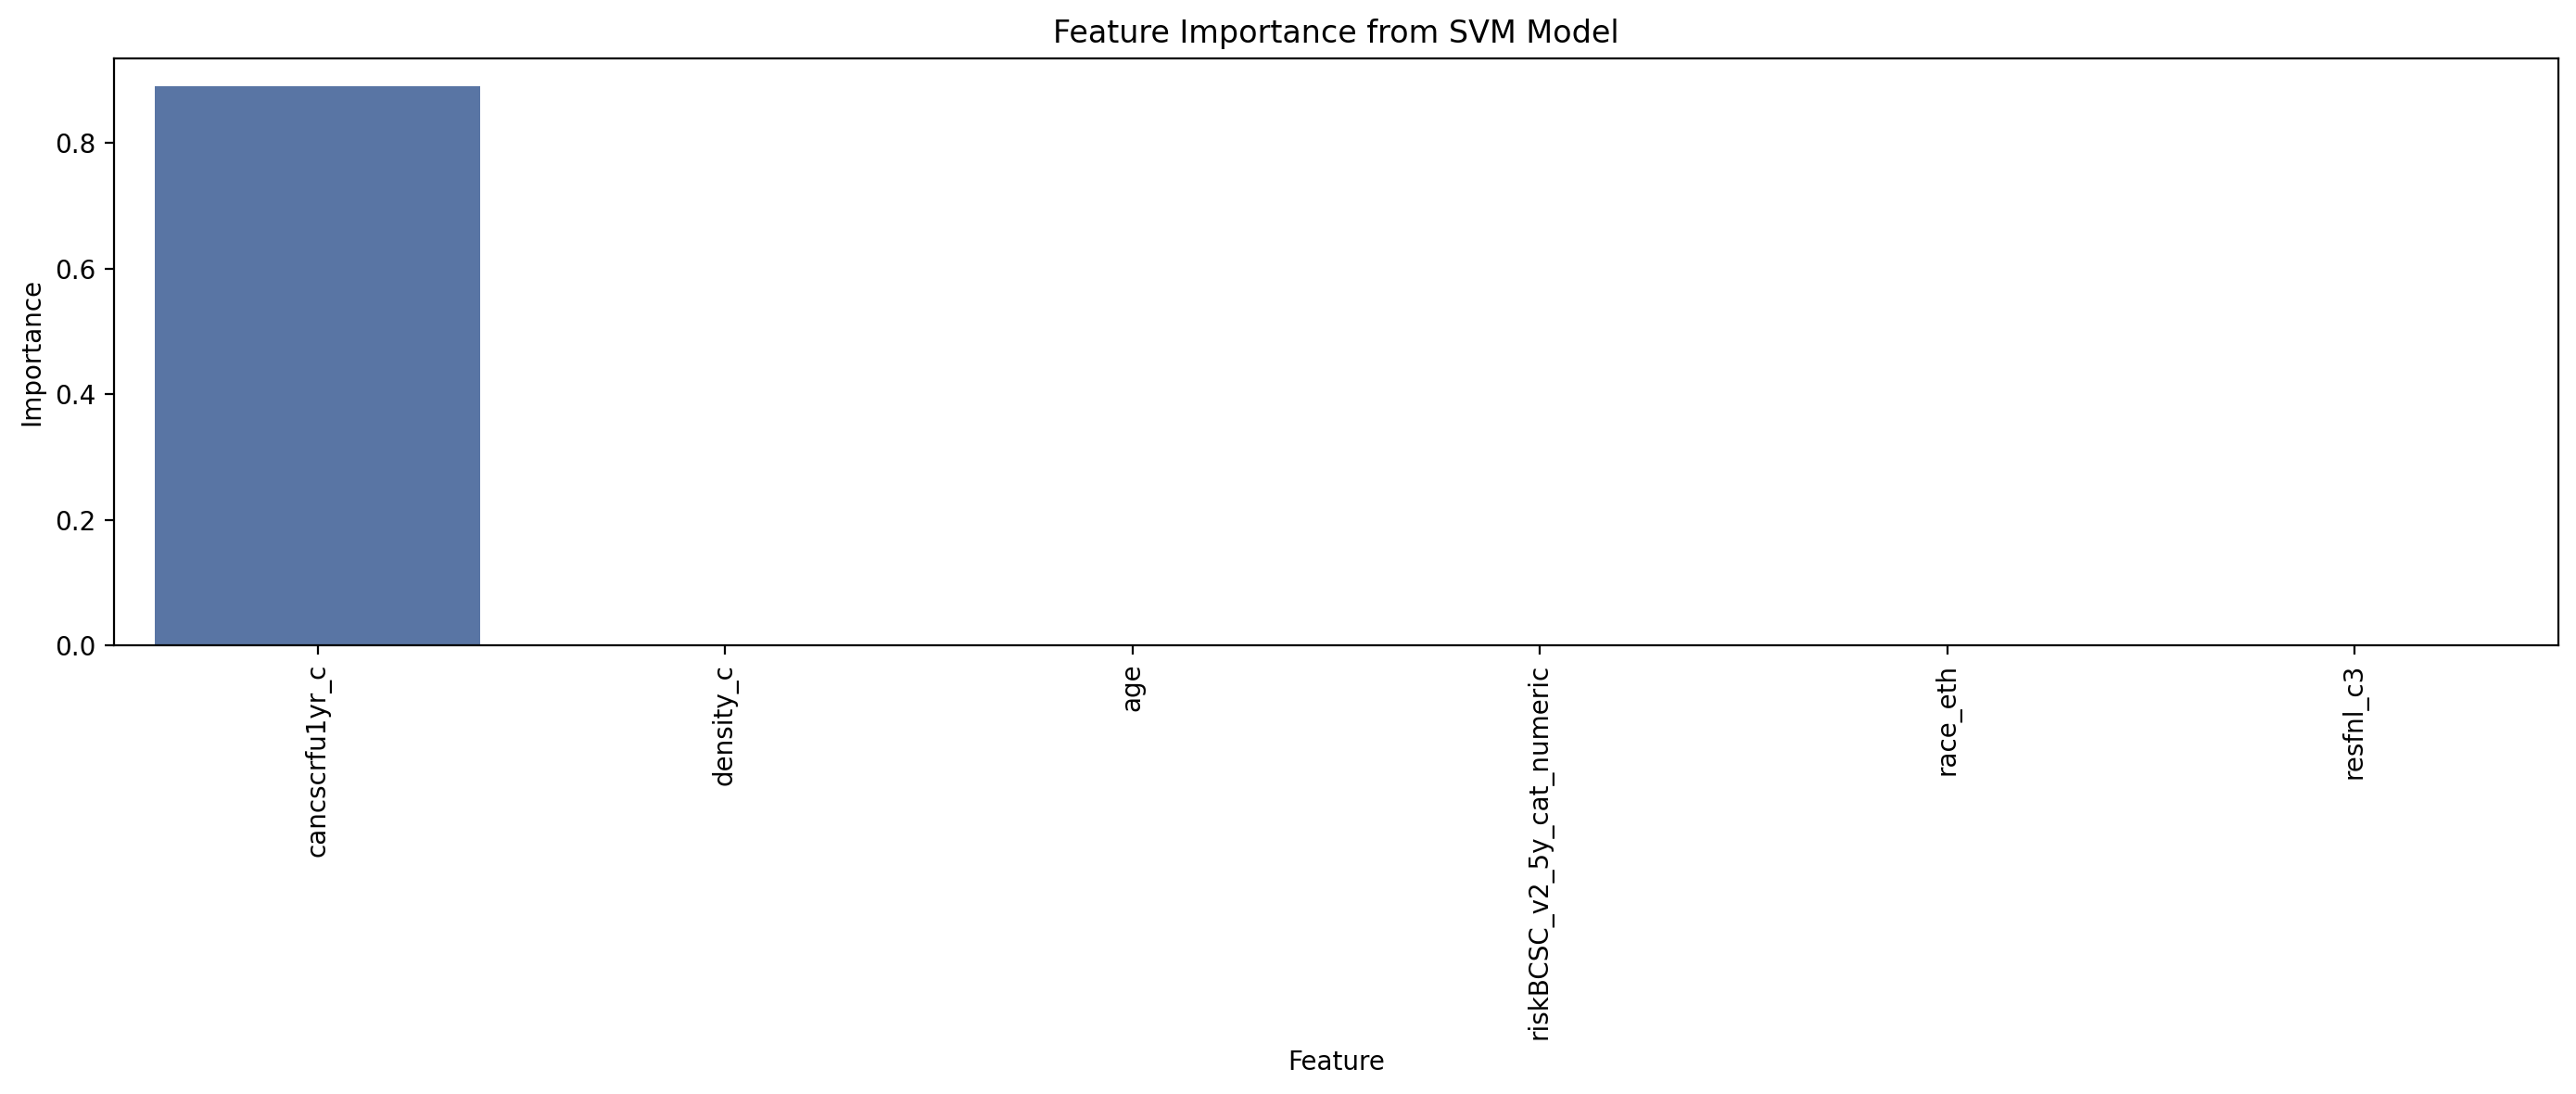

In [209]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Extract the coefficients of the SVM model
coefficients = best_model_svm.coef_[0]

# Get the absolute values of coefficients for feature importance
feature_importance = abs(coefficients)

# Create a DataFrame with feature importances
feats_svm = pd.DataFrame(index=X3.columns, data=feature_importance, columns=['Importance'])

# Filter the dataframe to select only those rows where the value in the "Importance" column is greater than 0
imp_feats_svm = feats_svm[feats_svm['Importance'] > 0]

# Sort the dataframe by the values in the "Importance" column in ascending order
imp_feats_svm = imp_feats_svm.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(14, 6), dpi=200)
sns.barplot(data=imp_feats_svm.reset_index(), x='index', y='Importance', palette='deep')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from SVM Model')
plt.tight_layout()
plt.show()

##Decision Trees

### Train | Test Split and Scaling Data

In [287]:
X4 = final_df.drop('stage_advanced', axis=1)
y4 = final_df['stage_advanced']

In [288]:
from sklearn.model_selection import train_test_split

In [289]:
# Splitting the DataFrame, X4 and the Series, y4 to a train set and a test set in a 70/30 ratio.
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, train_size=0.7, random_state=50)

In [290]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler_dt = StandardScaler()

In [291]:
scaled_X4_train = scaler_dt.fit_transform(X4_train)
scaled_X4_test = scaler_dt.transform(X4_test)

### Modeling

In [293]:
from sklearn.tree import DecisionTreeClassifier

In [294]:
model_dt = DecisionTreeClassifier()

In [295]:
#Fit the model to the training data
model_dt.fit(scaled_X4_train,y4_train)

DecisionTreeClassifier()

In [296]:
# Make predictions on the test set
y4_pred = model_dt.predict(scaled_X4_test)

### Model Evaluation

#####First Confusion Matrix - Decision Tree

In [299]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

Confusion Matrix for Decision Tree: 

[[15244  7906]
 [   20 23289]]


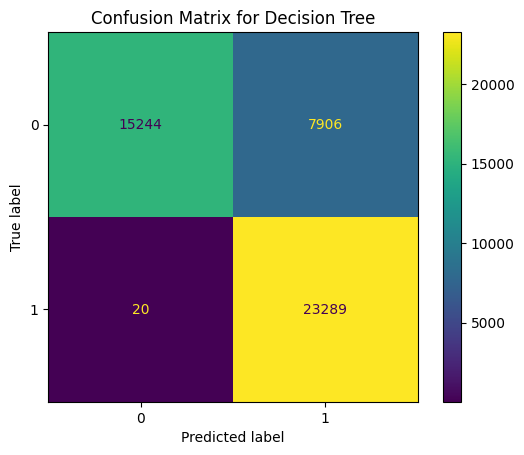

In [300]:
# Confusion Matrix
cm_dt1 = confusion_matrix(y4_test, y4_pred)
print('Confusion Matrix for Decision Tree: \n')
print(cm_dt1)

# Confusion Matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt1)
disp.plot()
plt.title("Confusion Matrix for Decision Tree")
plt.show()

#####First Classification Report - Decision Tree

In [302]:
# Classification Report

target_names = ['No CA', 'CA']
print("Classification Report for Decision Tree:\n\n", classification_report(y4_test,y4_pred, target_names=target_names))

Classification Report for Decision Tree:

               precision    recall  f1-score   support

       No CA       1.00      0.66      0.79     23150
          CA       0.75      1.00      0.85     23309

    accuracy                           0.83     46459
   macro avg       0.87      0.83      0.82     46459
weighted avg       0.87      0.83      0.82     46459



In [303]:
# Evaluate the model to find the accuracy of our model. In this case, the model can successfully predict the response label 53.1% of the time.
accuracy_dt = accuracy_score(y4_test, y4_pred, normalize=True, sample_weight=None)
print("Accuracy:", accuracy_dt)

Accuracy: 0.8293979637960353


####Feature Importance

In [305]:
model_dt.feature_importances_

array([0.12867888, 0.00797915, 0.03188887, 0.03853295, 0.73155594,
       0.06136421])

In [306]:
pd.DataFrame(index=X4.columns,data=model_dt.feature_importances_,columns=['Feature Importance'])

Feature Importance
age                                   0.128679
race_eth                              0.007979
density_c                             0.031889
resfnl_c3                             0.038533
cancscrfu1yr_c                        0.731556
riskBCSC_v2_5y_cat_numeric            0.061364

#### Evaluating Curves and AUC

#####First Precision-Recall Curve - Decision Tree


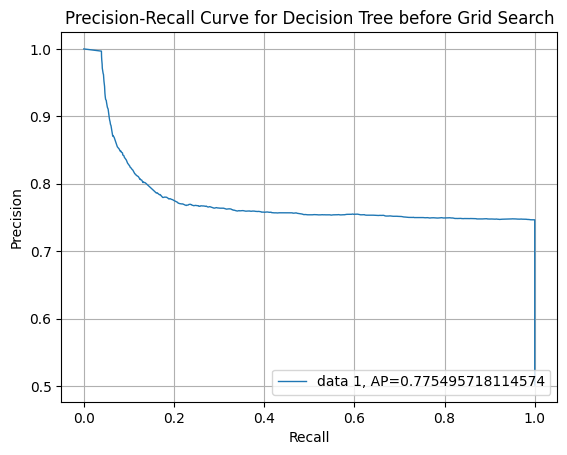

In [309]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Predict probabilities on the test set
y4_pred_proba1 = model_dt.predict_proba(scaled_X4_test)[:, 1]

# Calculate precision and recall
precision_dt1, recall_dt1, _ = precision_recall_curve(y4_test, y4_pred_proba1)

# Calculate average precision
ap_dt1 = average_precision_score(y4_test, y4_pred_proba1)

# Plot precision-recall curve
plt.plot(recall_dt1, precision_dt1, lw=1, label="data 1, AP=" + str(ap_dt1))
plt.legend(loc=4)
plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.title('Precision-Recall Curve (AP={:.2f})'.format(ap))
plt.title('Precision-Recall Curve for Decision Tree before Grid Search')
plt.grid(True)
plt.show()

#####First ROC Curve - Decision Tree

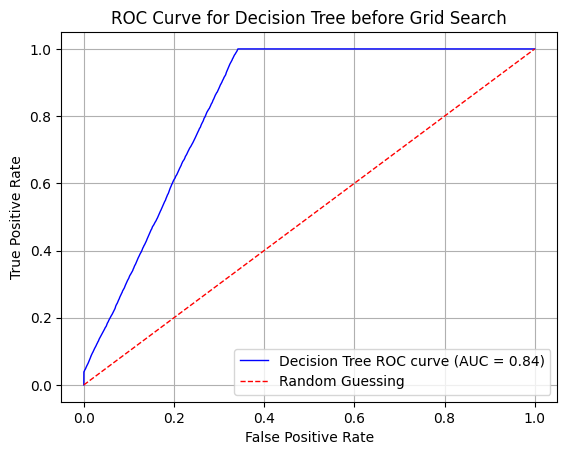

In [311]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y4_prob_dt  = model_dt.predict_proba(scaled_X4_test)[:, 1]

# Calculate ROC curve
fpr_dt, tpr_dt, thresholds = roc_curve(y4_test, y4_prob_dt)

# Calculate AUC (Area Under the Curve)
roc_auc_dt1 = auc(fpr_dt, tpr_dt)

# Plot ROC curve
plt.plot(fpr_dt, tpr_dt, color='blue', lw=1, label='Decision Tree ROC curve (AUC = %0.2f)' % roc_auc_dt1)
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree before Grid Search')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### Grid Search in Attempt for Better Model

In [313]:
from sklearn.model_selection import GridSearchCV

In [314]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

In [315]:
# Define the hyperparameter grid
param_grid_dt1 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [316]:
# Perform GridSearchCV
best_model_dt = GridSearchCV(dt_classifier, param_grid_dt1, cv=5, scoring='accuracy', verbose=1)

In [317]:
# Fit the grid search to the data
best_model_dt.fit(scaled_X4_train, y4_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [318]:
# Capture the best parameters and best score based on the training dataset
best_params_dt1 = best_model_dt.best_params_
best_score_dt1 = best_model_dt.best_score_
print(f'best parameters: {best_params_dt1}')
print(f'best score: {best_score_dt1}')
#print(f'best parameters: {best_params}, best score: {best_score}')

best parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
best score: 0.831185444990606


In [319]:
from sklearn.tree import DecisionTreeClassifier

# Create a new instance of DecisionTreeClassifier with the best parameters
best_model_dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4, min_samples_split=2)

In [320]:
# Train the model with the best parameters on the training data
best_model_dt2.fit(scaled_X4_train, y4_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4)

In [321]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y4_pred2 = best_model_dt2.predict(scaled_X4_test)

In [322]:
# Calculate the accuracy of the model
accuracy_dt2 = accuracy_score(y4_test, y4_pred2)

print("Accuracy of grid search with best parameters:", accuracy_dt2)

Accuracy of grid search with best parameters: 0.7845412083772789


#####Second Confusion Matrix - Decision Tree

Confusion Matrix for Decision Tree after Grid Search:

[[13267  9883]
 [  127 23182]]


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree after Grid Search')

<Figure size 200x100 with 0 Axes>

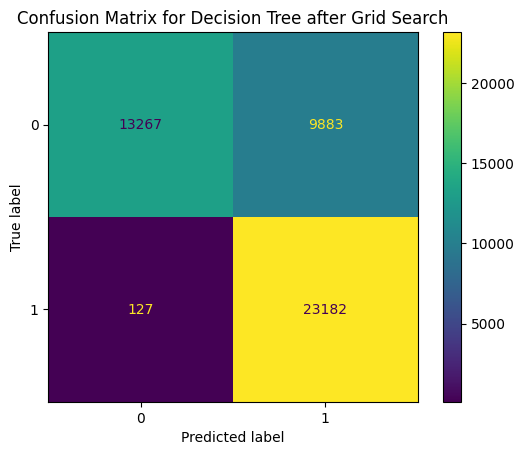

In [324]:
# Confusion matrix
cm_dt2 = confusion_matrix(y4_test, y4_pred2)
print('Confusion Matrix for Decision Tree after Grid Search:\n')
print(cm_dt2)

# Display Confusion Matrix
plt.figure(figsize=(2, 1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt2)
disp.plot()
plt.title('Confusion Matrix for Decision Tree after Grid Search')

#####Second Classification Report - Decision Tree

In [326]:
# Generate classification report

target_names = ['No CA', 'CA']
print("Classification Report for Decision Tree after Grid Search:\n\n", classification_report(y4_test,y4_pred2, target_names=target_names))

Classification Report for Decision Tree after Grid Search:

               precision    recall  f1-score   support

       No CA       0.99      0.57      0.73     23150
          CA       0.70      0.99      0.82     23309

    accuracy                           0.78     46459
   macro avg       0.85      0.78      0.77     46459
weighted avg       0.85      0.78      0.77     46459



##### Evaluating Curves and AUC

#####Second Precision-Recall Curve - Decision Tree

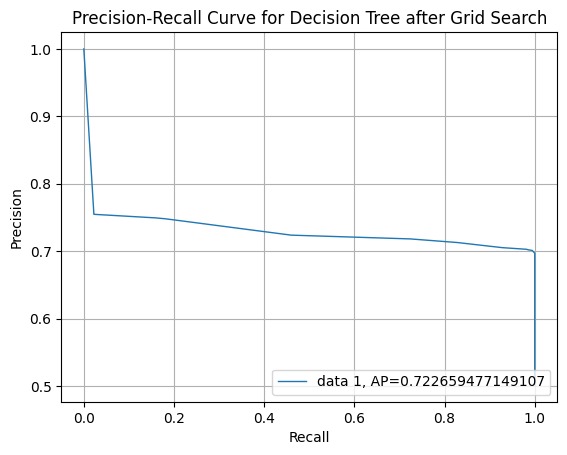

In [329]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Predict probabilities on the test set
y4_pred_proba2 = best_model_dt2.predict_proba(scaled_X4_test)[:, 1]

# Calculate precision and recall
precision_dt2, recall_dt2, _ = precision_recall_curve(y4_test, y4_pred_proba2)

# Calculate average precision
ap_dt2 = average_precision_score(y4_test, y4_pred_proba2)

# Plot precision-recall curve
plt.plot(recall_dt2, precision_dt2, lw=1, label="data 1, AP=" + str(ap_dt2))
plt.legend(loc=4)
plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.title('Precision-Recall Curve (AP={:.2f})'.format(ap))
plt.title('Precision-Recall Curve for Decision Tree after Grid Search')
plt.grid(True)
plt.show()

#####Second ROC Curve - Decision Tree

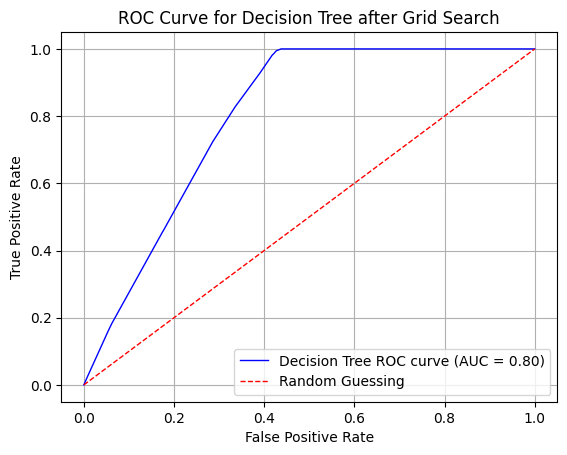

In [331]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y4_prob_dt2 = best_model_dt2.predict_proba(scaled_X4_test)[:, 1]

# Calculate ROC curve
fpr_dt_gs, tpr_dt_gs, thresholds_dt = roc_curve(y4_test, y4_prob_dt2)

# Calculate AUC (Area Under the Curve)
roc_auc_dt2 = auc(fpr_dt_gs, tpr_dt_gs)

# Plot ROC curve
plt.plot(fpr_dt_gs, tpr_dt_gs, color='blue', lw=1, label='Decision Tree ROC curve (AUC = %0.2f)' % roc_auc_dt2)
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree after Grid Search')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Visualize the Tree

In [333]:
from sklearn.tree import plot_tree

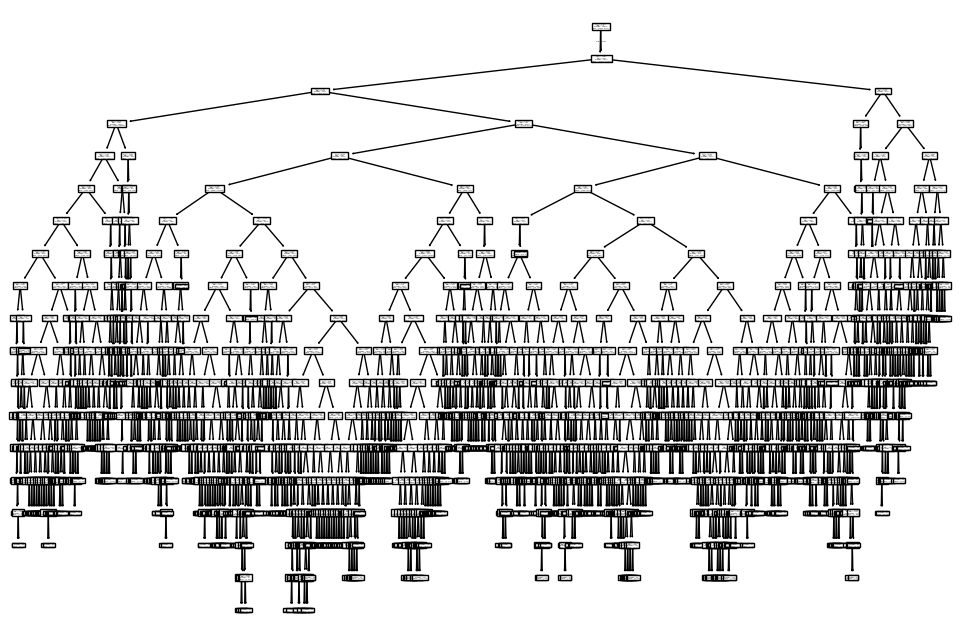

In [334]:
plt.figure(figsize=(12,8))
plot_tree(model_dt);

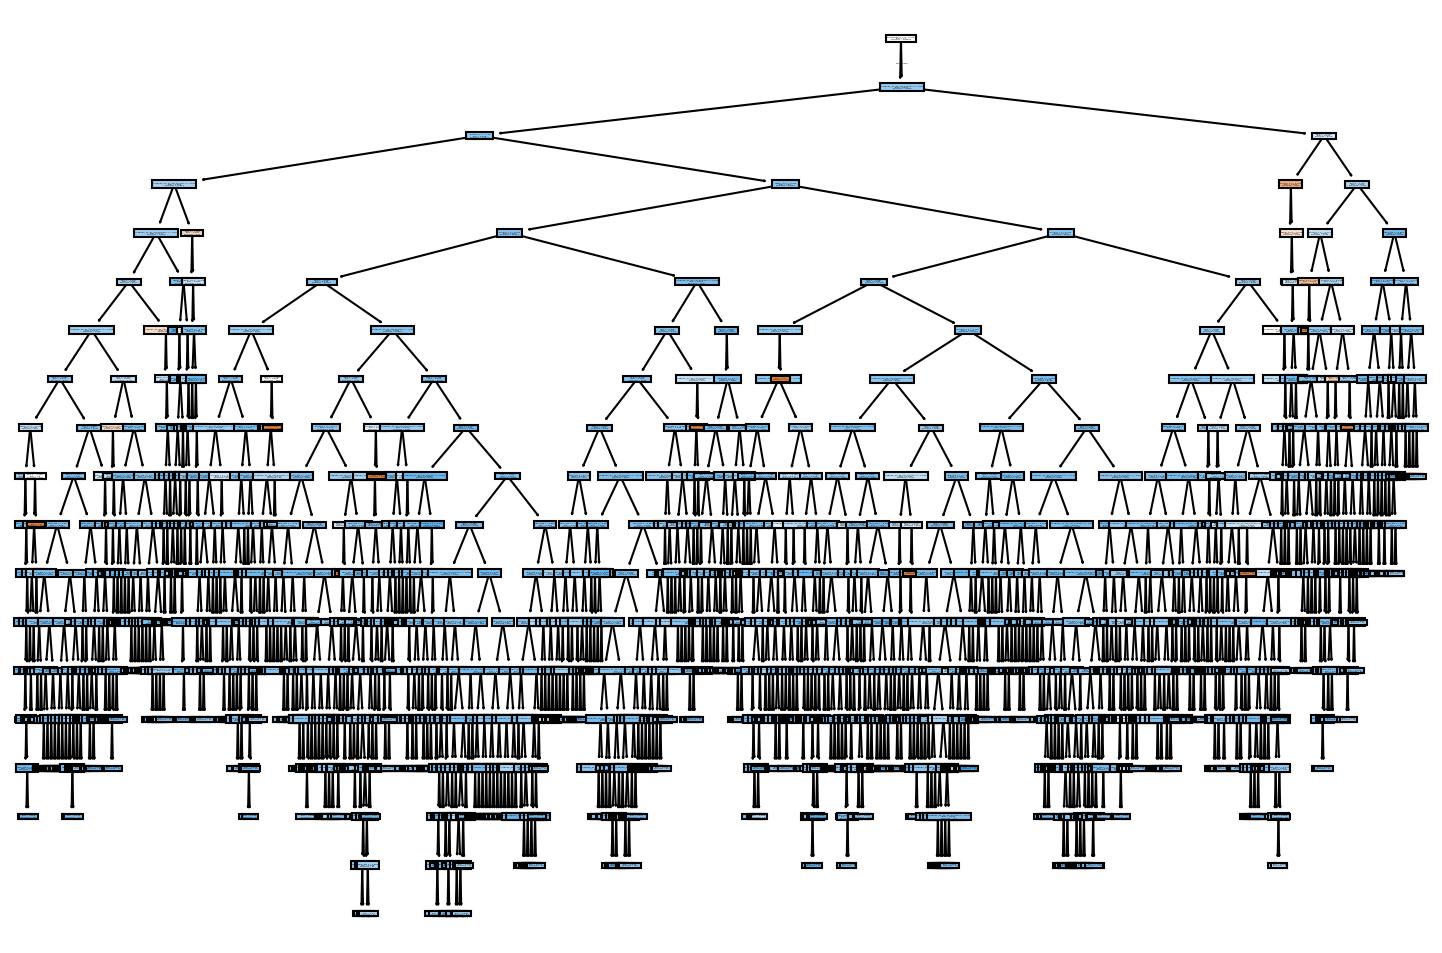

In [335]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model_dt,filled=True,feature_names=X4.columns);

#### Reporting Model Results

To begin experimenting with hyperparameters, let's create a function that reports back classification results and plots out the tree.

In [337]:
def report_model(model_dt):
    model_preds_dt2 = model_dt.predict(scaled_X4_test)
    print(classification_report(y4_test,model_preds_dt2))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model_dt,filled=True,feature_names=X4.columns);

#### Understanding Hyperparameters

##### Max Depth

In [339]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(scaled_X4_train,y4_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

           0       1.00      0.54      0.70     23150
           1       0.69      1.00      0.81     23309

    accuracy                           0.77     46459
   macro avg       0.84      0.77      0.76     46459
weighted avg       0.84      0.77      0.76     46459





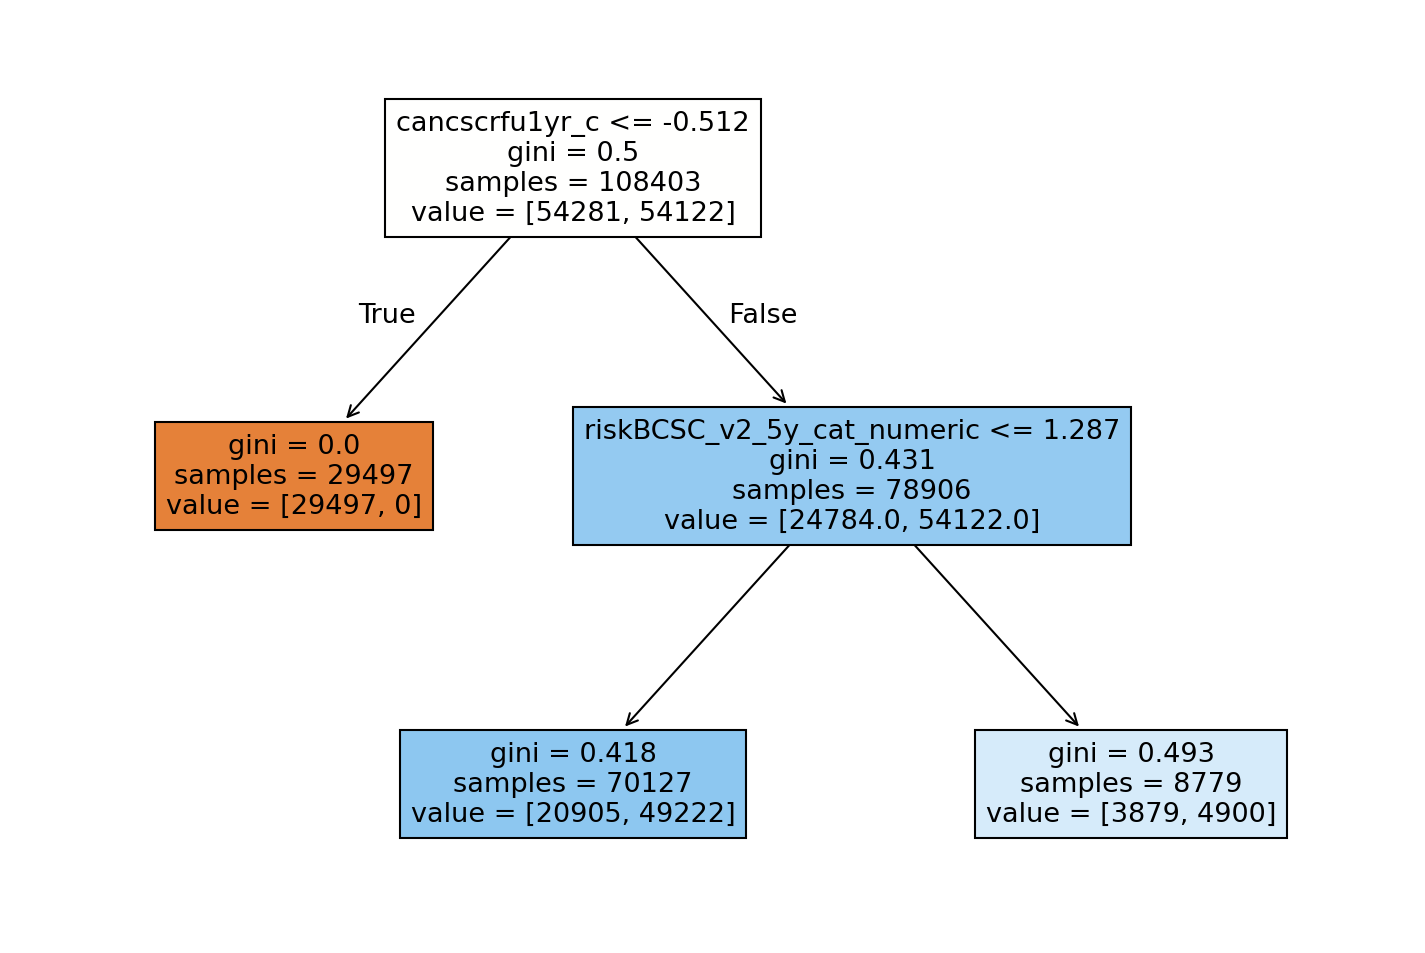

In [340]:
report_model(pruned_tree)

#### Max Leaf Nodes

In [342]:
pruned_tree2 = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree2.fit(scaled_X4_train,y4_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

           0       1.00      0.54      0.70     23150
           1       0.69      1.00      0.81     23309

    accuracy                           0.77     46459
   macro avg       0.84      0.77      0.76     46459
weighted avg       0.84      0.77      0.76     46459





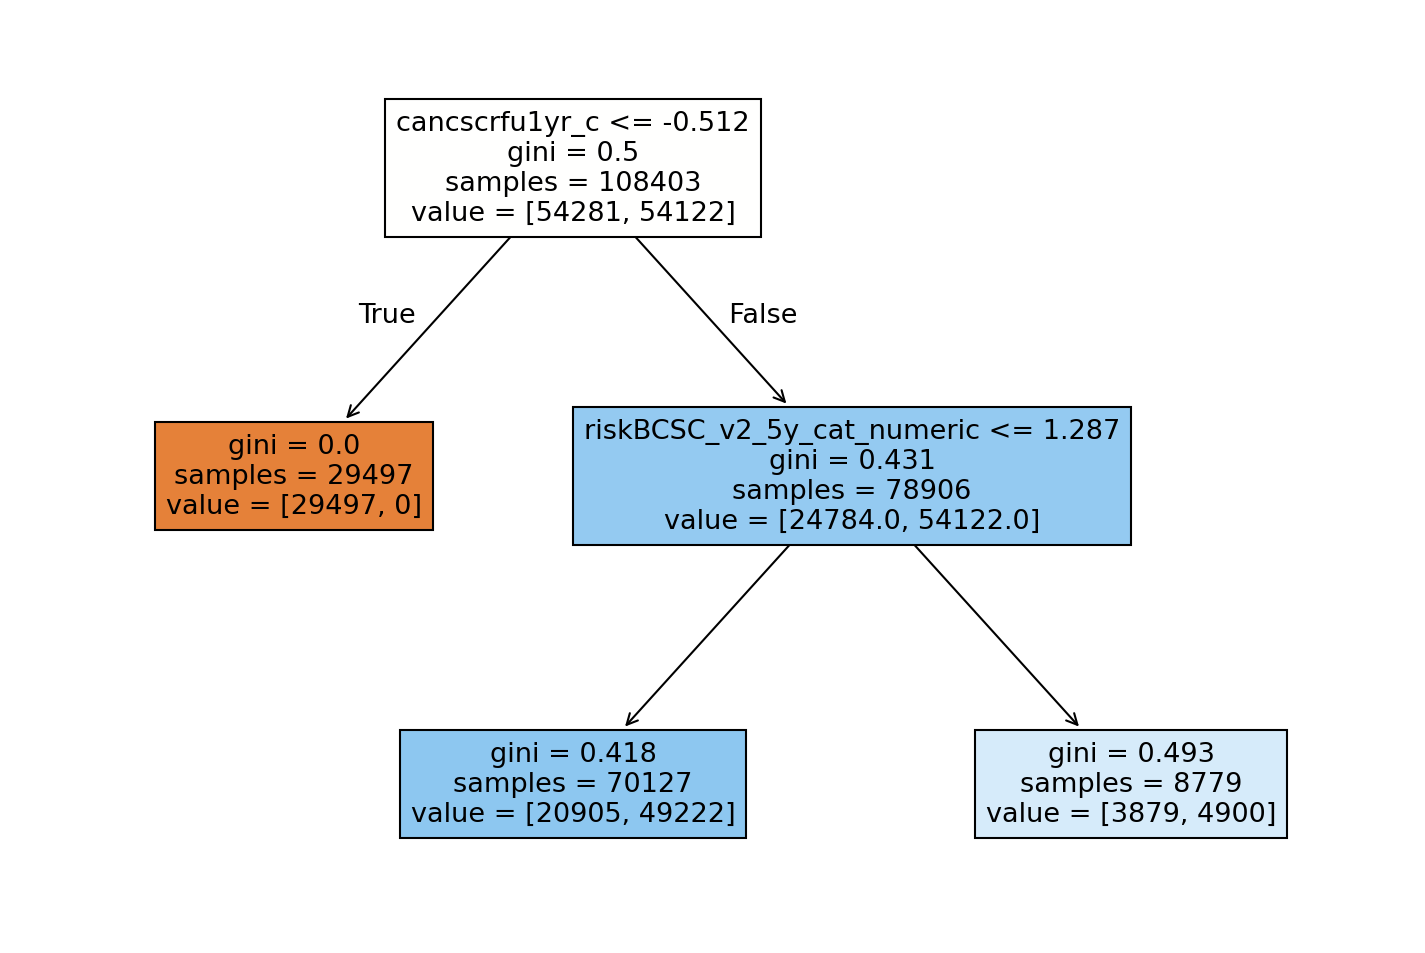

In [343]:
report_model(pruned_tree2)

#### Criterion

In [345]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(scaled_X4_train,y4_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

           0       1.00      0.66      0.79     23150
           1       0.75      1.00      0.85     23309

    accuracy                           0.83     46459
   macro avg       0.87      0.83      0.82     46459
weighted avg       0.87      0.83      0.82     46459





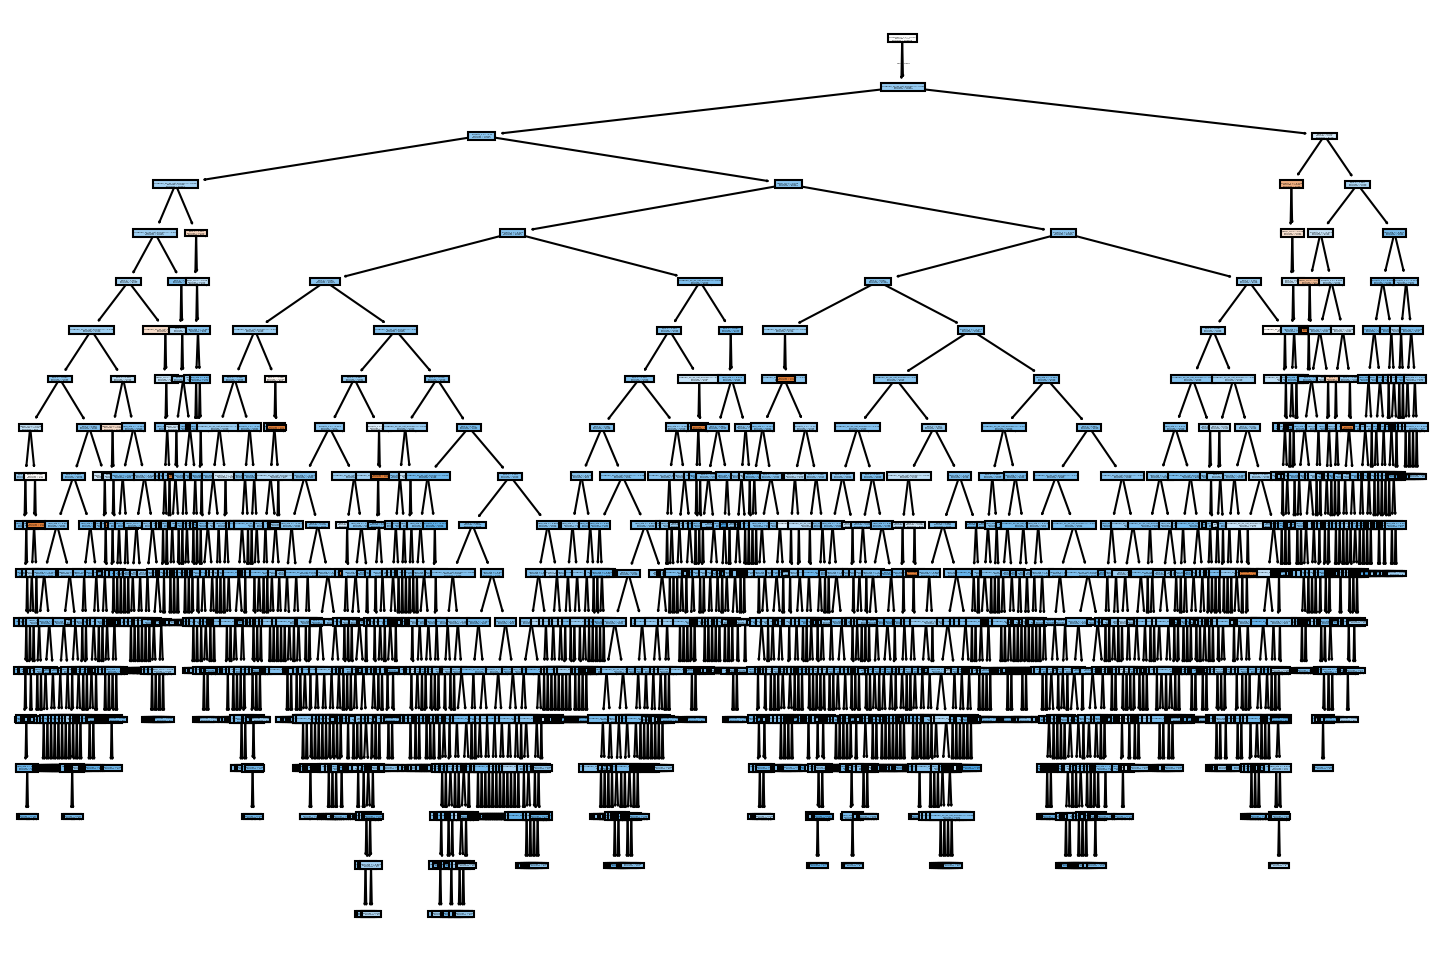

In [346]:
report_model(entropy_tree)

###Feature Importance Plot

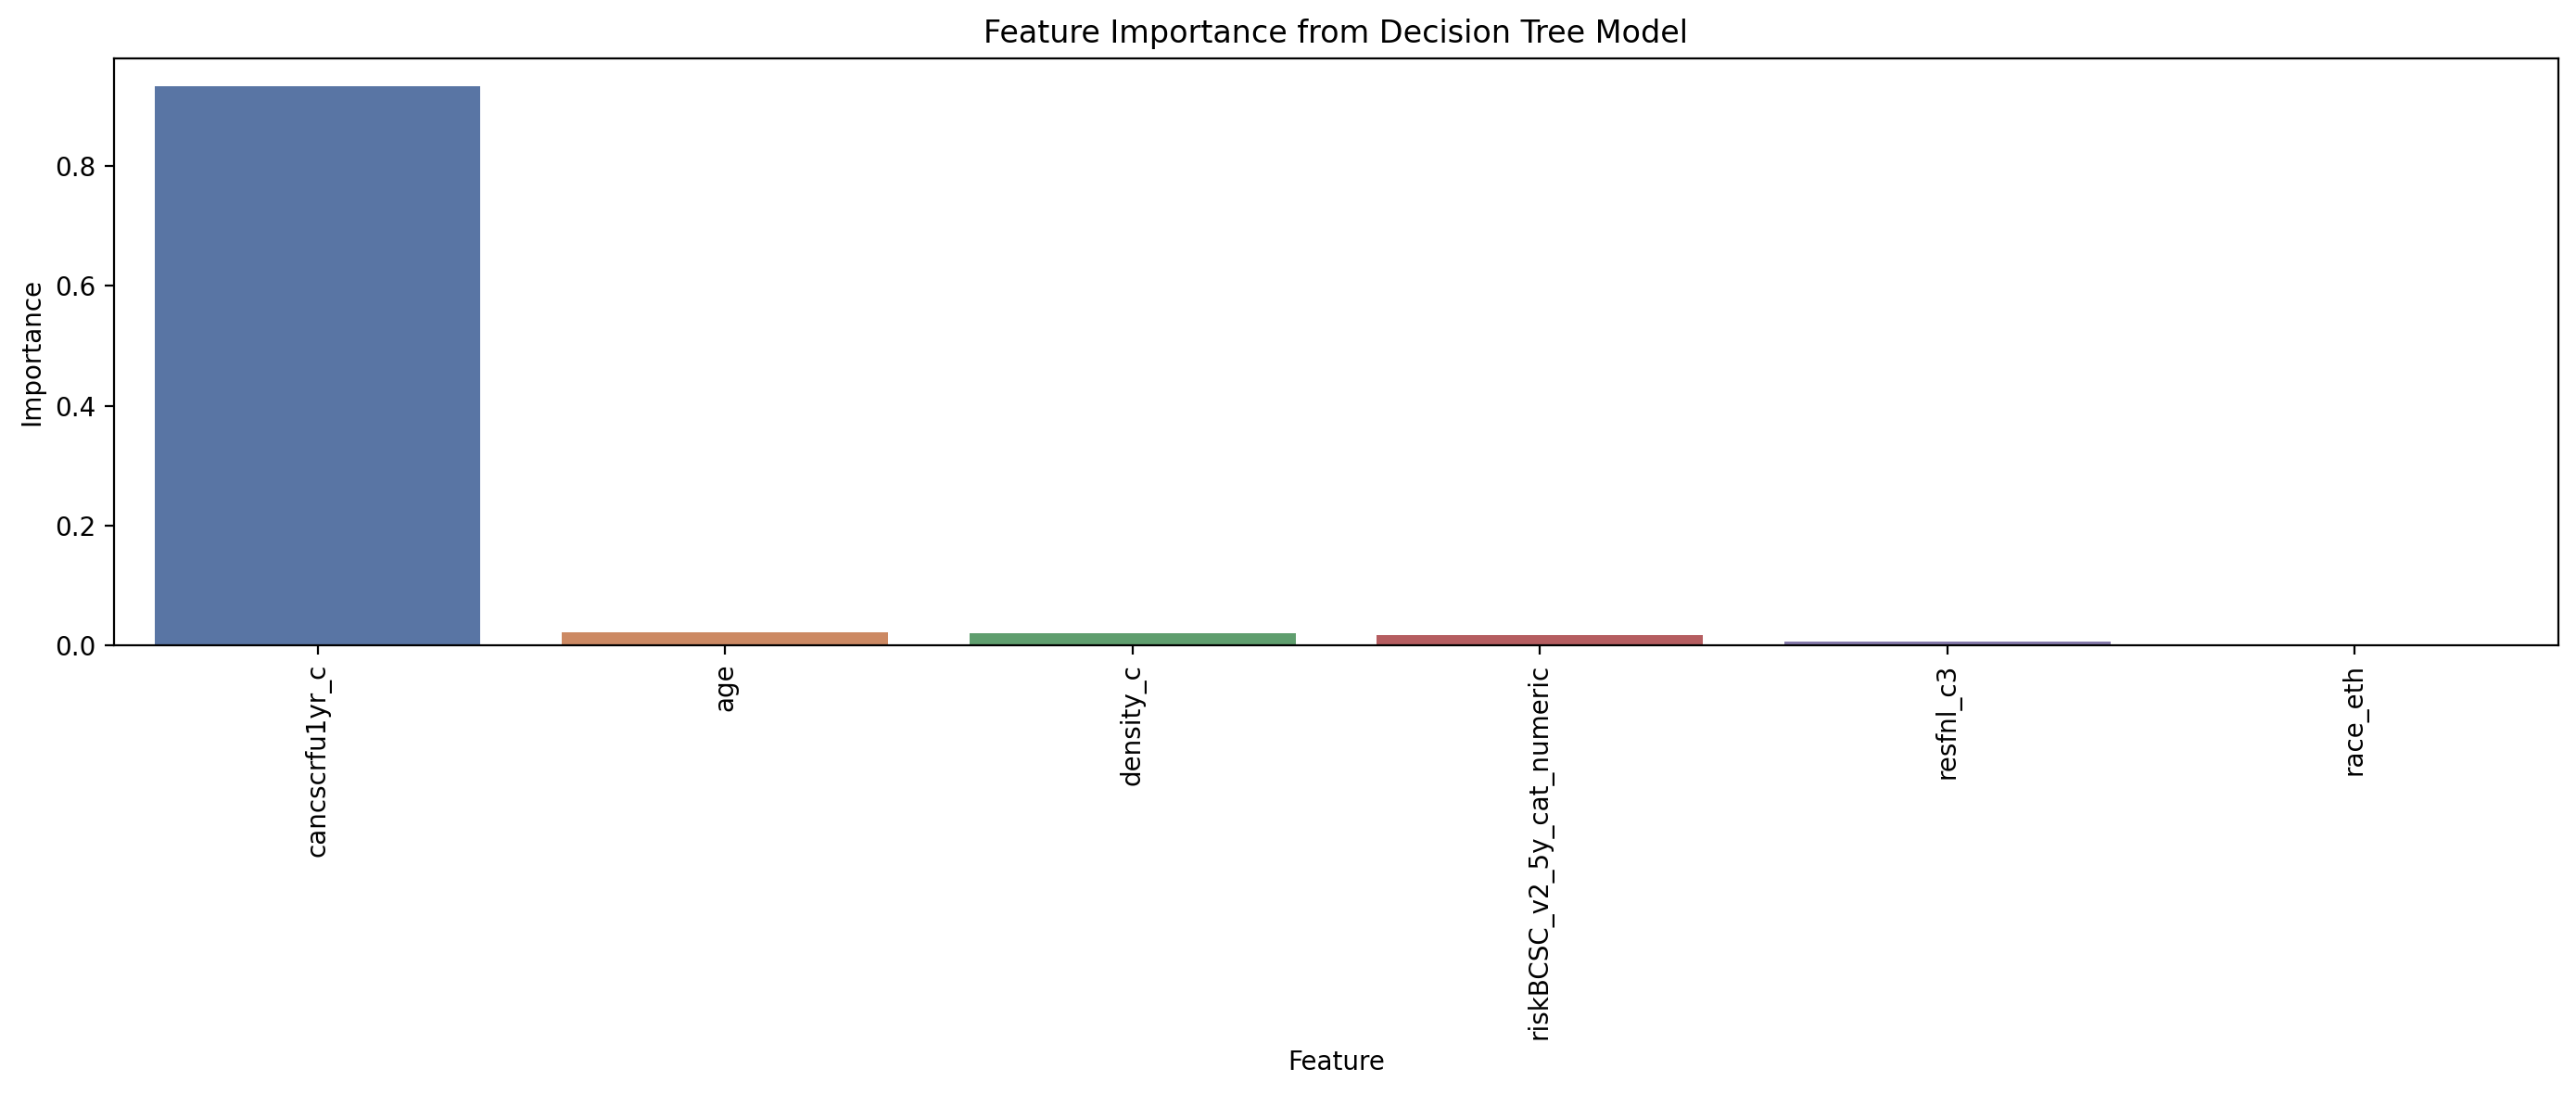

In [348]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances from the Decision Tree model
feature_importances_dt = best_model_dt2.feature_importances_

# Create a DataFrame with feature importances
feats_dt = pd.DataFrame(index=X4.columns, data=feature_importances_dt, columns=['Importance'])

# Sort the dataframe by the values in the "Importance" column in descending order
feats_dt = feats_dt.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(14, 6), dpi=200)
sns.barplot(data=feats_dt.reset_index(), x='index', y='Importance', palette='deep')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from Decision Tree Model')
plt.tight_layout()
plt.show()

## Random Forest

### Train|Test Split and Scaling Data

In [351]:
# Split the data into features and target variable
X5 = final_df.drop('stage_advanced', axis=1)
y5 = final_df['stage_advanced']

In [352]:
from sklearn.model_selection import train_test_split

In [353]:
# Splitting the DataFrame, X3 and the Series, y3 to a train set and a test set in a 70/30 ratio.
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, train_size=0.7, random_state=50)
print("Training data size:", X5_train.shape[0])

Training data size: 108403


In [354]:
#  Standardize the data
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler_rf = StandardScaler()

In [355]:
scaled_X5_train = scaler_rf.fit_transform(X5_train)
scaled_X5_test = scaler_rf.transform(X5_test)

### Modeling

In [357]:
from sklearn.ensemble import RandomForestClassifier

In [358]:
# Use 10 random trees and consider all features for each split
model_rf = RandomForestClassifier(n_estimators=10, max_features=None, random_state=50)

In [359]:
model_rf.fit(scaled_X5_train, y5_train)

RandomForestClassifier(max_features=None, n_estimators=10, random_state=50)

In [360]:
y5_pred = model_rf.predict(scaled_X5_test)

### Model Evaluation

####First Confusion Matrix - Random Forest

In [363]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

Confusion Matrix for Random Forest:

[[15247  7903]
 [   31 23278]]


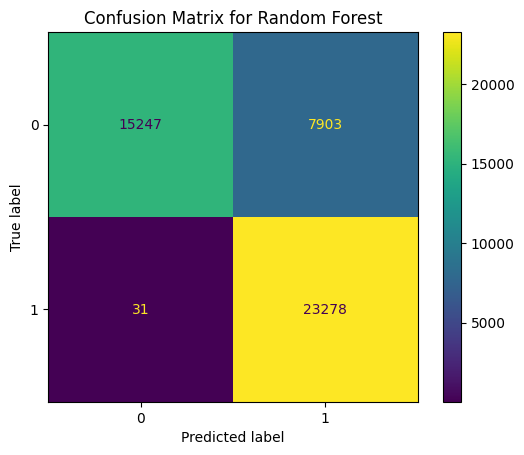

In [364]:
# Confusion matrix
cm_rf1=confusion_matrix(y5_test,y5_pred)
print('Confusion Matrix for Random Forest:\n')
print(cm_rf1)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf1)
disp.plot()
plt.title("Confusion Matrix for Random Forest")
plt.show()

####First Classification Report - Random Forest

In [366]:
# Classification Report
# print(classification_report(y5_test,y5_pred))
target_names = ['No CA', 'CA']
print("Classification Report for Random Forest:\n\n", classification_report(y5_test,y5_pred, target_names=target_names))

Classification Report for Random Forest:

               precision    recall  f1-score   support

       No CA       1.00      0.66      0.79     23150
          CA       0.75      1.00      0.85     23309

    accuracy                           0.83     46459
   macro avg       0.87      0.83      0.82     46459
weighted avg       0.87      0.83      0.82     46459



In [367]:
# Evaluate the model to find the accuracy of our model. In this case, the model can successfully predict the response label 53.1% of the time.
accuracy_rf1 = accuracy_score(y5_test, y5_pred, normalize=True, sample_weight=None)
print("Accuracy:", accuracy_rf1)

Accuracy: 0.8292257689575755


#### Evaluating Curves and AUC

######First Precision-Recall Curve - Random Forest

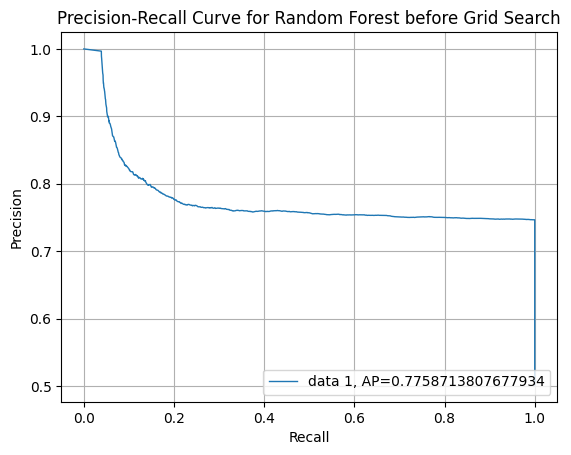

In [370]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt


# Predict probabilities on the test set
y5_pred_proba1 = model_rf.predict_proba(scaled_X5_test)[:, 1]
#y5_prob = gridRF.predict_proba(X5_test)[:, 1]

# Calculate precision and recall
precision_rf1, recall_rf1, _ = precision_recall_curve(y5_test, y5_pred_proba1)

# Calculate average precision
ap_rf1 = average_precision_score(y5_test, y5_pred_proba1)

# Plot precision-recall curve
plt.plot(recall_rf1, precision_rf1, lw=1, label="data 1, AP=" + str(ap_rf1))
plt.legend(loc=4)
plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.title('Precision-Recall Curve (AP={:.2f})'.format(ap))
plt.title('Precision-Recall Curve for Random Forest before Grid Search')
plt.grid(True)
plt.show()

#####First ROC Curve - Random Forest

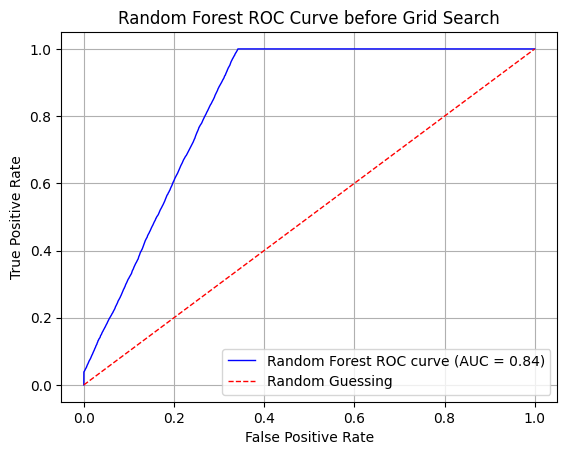

In [372]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y5_prob1 = model_rf.predict_proba(scaled_X5_test)[:, 1]
#y5_prob2 = gridRF.predict_proba(X5_test)[:, 1]

# Calculate ROC curve
fpr_rf, tpr_rf, thresholds = roc_curve(y5_test, y5_prob1)

# Calculate AUC (Area Under the Curve)
roc_auc_rf1 = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.plot(fpr_rf, tpr_rf, color='blue', lw=1, label='Random Forest ROC curve (AUC = %0.2f)' % roc_auc_rf1)
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve before Grid Search')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Feature Importance**

In [374]:
model_rf.feature_importances_

array([0.11483589, 0.01623059, 0.04840269, 0.04020097, 0.72222035,
       0.05810952])

In [375]:
pd.DataFrame(index=X5.columns,data=model_rf.feature_importances_,columns=['Feature Importance'])

Feature Importance
age                                   0.114836
race_eth                              0.016231
density_c                             0.048403
resfnl_c3                             0.040201
cancscrfu1yr_c                        0.722220
riskBCSC_v2_5y_cat_numeric            0.058110

**Choosing correct number of trees**

Let's explore if continually adding more trees improves performance...

In [378]:
test_error = []

for n in range(1, 40):
    # Use n random trees
    model_rf2 = RandomForestClassifier(n_estimators=n, max_features=None, random_state=50)
    model_rf2.fit(scaled_X5_train, y5_train)
    test_pred_rf2 = model_rf2.predict(scaled_X5_test)
    test_error.append(1 - accuracy_score(test_pred_rf2, y5_test))

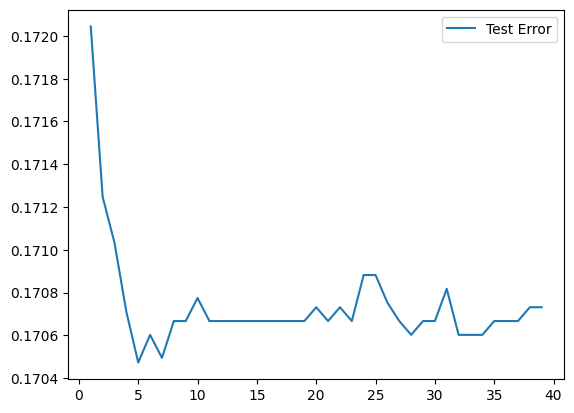

In [379]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

In [380]:
test_error2 = []

for n in range(1, 60):
    # Use n random trees
    model_rf3 = RandomForestClassifier(n_estimators=n, max_features=None, random_state=50)
    model_rf3.fit(scaled_X5_train, y5_train)
    test_pred_rf3 = model_rf3.predict(scaled_X5_test)
    test_error2.append(1 - accuracy_score(test_pred_rf3, y5_test))


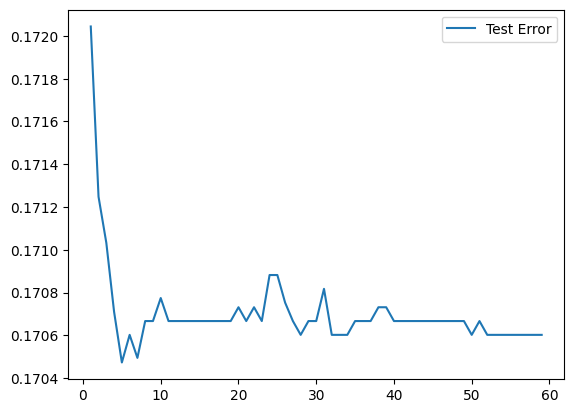

In [381]:
plt.plot(range(1,60),test_error2,label='Test Error')
plt.legend()

#### Grid Search in Attempt for Better Model

In [383]:
from sklearn.model_selection import GridSearchCV

In [384]:
#n_estimators=[64,100,128,200]
n_estimators=[84,120,170,300]
#n_estimators=[54,75,100,150]

max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [385]:
param_grid_rf = {'n_estimators':n_estimators,
                'max_features':max_features,
                'bootstrap':bootstrap,
                'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!

In [386]:
# Perform GridSearchCV
rfc = RandomForestClassifier()
best_model_rf = GridSearchCV(rfc,param_grid_rf)

**Fit to Training Data with CV Search**

In [388]:
# Fit the grid search to the data
best_model_rf.fit(scaled_X5_train, y5_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [84, 120, 170, 300],
                         'oob_score': [True, False]})

In [389]:
# Capture the best parameters and best score based on the training dataset
best_params_rf = best_model_rf.best_params_
best_score_rf = best_model_rf.best_score_
print(f'best parameters: {best_params_rf}')
print(f'best score: {best_score_rf}')

best parameters: {'bootstrap': True, 'max_features': 4, 'n_estimators': 300, 'oob_score': False}
best score: 0.8314714126385765


**Performance**

In [391]:
# Make predictions on the test data
y5_pred2 = best_model_rf.predict(scaled_X5_test)

In [392]:
# Calculate the accuracy of the model
accuracy_rf2 = accuracy_score(y5_test, y5_pred)

print("Accuracy:", accuracy_rf2)

Accuracy: 0.8292257689575755


In [393]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a new RandomForestClassifier with the best parameters
best_params_rf2 = {'bootstrap': True, 'max_features': 3, 'n_estimators': 100, 'oob_score': False}
best_rfc = RandomForestClassifier(**best_params_rf2)

# Fit the model on the training data
best_rfc.fit(scaled_X5_train, y5_train)

# Make predictions on the test data
y_predRF2 = best_rfc.predict(scaled_X5_test)

# Calculate the accuracy of the model
accuracy_rf2 = accuracy_score(y5_test, y5_pred)

print("Accuracy:", accuracy_rf2)

Accuracy: 0.8292257689575755


#####Second Confusion Matrix - Random Forest

Second Confusion Matrix for Random Forest:

[[15243  7907]
 [   17 23292]]


Text(0.5, 1.0, 'Confusion Matrix for Random Forest after Grid Search')

<Figure size 200x100 with 0 Axes>

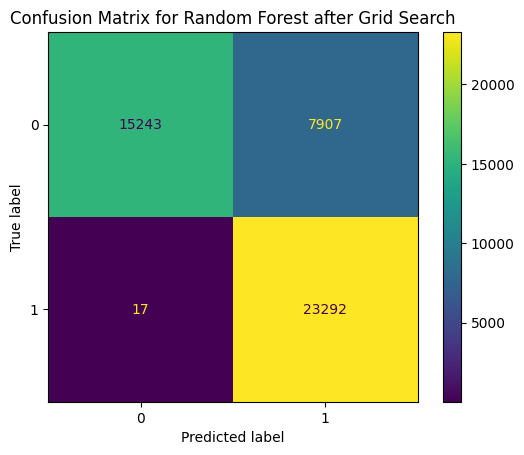

In [395]:
# Confusion matrix
cm_rf2 = confusion_matrix(y5_test, y5_pred2)
print('Second Confusion Matrix for Random Forest:\n')
print(cm_rf2)

# Display Confusion Matrix
plt.figure(figsize=(2, 1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf2)
disp.plot()
plt.title('Confusion Matrix for Random Forest after Grid Search')

#####Second Classification Report - Random Forest

In [397]:
# Print classification report

target_names = ['No CA', 'CA']
print("Classification Report for Random Forest after Grid Search:\n\n", classification_report(y5_test,y5_pred2, target_names=target_names))

Classification Report for Random Forest after Grid Search:

               precision    recall  f1-score   support

       No CA       1.00      0.66      0.79     23150
          CA       0.75      1.00      0.85     23309

    accuracy                           0.83     46459
   macro avg       0.87      0.83      0.82     46459
weighted avg       0.87      0.83      0.82     46459



##### Evaluating Curves and AUC

######Second Precision-Recall Curve - Random Forest

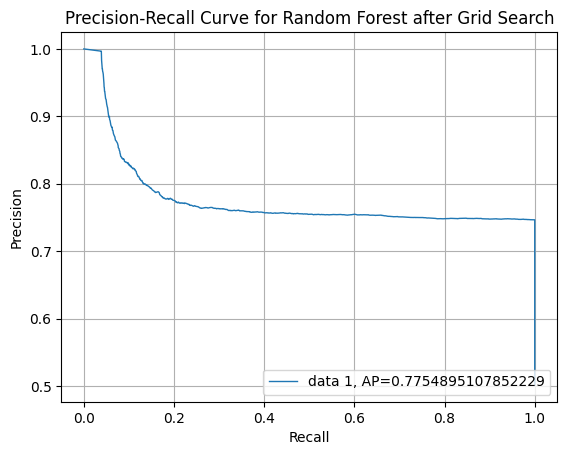

In [400]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Predict probabilities on the test set
y5_pred_proba2 = best_rfc.predict_proba(scaled_X5_test)[:, 1] #best_model_rf

# Calculate precision and recall
precision_rf2, recall_rf2, _ = precision_recall_curve(y5_test, y5_pred_proba2)

# Calculate average precision
ap_rf2 = average_precision_score(y5_test, y5_pred_proba2)

# Plot precision-recall curve
plt.plot(recall_rf2, precision_rf2, lw=1, label="data 1, AP=" + str(ap_rf2))
plt.legend(loc=4)
plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.title('Precision-Recall Curve (AP={:.2f})'.format(ap))
plt.title('Precision-Recall Curve for Random Forest after Grid Search')
plt.grid(True)
plt.show()

######Second ROC Curve - Random Forest

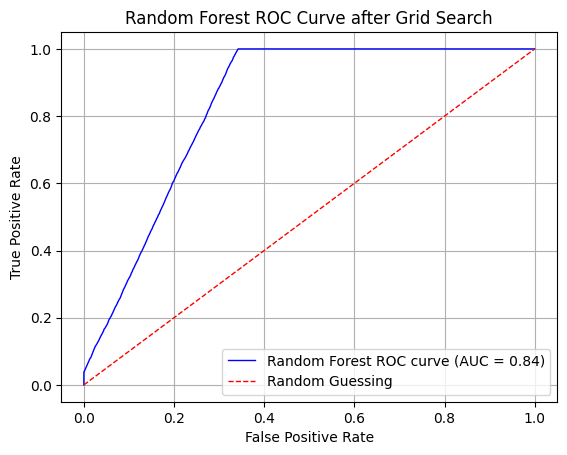

In [402]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y5_prob2 = best_rfc.predict_proba(scaled_X5_test)[:, 1] # best_model_rf

# Calculate ROC curve
fpr_rf_gs, tpr_rf_gs, thresholds = roc_curve(y5_test, y5_prob2)

# Calculate AUC (Area Under the Curve)
roc_auc_rf2 = auc(fpr_rf_gs, tpr_rf_gs)

# Plot ROC curve
plt.plot(fpr_rf_gs, tpr_rf_gs, color='blue', lw=1, label='Random Forest ROC curve (AUC = %0.2f)' % roc_auc_rf2)
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve after Grid Search')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

####Feature Importance Plot

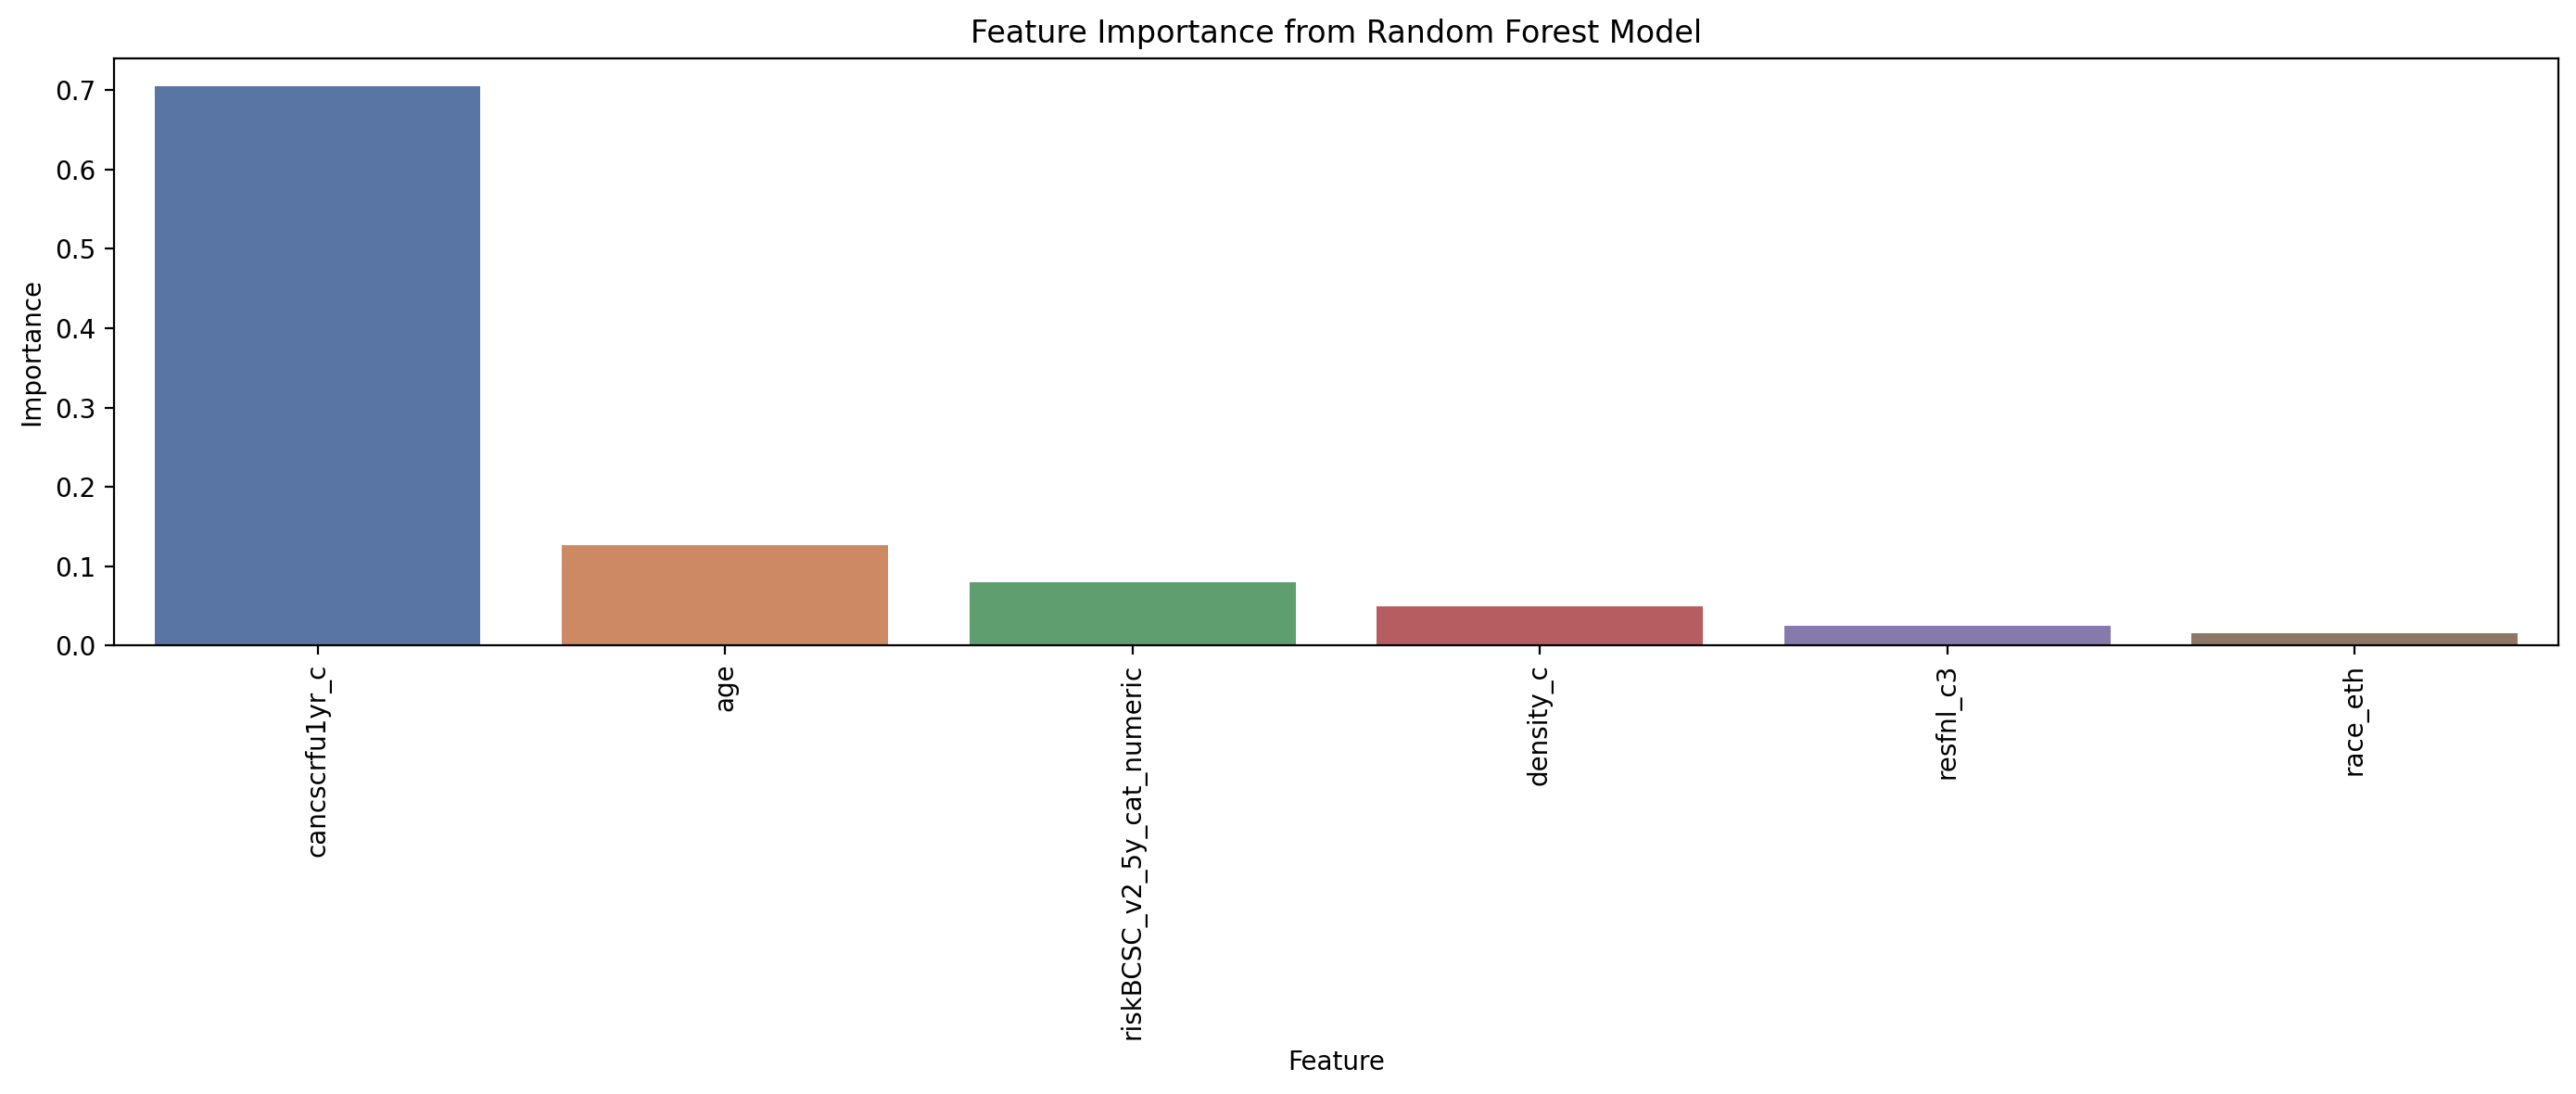

In [404]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances from the Random Forest model
feature_importances_rf = best_rfc.feature_importances_

# Create a DataFrame with feature importances
feats_rf = pd.DataFrame(index=X5.columns, data=feature_importances_rf, columns=['Importance'])

# Sort the dataframe by the values in the "Importance" column in descending order
feats_rf = feats_rf.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(14, 6), dpi=200)
sns.barplot(data=feats_rf.reset_index(), x='index', y='Importance', palette='deep')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest Model')
plt.tight_layout()
plt.show()

In [405]:
# Create a DataFrame with feature importances
feats_rf = pd.DataFrame(index=X5.columns, data=feature_importances_rf, columns=['Importance'])
feats_rf

Importance
age                           0.125983
race_eth                      0.015674
density_c                     0.049392
resfnl_c3                     0.024258
cancscrfu1yr_c                0.705155
riskBCSC_v2_5y_cat_numeric    0.079537

### Visualize the Tree

##### Understanding Number of Estimators (Trees)

Let's plot out error vs. Number of Estimators

In [408]:
from sklearn.metrics import accuracy_score

In [409]:
errors = []
misclassifications = []

for n in range(1,64):
    rfc2 = RandomForestClassifier( n_estimators=n,bootstrap=True,max_features= 2)
    rfc2.fit(scaled_X5_train,y5_train)
    pred_RF2 = rfc2.predict(scaled_X5_test)
    err = 1 - accuracy_score(pred_RF2,y5_test)
    n_missed = np.sum(pred_RF2 != y5_test) # watch the video to understand this line!!
    errors.append(err)
    misclassifications.append(n_missed)

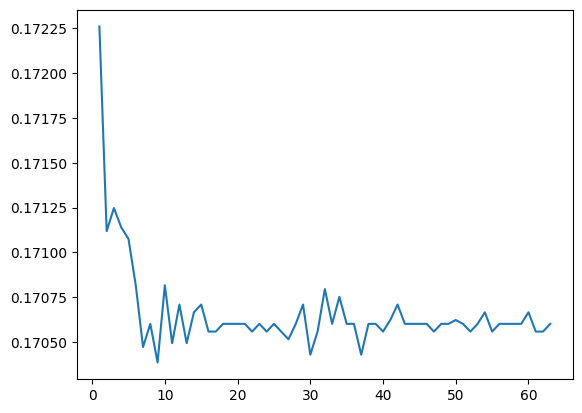

In [410]:
plt.plot(range(1,64),errors)

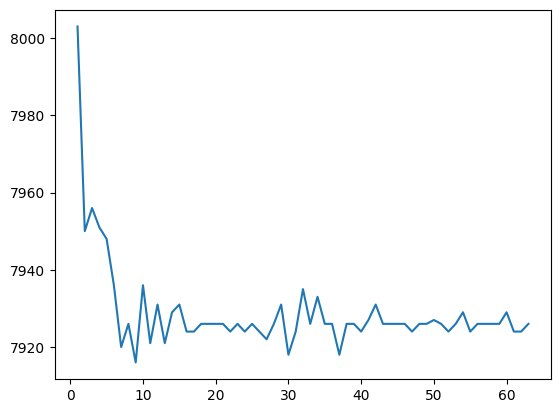

In [411]:
plt.plot(range(1,64),misclassifications)

##Gradient Boosting

### Train|Test Split and Scaling Data

In [414]:
# Split the data into features and target variable
X6 = final_df.drop('stage_advanced', axis=1)
y6 = final_df['stage_advanced']

In [415]:
from sklearn.model_selection import train_test_split

In [416]:
# Splitting the DataFrame, X3 and the Series, y3 to a train set and a test set in a 70/30 ratio.
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, train_size=0.7, random_state=50)
print("Training data size:", X6_train.shape[0])

Training data size: 108403


In [417]:
#  Standardize the data
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler_gb = StandardScaler()

In [418]:
scaled_X6_train = scaler_gb.fit_transform(X6_train)
scaled_X6_test = scaler_gb.transform(X6_test)

### Modeling

In [420]:
from sklearn.ensemble import GradientBoostingClassifier

In [421]:
# Initializing the GradientBoostingClassifier
model_gb = GradientBoostingClassifier(random_state=50)

In [422]:
model_gb.fit(scaled_X6_train, y6_train)

GradientBoostingClassifier(random_state=50)

In [423]:
pred_model_gb = model_gb.predict(scaled_X6_test)

### Model Evaluation

####First Confusion Matrix - Gradient Boosting

In [426]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

Confusion Matrix for Gradient Boosting:



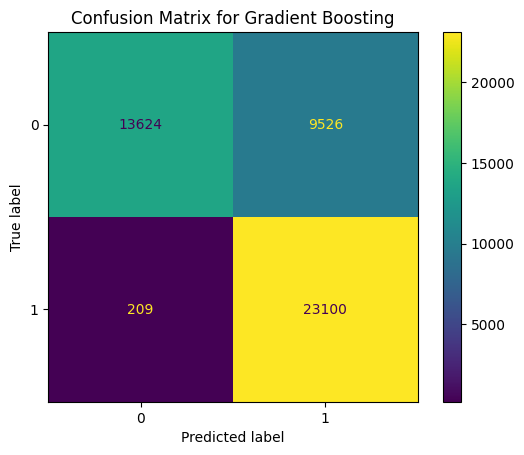

In [427]:
# Confusion matrix
cm_gb1=confusion_matrix(y6_test,pred_model_gb)
print('Confusion Matrix for Gradient Boosting:\n')

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gb1)
disp.plot()
plt.title("Confusion Matrix for Gradient Boosting")
plt.show()

####First Classification Report - Gradient Boosting

In [429]:
# Generate classification report
from sklearn.metrics import classification_report

target_names_gb1 = ['No CA', 'CA']
class_report_gb1 = classification_report(y6_test,pred_model_gb, target_names=target_names_gb1)
print("Classification Report for Gradient Boosting:\n\n", class_report_gb1)

Classification Report for Gradient Boosting:

               precision    recall  f1-score   support

       No CA       0.98      0.59      0.74     23150
          CA       0.71      0.99      0.83     23309

    accuracy                           0.79     46459
   macro avg       0.85      0.79      0.78     46459
weighted avg       0.85      0.79      0.78     46459



In [430]:
# Evaluate the model to find the accuracy of our model. In this case, the model can successfully predict the response label 53.1% of the time.
accuracy_gb1 = accuracy_score(y6_test, pred_model_gb, normalize=True, sample_weight=None)
print("Accuracy:", accuracy_gb1)

Accuracy: 0.7904604059493316


#### Evaluating Curves and AUC

######First Precision-Recall Curve - Gradient Boosting

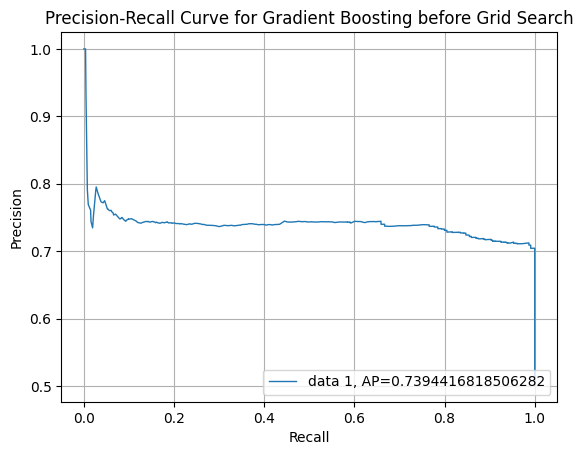

In [433]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Predict probabilities on the test set
y6_pred_proba1 = model_gb.predict_proba(scaled_X6_test)[:, 1]
#y5_prob = gridRF.predict_proba(X5_test)[:, 1]

# Calculate precision and recall
precision_gb1, recall_gb1, _ = precision_recall_curve(y6_test, y6_pred_proba1)

# Calculate average precision
ap_gb1 = average_precision_score(y6_test, y6_pred_proba1)

# Plot precision-recall curve
plt.plot(recall_gb1, precision_gb1, lw=1, label="data 1, AP=" + str(ap_gb1))
plt.legend(loc=4)
plt.xlabel('Recall')
plt.ylabel('Precision')
#plt.title('Precision-Recall Curve (AP={:.2f})'.format(ap))
plt.title('Precision-Recall Curve for Gradient Boosting before Grid Search')
plt.grid(True)
plt.show()

#####First ROC Curve - Gradient Boosting

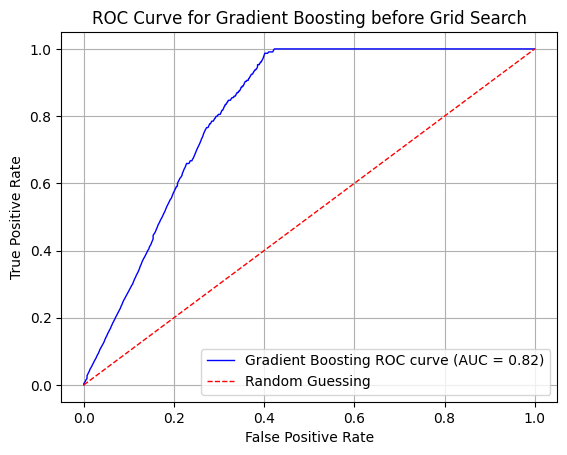

In [435]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities on the test set using the best model from GridSearchCV
y6_prob1 = model_gb.predict_proba(scaled_X6_test)[:, 1]

# Calculate false positive rate (fpr) and true positive rate (tpr)
fpr_gb, tpr_gb, _ = roc_curve(y6_test, y6_prob1)

# Calculate Area Under the Curve (AUC)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC curve
plt.plot(fpr_gb, tpr_gb, color='blue', lw=1, label='Gradient Boosting ROC curve (AUC = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting before Grid Search')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##### Feature Importance

In [437]:
model_gb.feature_importances_

array([3.31652167e-02, 1.11780370e-06, 1.59247458e-02, 4.68107363e-03,
       9.20988032e-01, 2.52398140e-02])

In [438]:
pd.DataFrame(index=X6.columns,data=model_gb.feature_importances_,columns=['Feature Importance'])

Feature Importance
age                                   0.033165
race_eth                              0.000001
density_c                             0.015925
resfnl_c3                             0.004681
cancscrfu1yr_c                        0.920988
riskBCSC_v2_5y_cat_numeric            0.025240

#### Grid Search in Attempt for Better Model

In [440]:
from sklearn.model_selection import GridSearchCV

In [441]:
#param_gridGB = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [442]:
model_gb2 = GradientBoostingClassifier()

In [443]:
best_model_gb = GridSearchCV(model_gb2,param_grid_gb)

##### Fit to Training Data with CV Search

In [445]:
best_model_gb.fit(scaled_X6_train,y6_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [446]:
best_model_gb.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}

#####Second Confusion Matrix - Gradient Boosting


In [448]:
from sklearn.metrics import classification_report,accuracy_score

In [449]:
pred_model_gb2 = best_model_gb.predict(scaled_X6_test)

**Confusion Matrix**

In [451]:
# Confusion matrix
cm_gb2=confusion_matrix(y6_test,pred_model_gb2)
print('Second Confusion Matrix for Gradient Boosting:\n')
print(cm_gb2)

Second Confusion Matrix for Gradient Boosting:

[[15238  7912]
 [    0 23309]]


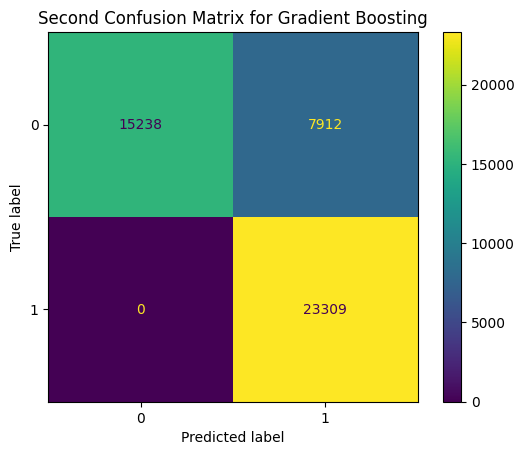

In [452]:
# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gb2)
disp.plot()
plt.title("Second Confusion Matrix for Gradient Boosting")
plt.show()

#####Second Classification Report - Gradient Boosting


In [454]:
# Generate classification report
from sklearn.metrics import classification_report

target_names_gb2 = ['No CA', 'CA']
class_report_gb2 = classification_report(y6_test,pred_model_gb2, target_names=target_names_gb2)
print("Classification Report for Gradient Boosting after Grid Search:\n\n", class_report_gb2)

# #print(classification_report(y6_test,pred_model_gb2))
# target_names = ['No CRC', 'CRC']
# print("Classification Report for Gradient Boosting:\n\n", classification_report(y6_test,pred_model_gb2, target_names=target_names))

Classification Report for Gradient Boosting after Grid Search:

               precision    recall  f1-score   support

       No CA       1.00      0.66      0.79     23150
          CA       0.75      1.00      0.85     23309

    accuracy                           0.83     46459
   macro avg       0.87      0.83      0.82     46459
weighted avg       0.87      0.83      0.82     46459



In [455]:
# Calculate the accuracy of the model
accuracy_gb2 = accuracy_score(y6_test, pred_model_gb2)

print("Accuracy:", accuracy_gb2)

Accuracy: 0.8296993047633398


######Second Precision-Recall Curve - Gradient Boosting

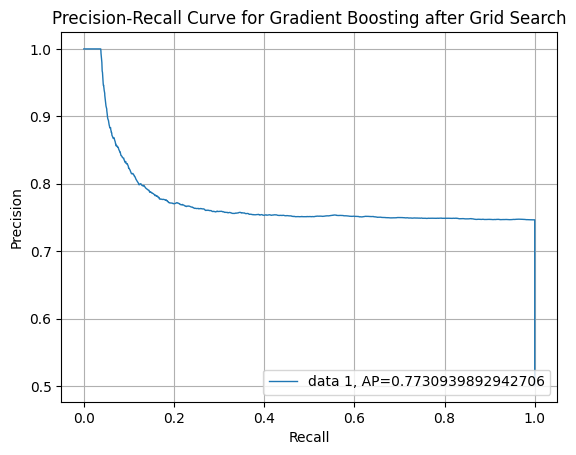

In [457]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Predict probabilities on the test set using the best model from GridSearchCV
y6_pred_proba_gb2 = best_model_gb.best_estimator_.predict_proba(scaled_X6_test)[:, 1]

# Calculate precision and recall
precision_gb2, recall_gb2, _ = precision_recall_curve(y6_test, y6_pred_proba_gb2)

# Calculate average precision
ap_gb2 = average_precision_score(y6_test, y6_pred_proba_gb2)

# Plot precision-recall curve
plt.plot(recall_gb2, precision_gb2, lw=1, label="data 1, AP=" + str(ap_gb2))
plt.legend(loc=4)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gradient Boosting after Grid Search')
plt.grid(True)
plt.show()

######Second ROC Curve - Gradient Boosting

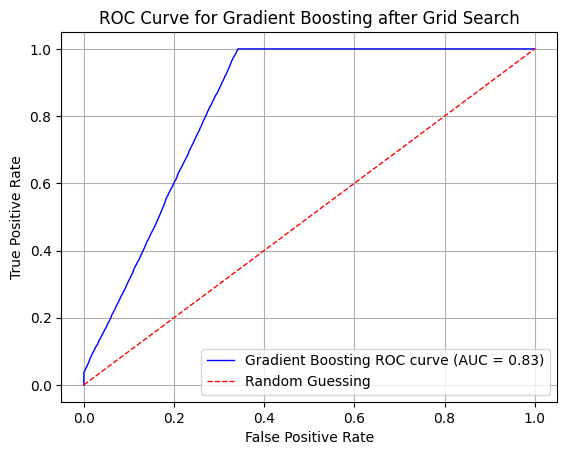

In [459]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities on the test set using the best model from GridSearchCV
y6_prob2 = best_model_gb.best_estimator_.predict_proba(scaled_X6_test)[:, 1]

# Calculate false positive rate (fpr) and true positive rate (tpr)
fpr_gb_gs, tpr_gb_gs, _ = roc_curve(y6_test, y6_prob2)

# Calculate Area Under the Curve (AUC)
roc_auc_gb2 = auc(fpr_gb_gs, tpr_gb_gs)

# Plot ROC curve
plt.plot(fpr_gb_gs, tpr_gb_gs, color='blue', lw=1, label='Gradient Boosting ROC curve (AUC = %0.2f)' % roc_auc_gb2)
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting after Grid Search')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

####Feature Importance Plot

In [461]:
best_model_gb.best_estimator_.feature_importances_

array([0.06825293, 0.00193283, 0.04419619, 0.04029674, 0.80007882,
       0.04524249])

In [462]:
feat_import = best_model_gb.best_estimator_.feature_importances_

In [463]:
imp_feats_gb = pd.DataFrame(index=X6.columns,data=feat_import,columns=['Importance'])

In [464]:
imp_feats_gb

Importance
age                           0.068253
race_eth                      0.001933
density_c                     0.044196
resfnl_c3                     0.040297
cancscrfu1yr_c                0.800079
riskBCSC_v2_5y_cat_numeric    0.045242

In [465]:
imp_feats_gb.sort_values("Importance",ascending=False)

Importance
cancscrfu1yr_c                0.800079
age                           0.068253
riskBCSC_v2_5y_cat_numeric    0.045242
density_c                     0.044196
resfnl_c3                     0.040297
race_eth                      0.001933

In [466]:
imp_feats_gb.describe().transpose()

count      mean       std       min       25%       50%     75%  \
Importance    6.0  0.166667  0.311045  0.001933  0.041272  0.044719  0.0625   

                 max  
Importance  0.800079

In [467]:
imp_feats_gb = imp_feats_gb[imp_feats_gb['Importance'] > 0.000527]
imp_feats_gb

Importance
age                           0.068253
race_eth                      0.001933
density_c                     0.044196
resfnl_c3                     0.040297
cancscrfu1yr_c                0.800079
riskBCSC_v2_5y_cat_numeric    0.045242

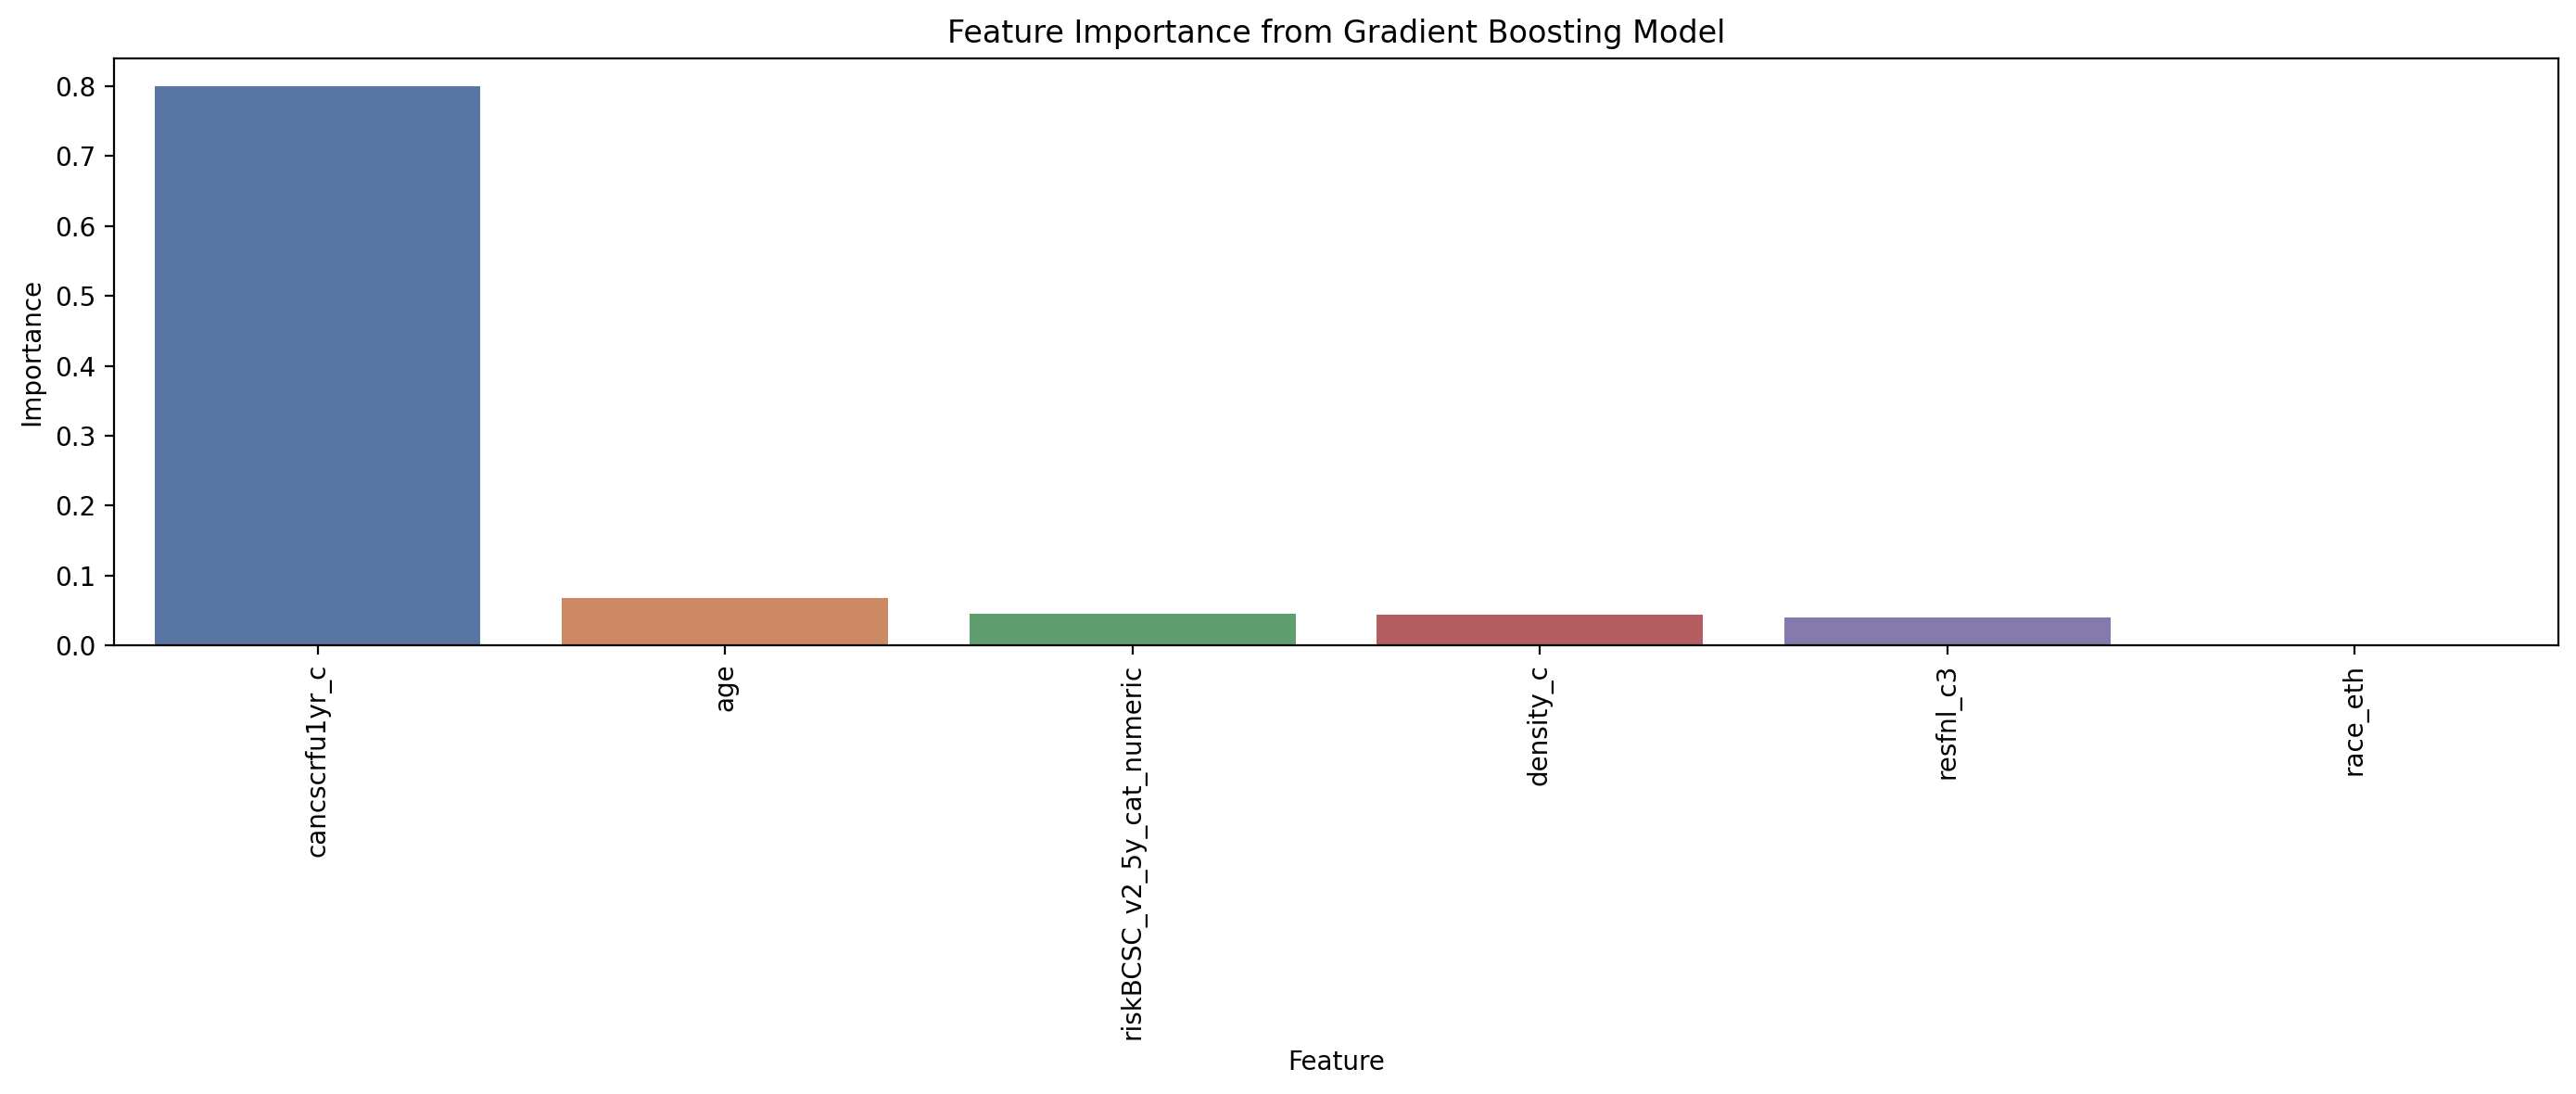

In [468]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Retrieve the best estimator (GradientBoostingClassifier) from the GridSearchCV object
best_estimator_gb = best_model_gb.best_estimator_

# Extract feature importances from the best estimator
feature_importances_gb = best_estimator_gb.feature_importances_

# Create a DataFrame with feature importances
feats_gb = pd.DataFrame(index=X6.columns, data=feature_importances_gb, columns=['Importance'])

# Sort the dataframe by the values in the "Importance" column in descending order
feats_gb = feats_gb.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(14, 6), dpi=200)
sns.barplot(data=feats_gb.reset_index(), x='index', y='Importance', palette='deep')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from Gradient Boosting Model')
plt.tight_layout()
plt.show()

##AdaBoost

### Train|Test Split and Scaling Data

In [471]:
# Split the data into features and target variable
X7 = final_df.drop('stage_advanced', axis=1)
y7 = final_df['stage_advanced']

In [472]:
from sklearn.model_selection import train_test_split

In [473]:
# Splitting the DataFrame, X7 and the Series, y7 to a train set and a test set in a 70/30 ratio.
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, train_size=0.7, random_state=50)
print("Training data size:", X7_train.shape[0])

Training data size: 108403


In [474]:
#  Standardize the data
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler_ab = StandardScaler()

In [475]:
scaled_X7_train = scaler_ab.fit_transform(X7_train)
scaled_X7_test = scaler_ab.transform(X7_test)

### Modeling

In [477]:
from sklearn.ensemble import AdaBoostClassifier

In [478]:
model_ab = AdaBoostClassifier(n_estimators=1)

In [479]:
model_ab.fit(scaled_X7_train,y7_train)

AdaBoostClassifier(n_estimators=1)

### Model Evaluation

In [481]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [482]:
pred_model_ab = model_ab.predict(scaled_X7_test)

In [483]:
pred_model_ab

array([1, 1, 0, ..., 1, 1, 0])

####First Confusion Matrix - AdaBoost

Confusion Matrix for AdaBoost:

[[12547 10603]
 [    0 23309]]


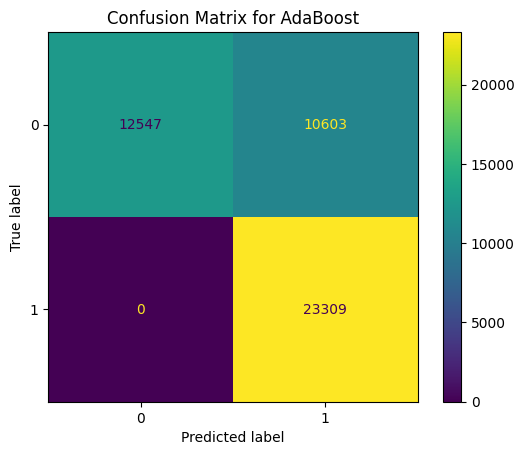

In [485]:
# Confusion matrix
cm_ab1=confusion_matrix(y7_test,pred_model_ab)
print('Confusion Matrix for AdaBoost:\n')
print(cm_ab1)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ab1)
disp.plot()
plt.title("Confusion Matrix for AdaBoost")
plt.show()

####First Classification Report - AdaBoost

In [487]:
# Generate classification report
from sklearn.metrics import classification_report

target_names_ab1 = ['No CA', 'CA']
class_report_ab1 = classification_report(y7_test, pred_model_ab, target_names=target_names_ab1)
print("Classification Report for AdaBoost:\n\n", class_report_ab1)

Classification Report for AdaBoost:

               precision    recall  f1-score   support

       No CA       1.00      0.54      0.70     23150
          CA       0.69      1.00      0.81     23309

    accuracy                           0.77     46459
   macro avg       0.84      0.77      0.76     46459
weighted avg       0.84      0.77      0.76     46459



In [488]:
# Evaluate the model to find the accuracy of our model. In this case, the model can successfully predict the response label 53.1% of the time.
accuracy_ab1 = accuracy_score(y7_test, pred_model_ab, normalize=True, sample_weight=None)
print("Accuracy:", accuracy_ab1)

Accuracy: 0.7717772659764524


####First Precision-Recall Curve - AdaBoost

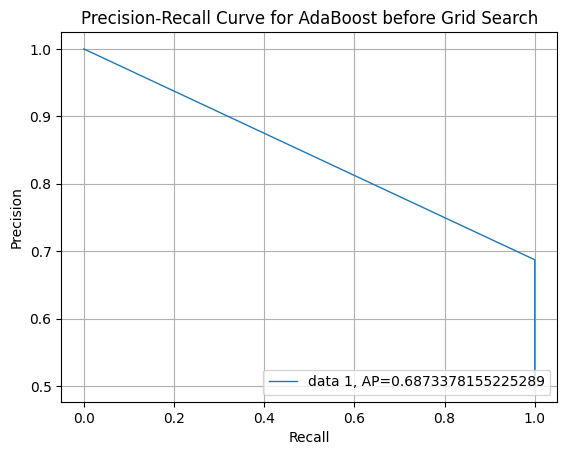

In [490]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, auc

# Predict probabilities on the test set using the best model from GridSearchCV
y7_pred_proba1 = model_ab.predict_proba(scaled_X7_test)[:, 1]

# Calculate precision and recall
precision_ab1, recall_ab1, _ = precision_recall_curve(y7_test, y7_pred_proba1)

# Calculate average precision
ab1 = average_precision_score(y7_test, y7_pred_proba1)

# Plot precision-recall curve
plt.plot(recall_ab1, precision_ab1, lw=1, label="data 1, AP=" + str(ab1))
plt.legend(loc=4)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for AdaBoost before Grid Search')
plt.grid(True)
plt.show()

####First ROC Curve - AdaBoost

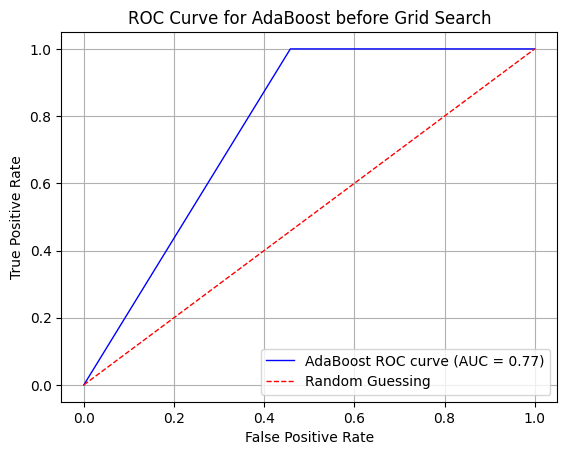

In [492]:
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities on the test set using the best model from GridSearchCV
y7_prob_ab1 = model_ab.predict_proba(scaled_X7_test)[:, 1]

# Calculate ROC curve
fpr_ab, tpr_ab, _ = roc_curve(y7_test, y7_prob_ab1)

# Calculate AUC
auc_ab1 = auc(fpr_ab, tpr_ab)

# Plot ROC curve
plt.plot(fpr_ab, tpr_ab, color='blue', lw=1, label='AdaBoost ROC curve (AUC = %0.2f)' % auc_ab1)
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost before Grid Search')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### Grid Search in Attempt for Better Model

In [494]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [495]:
# Initialize the AdaBoostClassifier
ada_boost = AdaBoostClassifier()

In [496]:
# Define the parameter grid
param_grid_ab = {
    'n_estimators': [50, 100, 200],  # Number of weak learners
    'learning_rate': [0.01, 0.1, 0.5]  # Learning rate of the algorithm
}

In [497]:
# Perform grid search
best_model_ab = GridSearchCV(estimator=ada_boost, param_grid=param_grid_ab, cv=5, scoring='accuracy')
best_model_ab.fit(scaled_X7_train, y7_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [498]:
# Get the Best Parameters and Best Score
best_params_ab = best_model_ab.best_params_
best_score_ab = best_model_ab.best_score_
print("Best Parameters:", best_params_ab)
print("Best Score:", best_score_ab)

Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Best Score: 0.7713716147643004


In [499]:
# Use the Best Model
best_model_ab2 = best_model_ab.best_estimator_

In [500]:
best_model_ab2.fit(scaled_X7_train,y7_train)

AdaBoostClassifier(learning_rate=0.01)

In [501]:
pred_best_model_ab2 = best_model_ab2.predict(scaled_X7_test)

#####Second Confusion Matrix - AdaBoost

Confusion Matrix for AdaBoost:

[[12547 10603]
 [    0 23309]]


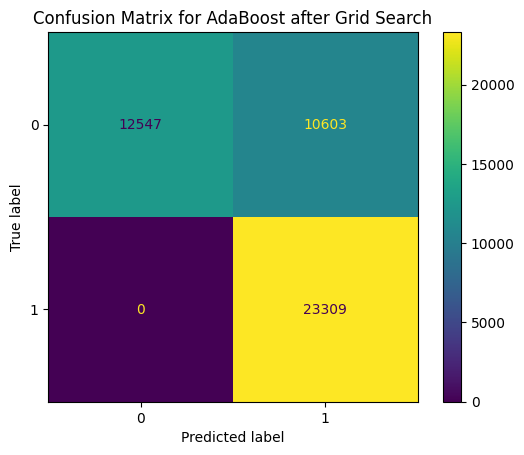

In [503]:
# Confusion matrix
cm_ab2=confusion_matrix(y7_test,pred_best_model_ab2)
print('Confusion Matrix for AdaBoost:\n')
print(cm_ab2)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ab2)
disp.plot()
plt.title("Confusion Matrix for AdaBoost after Grid Search")
plt.show()

#####Second Classification Report - AdaBoost

In [505]:
# Generate classification report
from sklearn.metrics import classification_report

target_names_ab2 = ['No CA', 'CA']
class_report_ab2 = classification_report(y7_test, pred_best_model_ab2, target_names=target_names_ab2)
print("Classification Report for AdaBoost after Grid Search:\n\n", class_report_ab2)

# # Classification Report
# # print(classification_report(y7_test,pred_best_model_ab2))
# target_names = ['No CA', 'CA']
# print("Classification Report for AdaBoost after Grid Search:\n\n", classification_report(y7_test,pred_best_model_ab2, target_names=target_names))

Classification Report for AdaBoost after Grid Search:

               precision    recall  f1-score   support

       No CA       1.00      0.54      0.70     23150
          CA       0.69      1.00      0.81     23309

    accuracy                           0.77     46459
   macro avg       0.84      0.77      0.76     46459
weighted avg       0.84      0.77      0.76     46459



In [506]:
# Evaluate the model to find the accuracy of our model.
accuracy_ab2 = accuracy_score(y7_test, pred_best_model_ab2, normalize=True, sample_weight=None)
print("Accuracy:", accuracy_ab2)

Accuracy: 0.7717772659764524


#####Second Precision-Recall Curve - AdaBoost

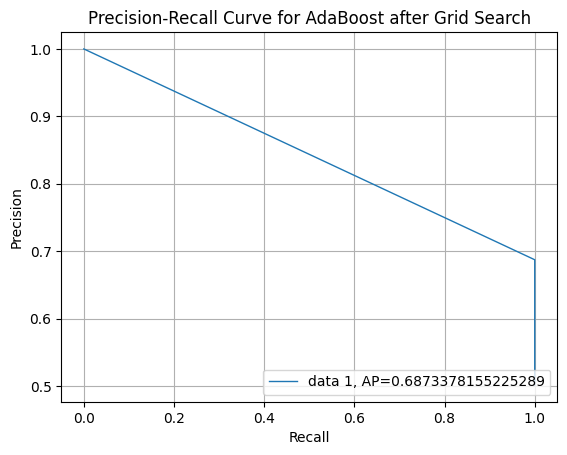

In [508]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Predict probabilities on the test set using the best model from GridSearchCV
y7_pred_proba2 = best_model_ab2.predict_proba(scaled_X7_test)[:, 1]

# Calculate precision and recall
precision_ab2, recall_ab2, _ = precision_recall_curve(y7_test, y7_pred_proba2)

# Calculate average precision
ab2 = average_precision_score(y7_test, y7_pred_proba2)

# Plot precision-recall curve
plt.plot(recall_ab2, precision_ab2, lw=1, label="data 1, AP=" + str(ab2))
plt.legend(loc=4)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for AdaBoost after Grid Search')
plt.grid(True)
plt.show()

#####Second ROC Curve - AdaBoost

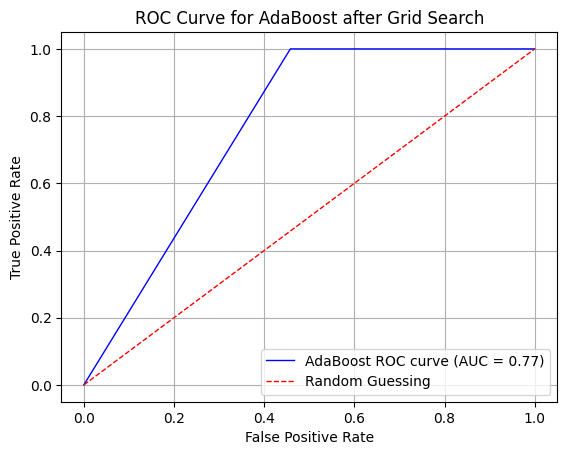

In [510]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities on the test set using the best model from GridSearchCV
y7_prob_ab2 = best_model_ab2.predict_proba(scaled_X7_test)[:, 1]

# Calculate ROC curve
fpr_ab_gs, tpr_ab_gs, _ = roc_curve(y7_test, y7_prob_ab2)

# Calculate AUC
auc_ab2 = auc(fpr_ab_gs, tpr_ab_gs)

# Plot ROC curve
plt.plot(fpr_ab_gs, tpr_ab_gs, color='blue', lw=1, label='AdaBoost ROC curve (AUC = %0.2f)' % auc_ab2)
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost after Grid Search')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [511]:
# This shows which features are contributing the most to the predictions made by the model
best_model_ab2.feature_importances_

array([0., 0., 0., 0., 1., 0.])

In [512]:
# This shows which feature has the highest importance in the model
best_model_ab2.feature_importances_.argmax()

4

In [513]:
# Identify the feature based on the column value.
# Here the feature that has the highest importance in this model is age.
X7.columns[1]

'race_eth'

<Axes: xlabel='age', ylabel='count'>

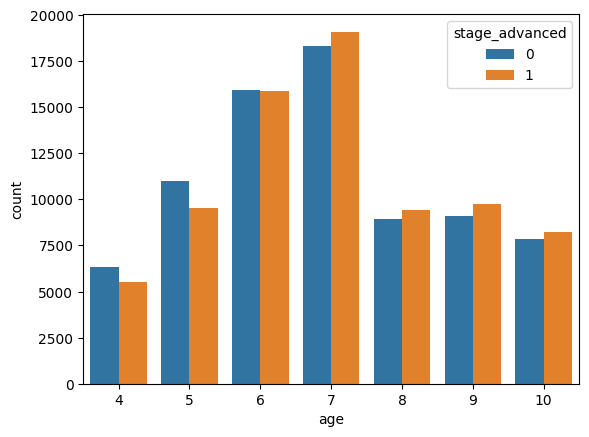

In [514]:
# A count plot showing the distribution of 'colo_cancer' within each age group
sns.countplot(data=final_df,x='age',hue='stage_advanced')

**Analyzing performance as more weak learners are added.**

In [516]:
X7.columns

Index(['age', 'race_eth', 'density_c', 'resfnl_c3', 'cancscrfu1yr_c',
       'riskBCSC_v2_5y_cat_numeric'],
      dtype='object')

In [517]:
# Get the count of columns in the DataFrame X7. There are 13 columns in the dataframe.
len(X7.columns)

6

In [518]:
# Train the AdaBoostClassifier with a different number of estimators
# Then calculate the error rates for each number of estimators

error_rates = []

for n in range(1,96):

    model_ab2 = AdaBoostClassifier(n_estimators=n)
    model_ab2.fit(scaled_X7_train,y7_train)
    pred_model_ab2 = model_ab2.predict(scaled_X7_test)
    err = 1 - accuracy_score(y7_test,pred_model_ab2)

    error_rates.append(err)

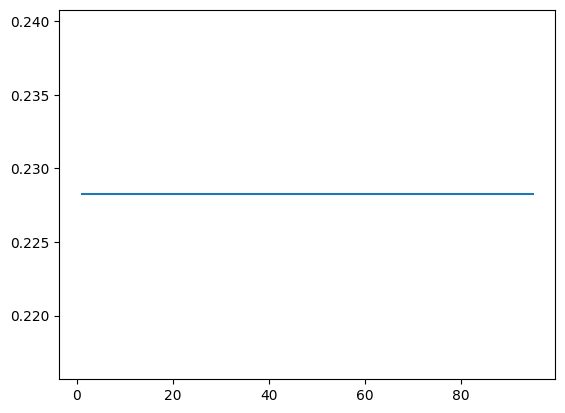

In [519]:
# Plot the error rates calculated for different numbers of estimators
plt.plot(range(1,96),error_rates)

In [520]:
# Call the model
#model_ab2
best_model_ab2

AdaBoostClassifier(learning_rate=0.01)

In [521]:
# Feature importances calculated by the model
# Examine the output to identify which features are the most important in the AdaBoostClassifier's decision-making process

best_model_ab2.feature_importances_

array([0., 0., 0., 0., 1., 0.])

In [522]:
# Creates a dataFrame called feats with feature importances calculated by the model
feats_ab = pd.DataFrame(index=X7.columns,data=best_model_ab2.feature_importances_,columns=['Importance'])

In [523]:
# Display the dataframe
feats_ab

Importance
age                                0.0
race_eth                           0.0
density_c                          0.0
resfnl_c3                          0.0
cancscrfu1yr_c                     1.0
riskBCSC_v2_5y_cat_numeric         0.0

In [524]:
# Filter the dataframe to select only those rows where the value in the "Importance" column is greater than 0
imp_feats_ab = feats_ab[feats_ab['Importance']>=0.0]

In [525]:
imp_feats_ab

Importance
age                                0.0
race_eth                           0.0
density_c                          0.0
resfnl_c3                          0.0
cancscrfu1yr_c                     1.0
riskBCSC_v2_5y_cat_numeric         0.0

In [526]:
####TO VIEW IN ASCENDING ORDER
# Sorts the dataframe by the values in the "Importance" column in ascending order
imp_feats_ab.sort_values("Importance")

Importance
age                                0.0
race_eth                           0.0
density_c                          0.0
resfnl_c3                          0.0
riskBCSC_v2_5y_cat_numeric         0.0
cancscrfu1yr_c                     1.0

####Feature Importance Plot

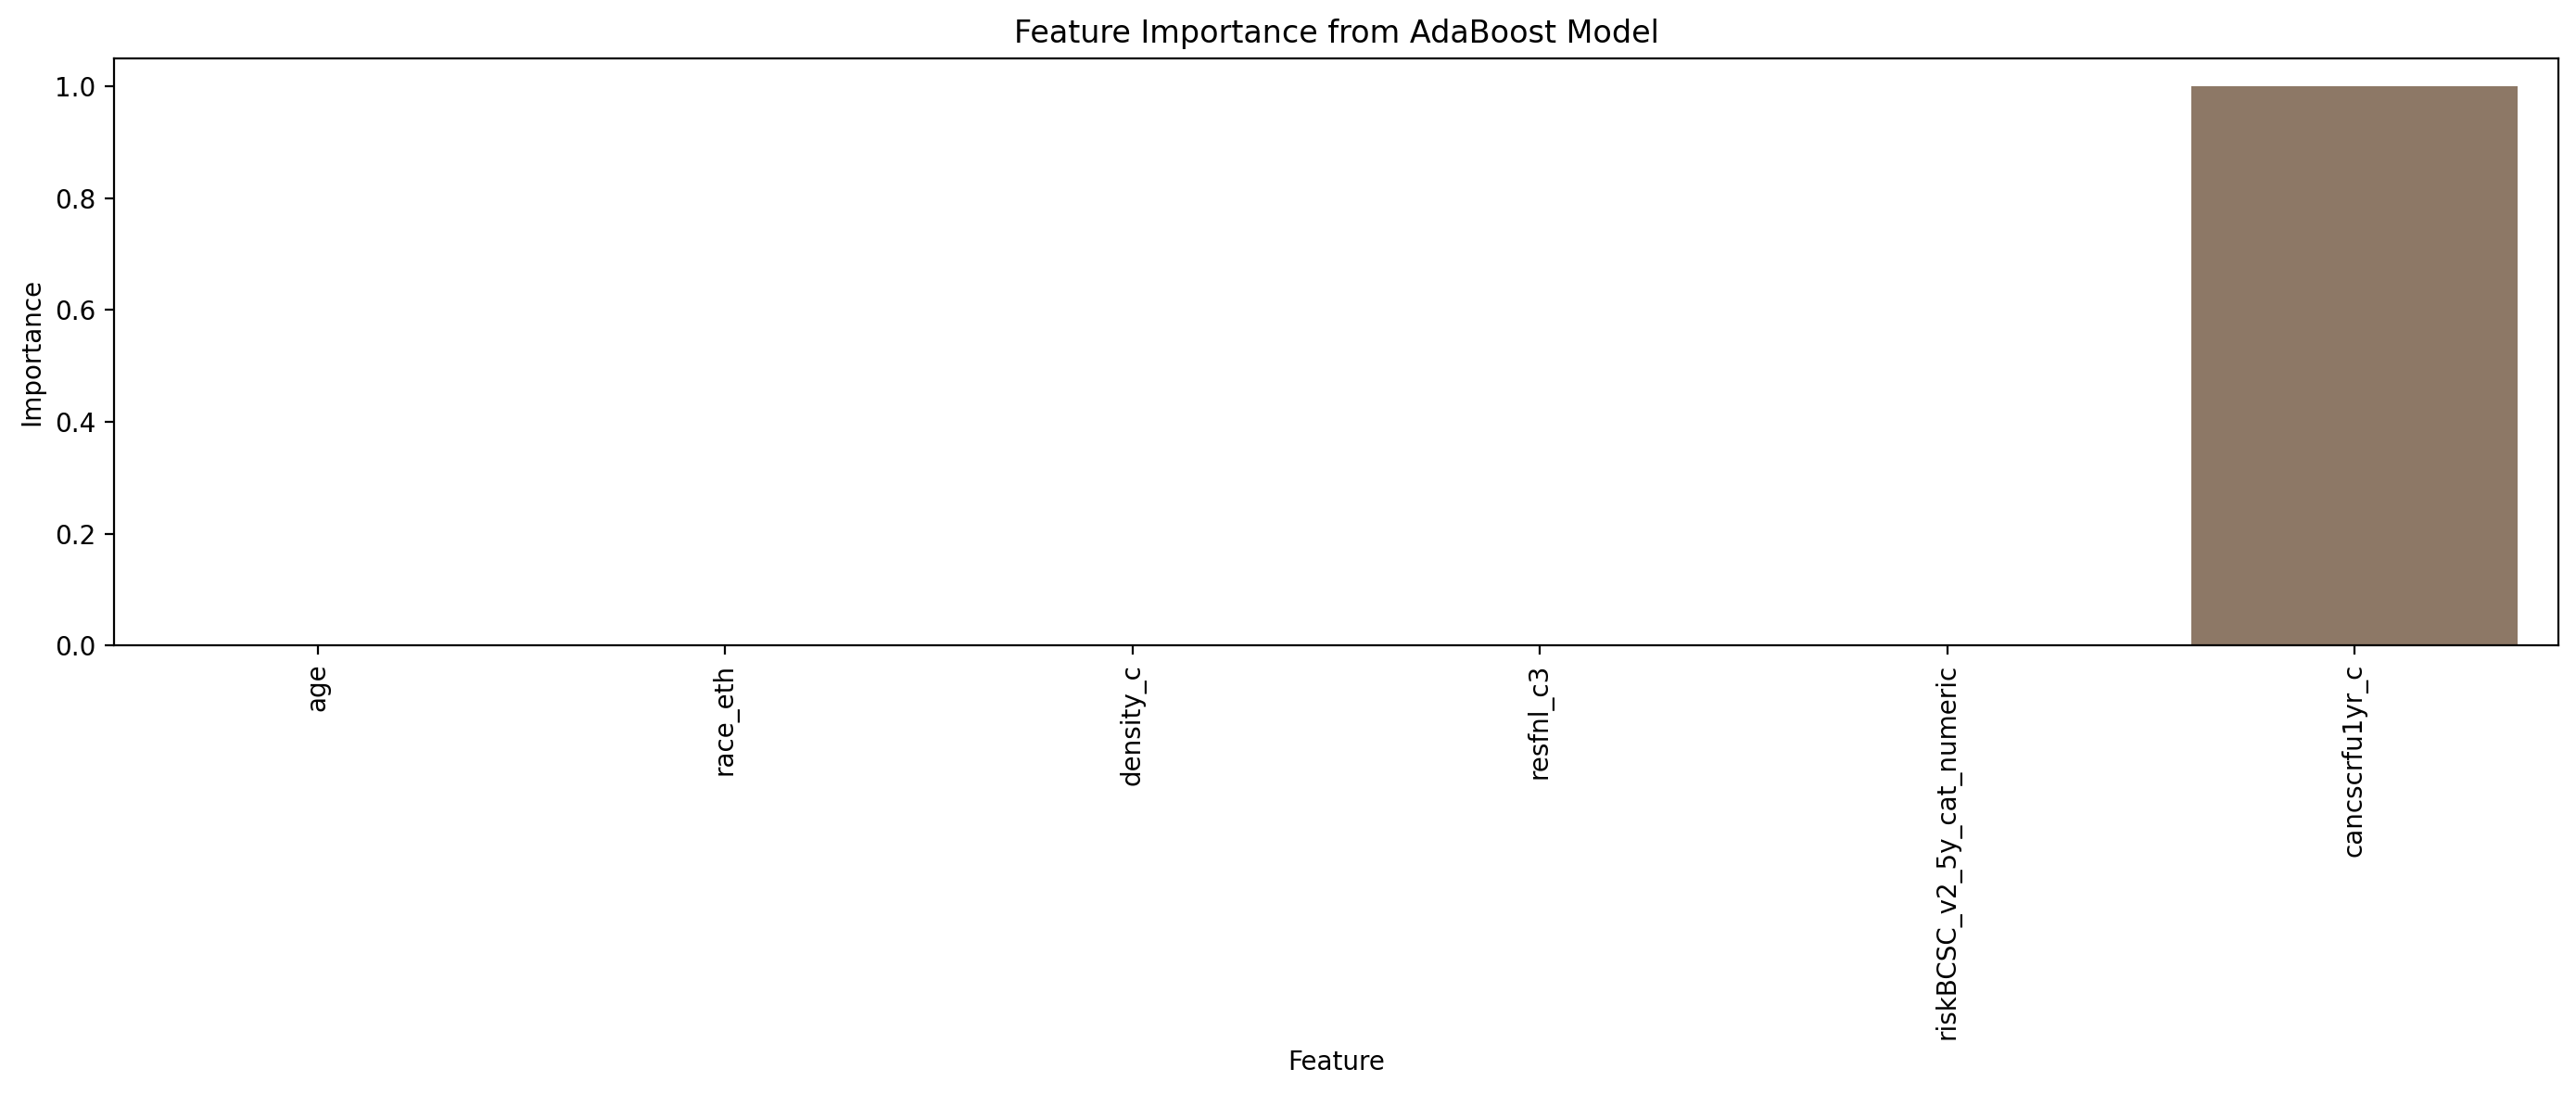

In [528]:
# bar plot showing the importance of each feature sorted by their "importance" values

imp_feats_ab = imp_feats_ab.reset_index()

# # Plot
plt.figure(figsize=(14,6), dpi=200)
#sns.barplot(data=imp_feats_ab.sort_values('Importance'),x=imp_feats_ab.index,y='Importance', palette='deep')
sns.barplot(data=imp_feats_ab.sort_values('Importance'), x='index', y='Importance', palette='deep')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from AdaBoost Model')
plt.tight_layout()
plt.show()

<Axes: xlabel='cancscrfu1yr_c', ylabel='count'>

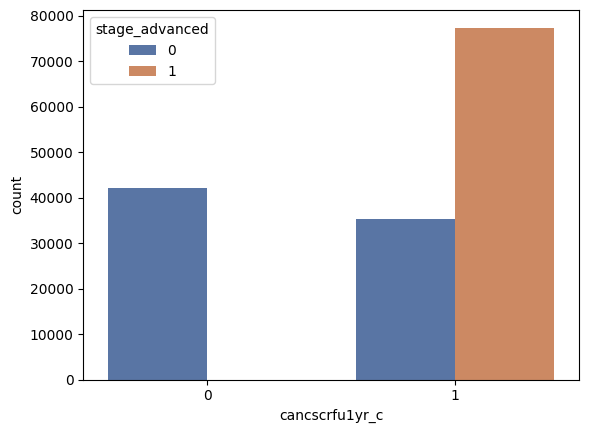

In [539]:
# Create a count plot of 'cig_years' with respect to 'colo_cancer
sns.countplot(data=final_df,x='cancscrfu1yr_c',hue='stage_advanced', palette='deep')

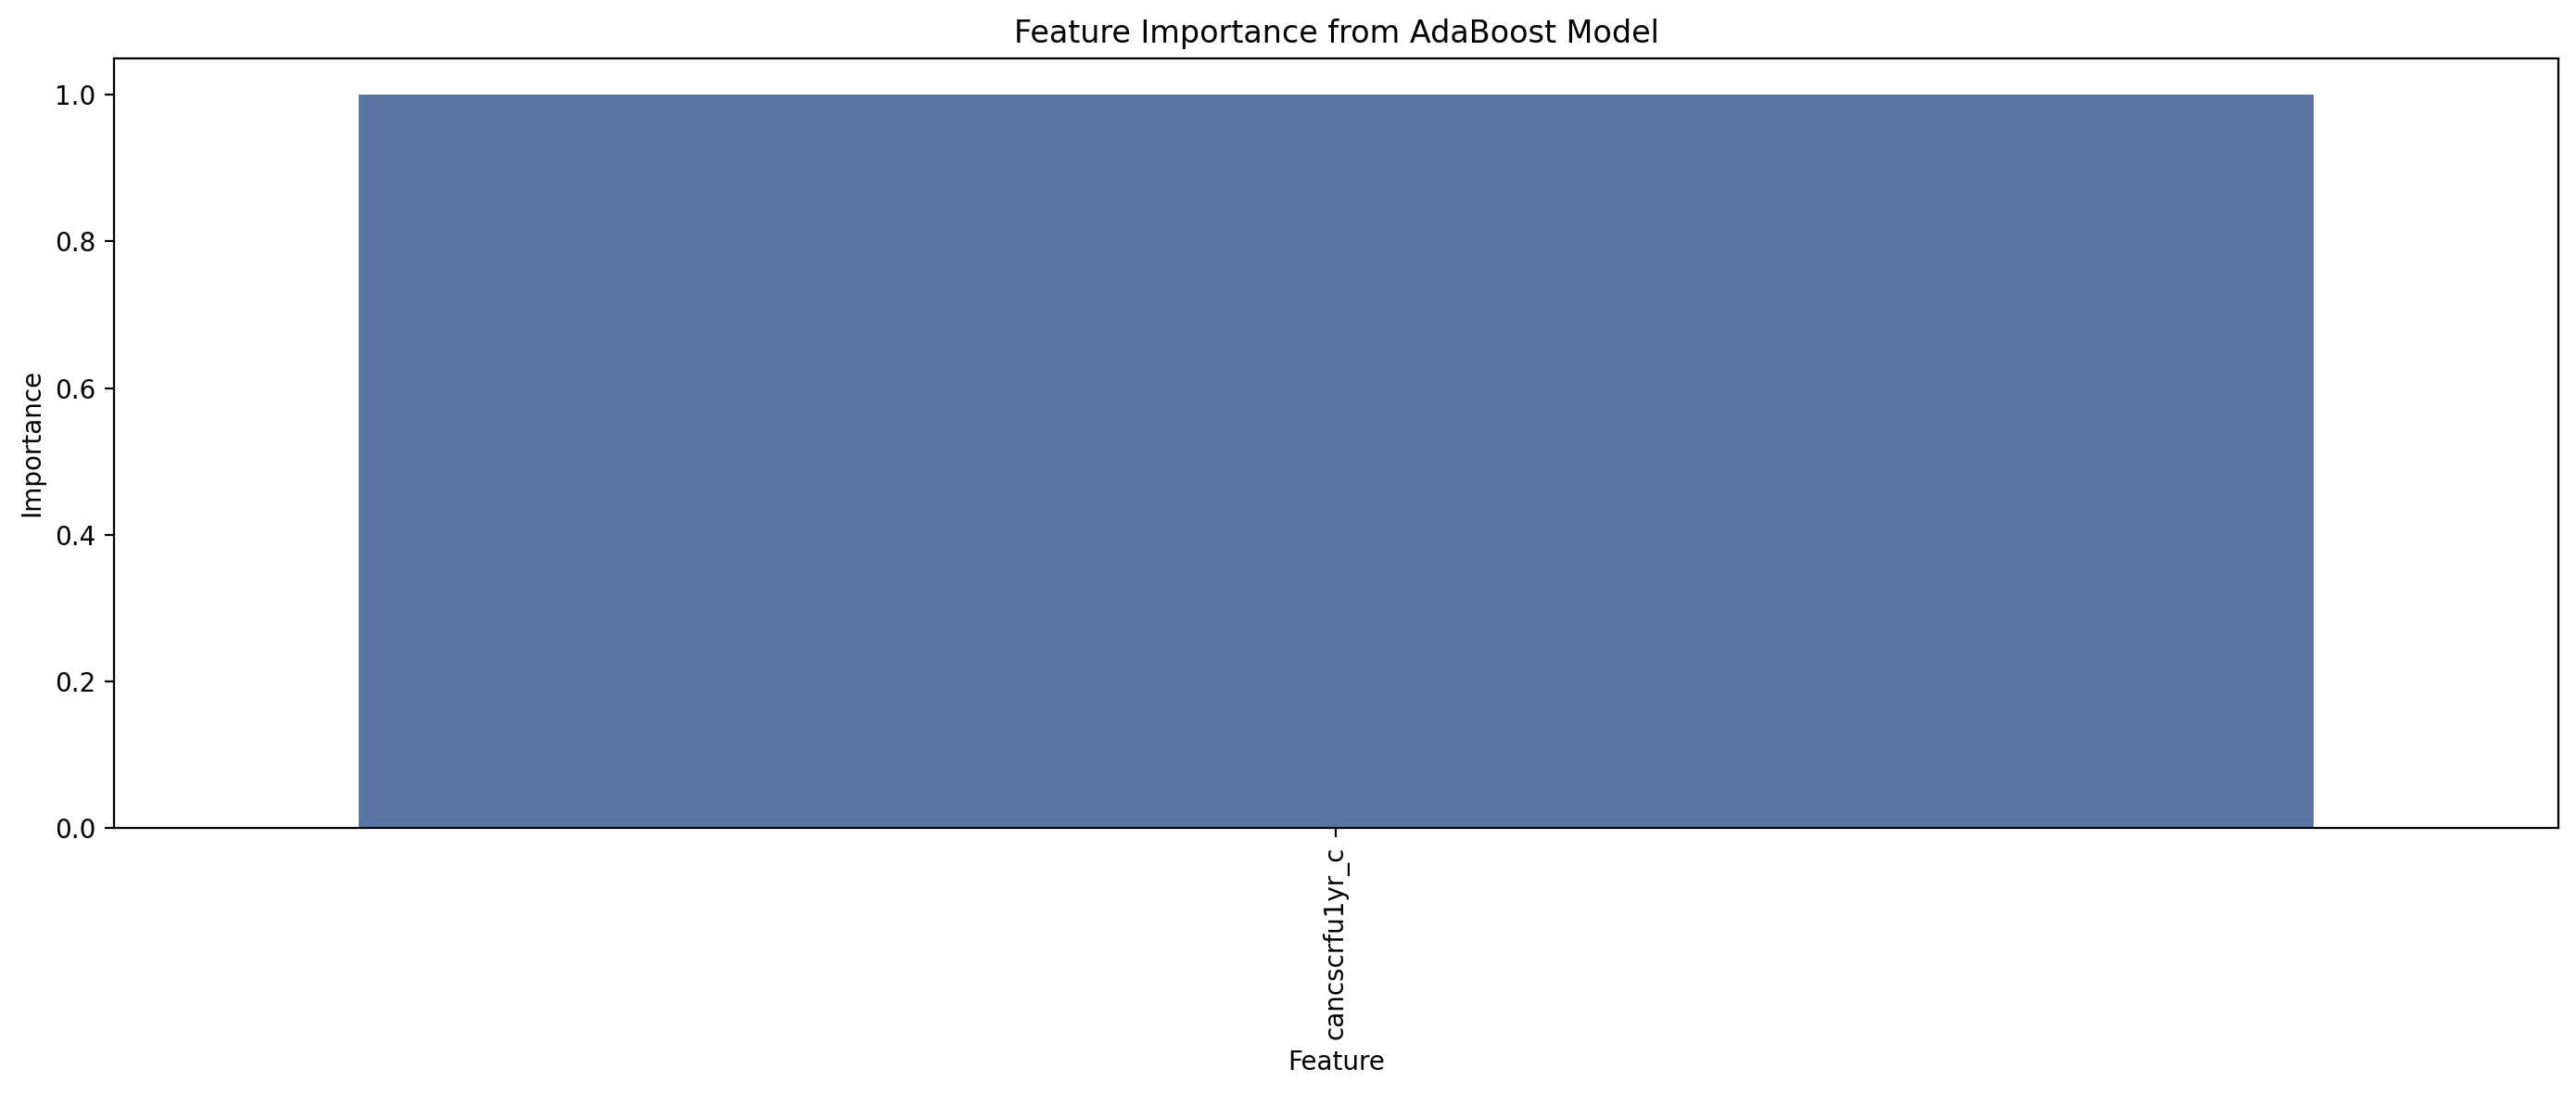

In [540]:
#### To display feature importance > 0

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Extract feature importances from the AdaBoost model
feature_importances_ab = best_model_ab2.feature_importances_

# Create a DataFrame with feature importances
feats_ab = pd.DataFrame(index=X7.columns, data=feature_importances_ab, columns=['Importance'])

# Filter the dataframe to select only those rows where the value in the "Importance" column is greater than 0
imp_feats_ab = feats_ab[feats_ab['Importance'] > 0 ]

# Sort the dataframe by the values in the "Importance" column in ascending order
imp_feats_ab = imp_feats_ab.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(14, 6), dpi=200)
sns.barplot(data=imp_feats_ab.reset_index(), x='index', y='Importance', palette='deep')
#sns.barplot(data=imp_feats_ab.sort_values('Importance'), x='index', y='Importance', palette='deep')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from AdaBoost Model')
plt.tight_layout()
plt.show()

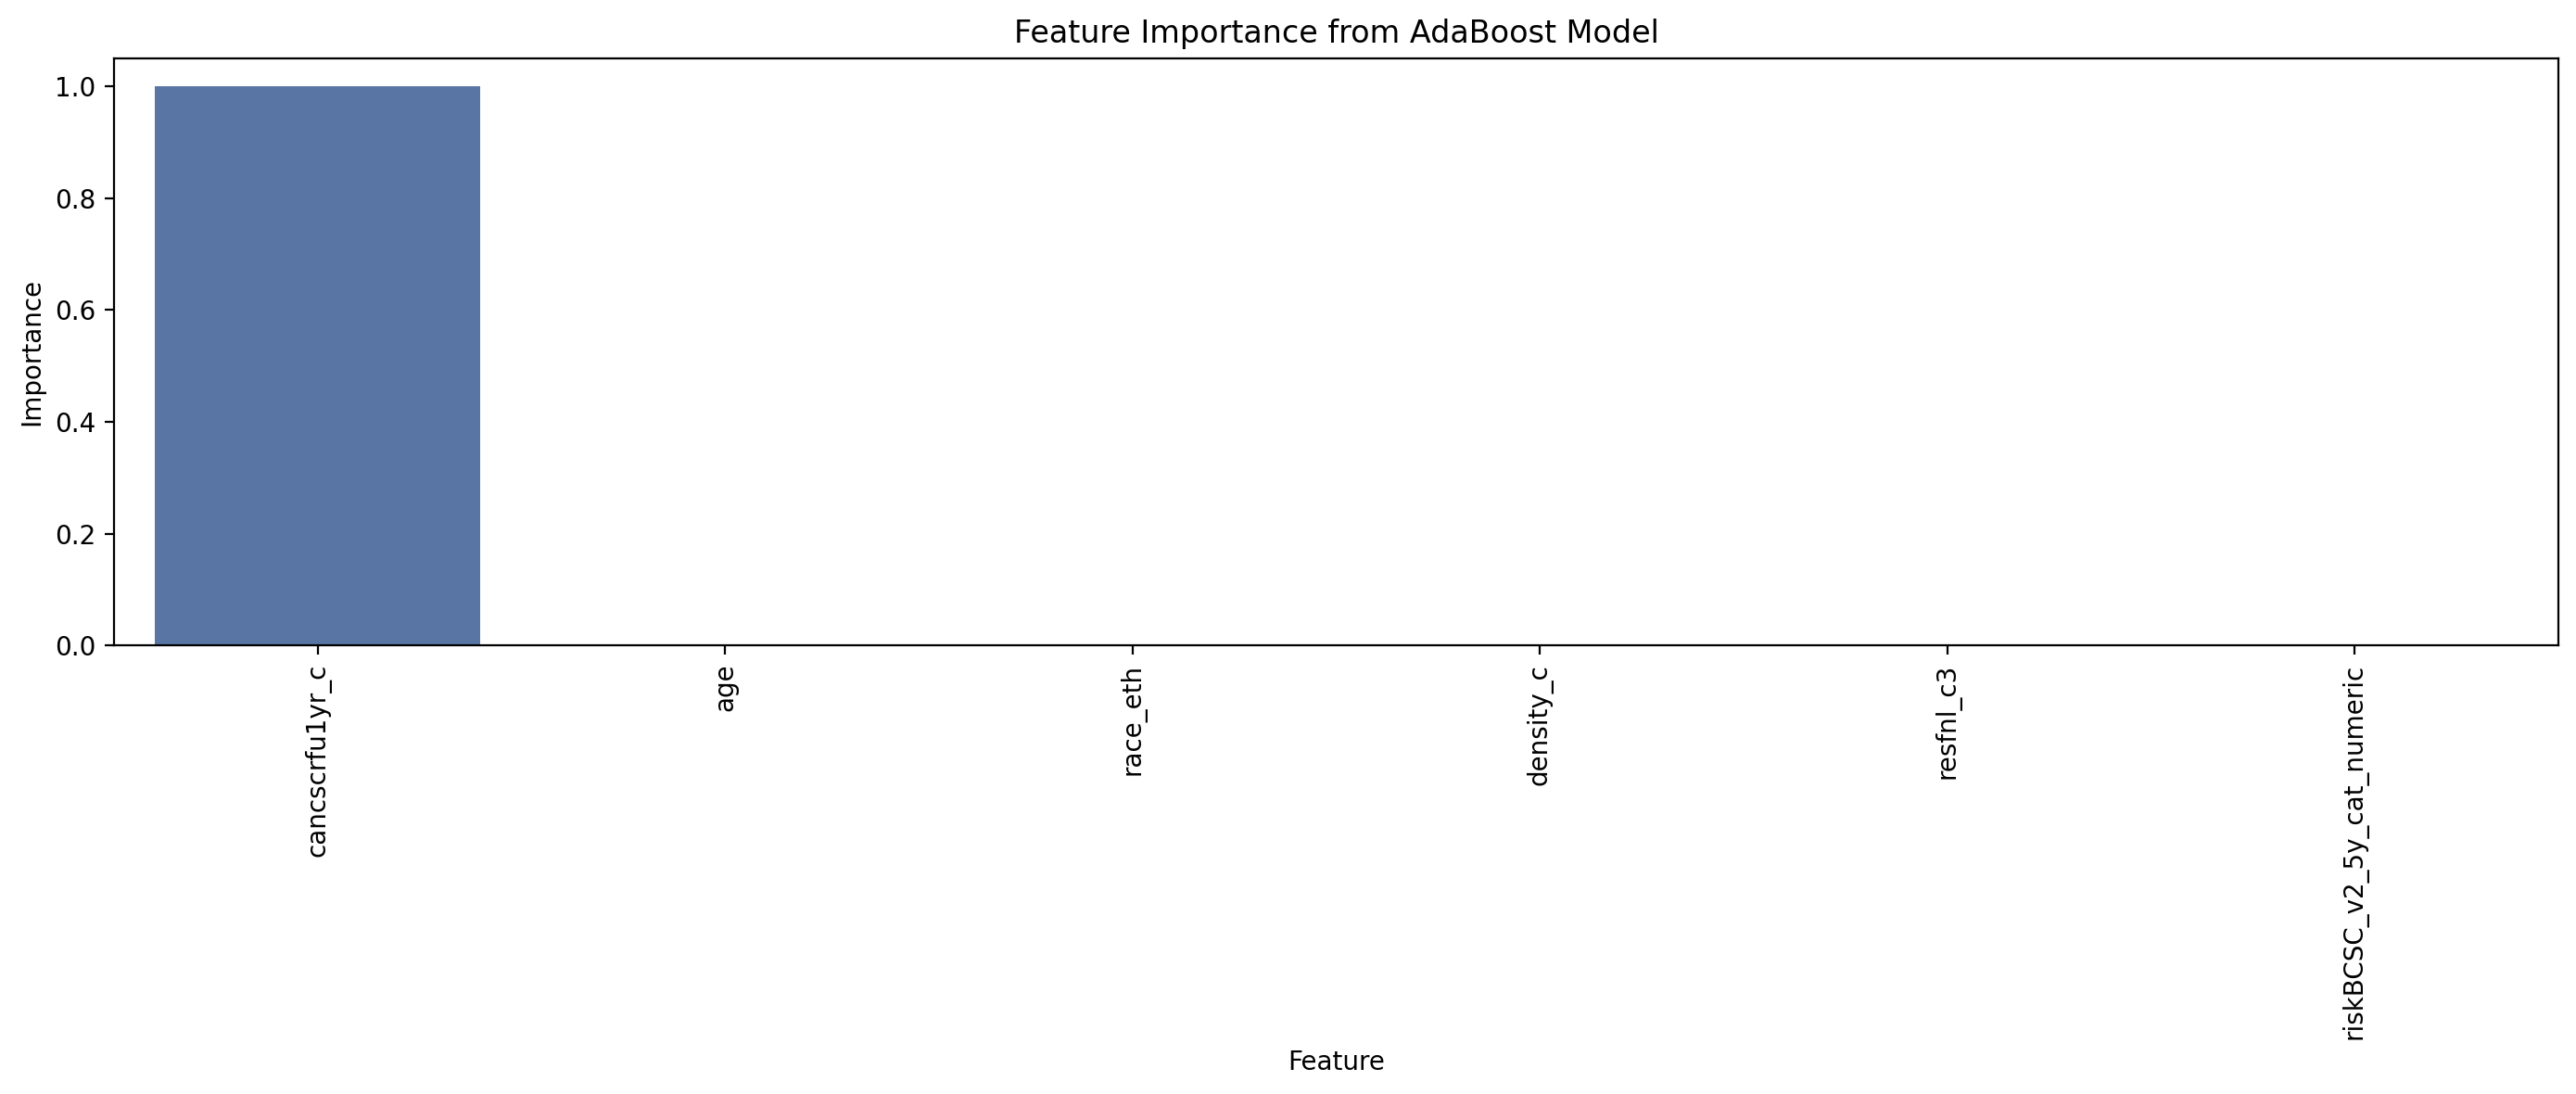

In [541]:
#### To display all features

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Extract feature importances from the AdaBoost model
feature_importances_ab = best_model_ab2.feature_importances_

# Create a DataFrame with feature importances
feats_ab = pd.DataFrame(index=X7.columns, data=feature_importances_ab, columns=['Importance'])

# Sort the dataframe by the values in the "Importance" column in descending order
feats_ab = feats_ab.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(14, 6), dpi=200)
sns.barplot(data=feats_ab.reset_index(), x='index', y='Importance', palette='deep')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from AdaBoost Model')
plt.tight_layout()
plt.show()

In [542]:
# Extract feature importances from the AdaBoost model
feature_importances_ab = best_model_ab2.feature_importances_
feature_importances_ab

array([0., 0., 0., 0., 1., 0.])

In [543]:
# Create a DataFrame with feature importances
feats_ab = pd.DataFrame(index=X7.columns, data=feature_importances_ab, columns=['Importance'])
feats_ab

Importance
age                                0.0
race_eth                           0.0
density_c                          0.0
resfnl_c3                          0.0
cancscrfu1yr_c                     1.0
riskBCSC_v2_5y_cat_numeric         0.0

##XGBoost

### Train|Test Split and Scaling Data

In [546]:
# Import necessary libraries
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
#import shap

In [547]:
# Split the data into features and target variable
X8 = final_df.drop('stage_advanced', axis=1)
y8 = final_df['stage_advanced']

In [548]:
from sklearn.model_selection import train_test_split

In [549]:
# Splitting the DataFrame, X8 and the Series, y8 to a train set and a test set in a 70/30 ratio.
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, train_size=0.7, random_state=50)
print("Training data size:", X8_train.shape[0])

Training data size: 108403


In [550]:
#  Standardize the data
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler_xgb = StandardScaler()

In [551]:
scaled_X8_train = scaler_xgb.fit_transform(X8_train)
scaled_X8_test = scaler_xgb.transform(X8_test)

### Modeling

In [553]:
# Convert data into DMatrix format
dtrain8 = xgb.DMatrix(scaled_X8_train, label=y8_train)
dtest8 = xgb.DMatrix(scaled_X8_test, label=y8_test)

### Model Evaluation

In [555]:
# Set parameters for XGBoost model
params_xgb = {
    'max_depth': 3,
    'learning_rate': 0.1,
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'logloss'          # Use log loss as evaluation metric
}

# Train XGBoost model
num_rounds = 100  # Number of boosting rounds
bst = xgb.train(params_xgb, dtrain8, num_rounds)

# Predictions on the test set
y8_pred_xgb = bst.predict(dtest8)

# Convert predicted probabilities to binary predictions
y8_pred_binary_xgb = [1 if p > 0.5 else 0 for p in y8_pred_xgb]

# Evaluate model performance
accuracy_xgb1 = accuracy_score(y8_test, y8_pred_binary_xgb)
print("Accuracy:", accuracy_xgb1)

Accuracy: 0.7859187670849567


####First Confusion Matrix - XGBoost

Confusion Matrix for XGBoost:

[[13413  9737]
 [  209 23100]]


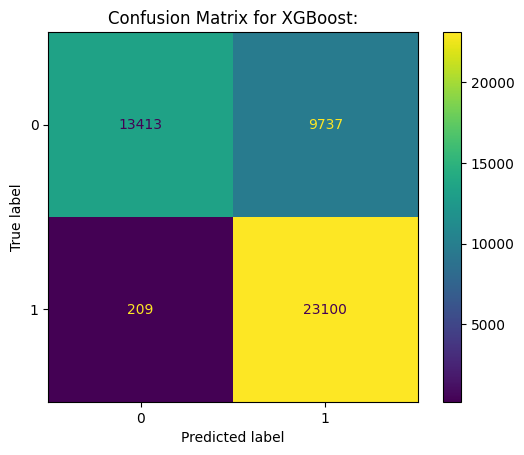

In [557]:
from sklearn.metrics import confusion_matrix

# Convert predicted probabilities to binary predictions
y8_pred_binary_xgb = [1 if p > 0.5 else 0 for p in y8_pred_xgb]

# Calculate confusion matrix
cm_xgb1 = confusion_matrix(y8_test, y8_pred_binary_xgb)

# Print confusion matrix
print("Confusion Matrix for XGBoost:\n")
print(cm_xgb1)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb1)
disp.plot()
plt.title("Confusion Matrix for XGBoost:")
plt.show()

####First Classification Report - XGBoost

In [559]:
# Generate classification report
from sklearn.metrics import classification_report

target_names_xgb1 = ['No CA', 'CA']
class_report_xgb1 = classification_report(y8_test, y8_pred_binary_xgb, target_names=target_names_xgb1)
print("Classification Report for XG Boost:\n\n", class_report_xgb1)

# target_names = ['No CA', 'CA']
# print("Classification Report for XGBoost:\n\n", classification_report(y8_test, y8_pred_binary_xgb, target_names=target_names))

Classification Report for XG Boost:

               precision    recall  f1-score   support

       No CA       0.98      0.58      0.73     23150
          CA       0.70      0.99      0.82     23309

    accuracy                           0.79     46459
   macro avg       0.84      0.79      0.78     46459
weighted avg       0.84      0.79      0.78     46459



####First Precision-Recall Curve - XGBoost

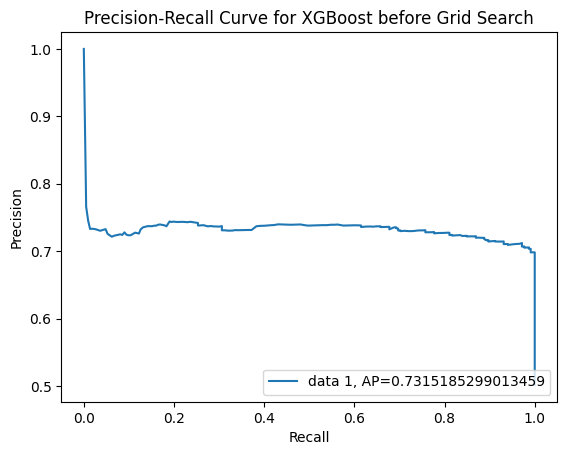

In [561]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier

# Predict probabilities on the test set using the best model from GridSearchCV
y8_pred_proba1 = bst.predict(dtest8)

# Calculate precision and recall
precision_xgb1, recall_xgb1, _ = precision_recall_curve(y8_test, y8_pred_proba1)

# Calculate average precision
ab_xgb1 = average_precision_score(y8_test, y8_pred_proba1)

# Plot precision-recall curve
plt.plot(recall_xgb1, precision_xgb1, label="data 1, AP=" + str(ab_xgb1))
plt.legend(loc=4)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XGBoost before Grid Search')
#plt.grid(True)
plt.show()

####First ROC Curve - XG Boost

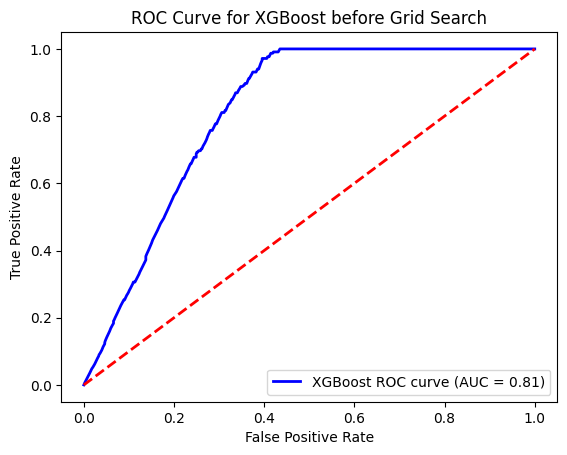

In [563]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from xgboost import XGBClassifier

# Predicted probabilities for the positive class from the best model
y8_prob_xgb = bst.predict(dtest8)

# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr_xgb, tpr_xgb, thresholds = roc_curve(y8_test, y8_prob_xgb)

# Calculate area under the ROC curve (AUC)
auc_xgb1 = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label='XGBoost ROC curve (AUC = %0.2f)' % auc_xgb1)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost before Grid Search')
plt.legend(loc='lower right')
#plt.grid(True)
plt.show()

#### Grid Search in Attempt for Better Model

In [565]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid_xgb = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Create XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic')

# Perform grid search
grid_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=3, scoring='accuracy', verbose=2)

# Fit the grid search to the data
grid_xgb.fit(scaled_X8_train, y8_train)

# Get the best parameters
best_params_xbg = grid_xgb.best_params_
print("Best Parameters:", best_params_xbg)

# Get the best model
best_model_xgb = grid_xgb.best_estimator_

# Evaluate the best model on the test set
accuracy_xgb2 = best_model_xgb.score(scaled_X8_test, y8_test)
print("Accuracy:", accuracy_xgb2)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=6, n_es

In [566]:
from sklearn.model_selection import GridSearchCV

# Define the parameters grid for grid search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='roc_auc')
grid_search.fit(scaled_X8_train, y8_train)

# Get the best parameters and best score
best_params_xgb = grid_search.best_params_
best_score_xgb = grid_search.best_score_

# Create a new XGBoost classifier with the best parameters
best_xgb_classifier = XGBClassifier(**best_params_xgb)

# Train the model with the best parameters
best_xgb_classifier.fit(scaled_X8_train, y8_train)

# Predictions on the test set using the best model
y8_pred_xgb2 = best_xgb_classifier.predict(scaled_X8_test) #best_model_xgb

#####Second Confusion Matrix - XG Boost

Confusion Matrix for XGBoost after Grid Search:

[[15206  7944]
 [    0 23309]]


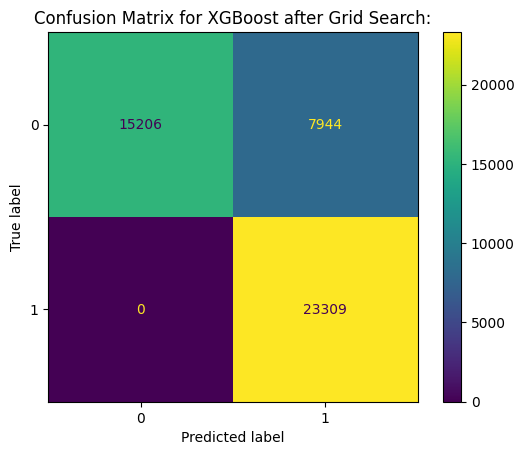

In [568]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm_xgb2 = confusion_matrix(y8_test, y8_pred_xgb2) #y8_pred_xgb
print("Confusion Matrix for XGBoost after Grid Search:\n")
print(cm_xgb2)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb2)
disp.plot()
plt.title("Confusion Matrix for XGBoost after Grid Search:")
plt.show()

#####Second Classification Report - XGBoost

In [570]:
# Generate classification report
from sklearn.metrics import classification_report

target_names_xgb2 = ['No CA', 'CA']
class_report_xgb2 = classification_report(y8_test, y8_pred_xgb2, target_names=target_names_xgb2)
print("Classification Report for XGBoost after Grid Search:\n\n", class_report_xgb2)

#print(class_report_xgb2)

# target_names_xgb2 = ['No CA', 'CA']
# print("Classification Report for XG Boost after Grid Search:\n\n", classification_report(y8_test, y8_pred_xgb, target_names=target_names))

Classification Report for XGBoost after Grid Search:

               precision    recall  f1-score   support

       No CA       1.00      0.66      0.79     23150
          CA       0.75      1.00      0.85     23309

    accuracy                           0.83     46459
   macro avg       0.87      0.83      0.82     46459
weighted avg       0.87      0.83      0.82     46459



#####Second Precision-Recall Curve - XG Boost

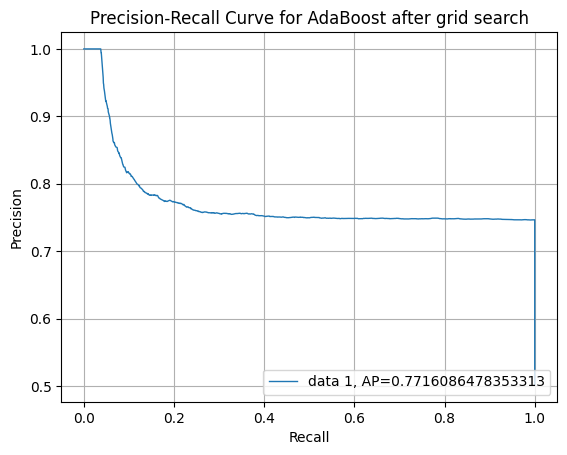

In [572]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Predicted probabilities for the positive class from the best model
y8_pred_proba2 = best_xgb_classifier.predict_proba(scaled_X8_test)[:, 1]

# Calculate precision and recall
precision_xgb2, recall_xgb2, _ = precision_recall_curve(y8_test, y8_pred_proba2)

# Calculate average precision
ab_xgb2 = average_precision_score(y8_test, y8_pred_proba2)

# Plot precision-recall curve
plt.plot(recall_xgb2, precision_xgb2, lw=1, label="data 1, AP=" + str(ab_xgb2))
plt.legend(loc=4)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for AdaBoost after grid search')
plt.grid(True)
plt.show()

#####Second ROC Curve - XG Boost

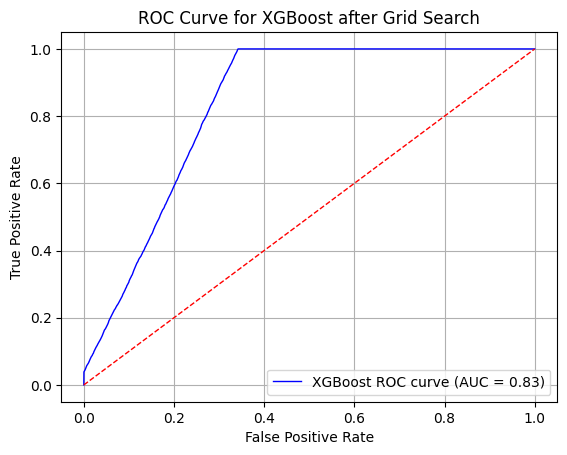

In [574]:
# ROC Curve

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predicted probabilities for the positive class from the best model
y8_prob_xgb2 = best_xgb_classifier.predict_proba(scaled_X8_test)[:, 1] #best_model_xgb

# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr_xgb_gs, tpr_xgb_gs, thresholds_xgb_gs = roc_curve(y8_test, y8_prob_xgb2)

# Calculate area under the ROC curve (AUC)
auc_xgb2 = auc(fpr_xgb_gs, tpr_xgb_gs)

# Plot ROC curve
plt.plot(fpr_xgb_gs, tpr_xgb_gs, color='blue', lw=1, label='XGBoost ROC curve (AUC = %0.2f)' % auc_xgb2)
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost after Grid Search')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

####Feature Importance

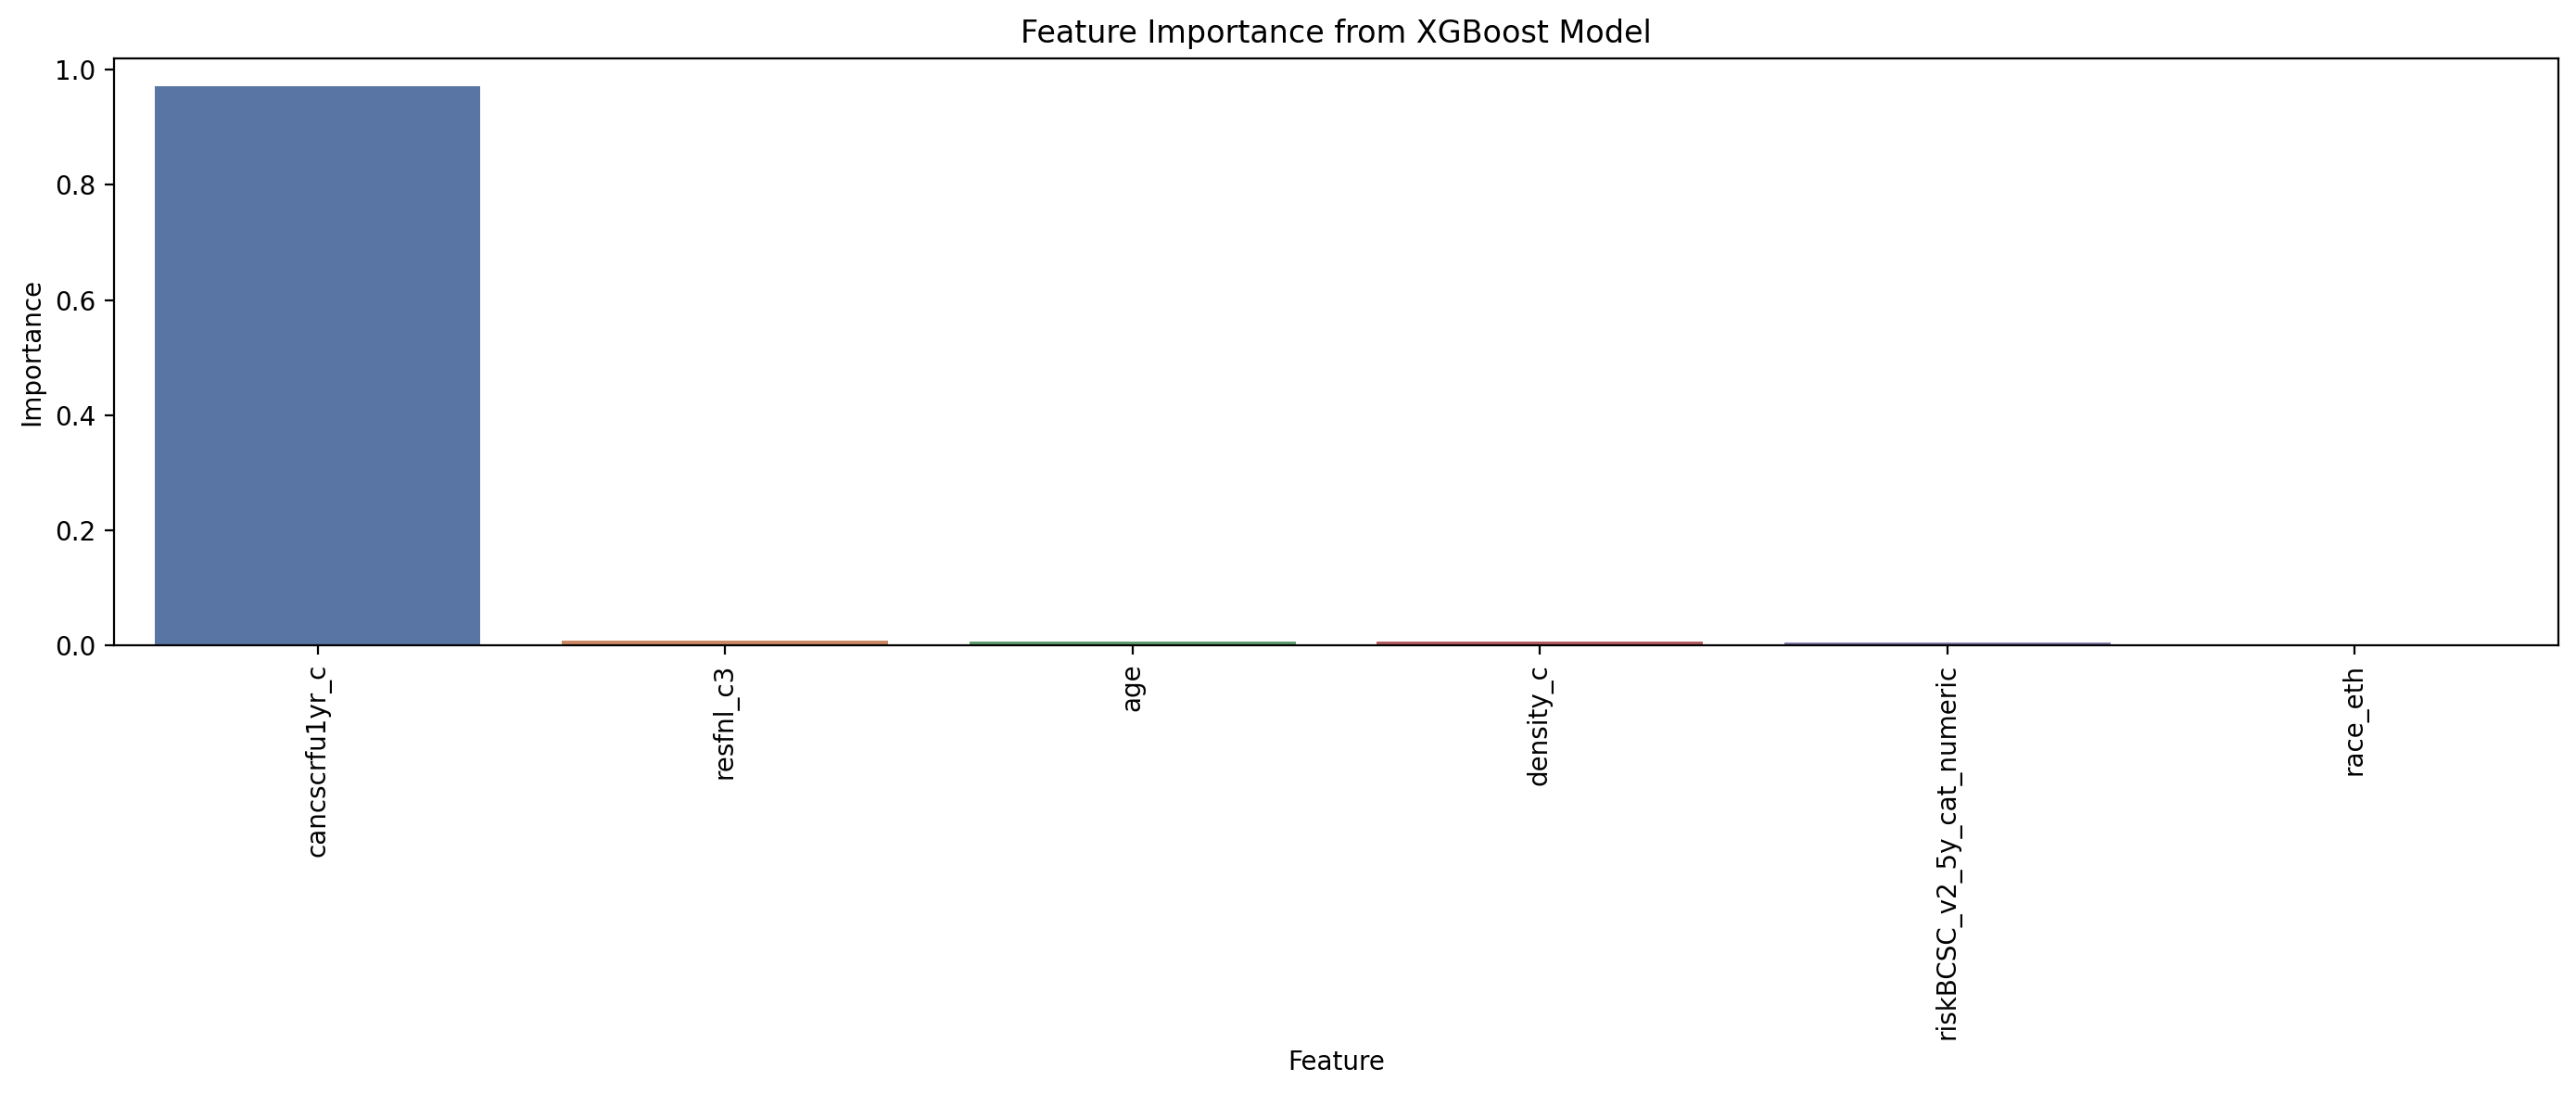

In [576]:
# Feature Importance

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Extract feature importances from the XGBoost model
feature_importances_xgb = best_xgb_classifier.feature_importances_ #best_model_xgb
# Create a DataFrame with feature importances
feats_xgb = pd.DataFrame(index=X8.columns, data=feature_importances_xgb, columns=['Importance'])

# Sort the dataframe by the values in the "Importance" column in descending order
feats_xgb = feats_xgb.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(14, 6), dpi=200)
sns.barplot(data=feats_xgb.reset_index(), x='index', y='Importance', palette='deep')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from XGBoost Model')
plt.tight_layout()
plt.show()

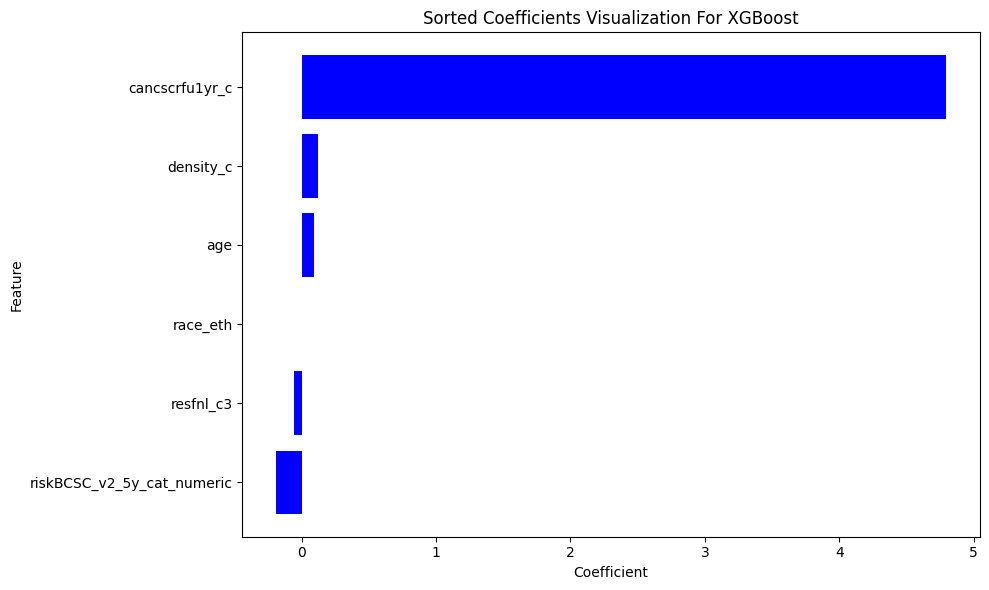

In [577]:
import matplotlib.pyplot as plt

# Get coefficients and feature names
coefficients = best_model_lr.coef_[0]
feature_names = X8.columns

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients in descending order
sorted_coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=True)

#Create a barplot of sorted coefficients
plt.figure(figsize=(10, 6))
plt.barh(sorted_coefficients_df['Feature'], sorted_coefficients_df['Coefficient'], color ='blue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Sorted Coefficients Visualization For XGBoost')
plt.tight_layout()
plt.show()

In [578]:
# Create a DataFrame with feature importances
feats_xgb = pd.DataFrame(index=X8.columns, data=feature_importances_xgb, columns=['Importance'])
feats_xgb

Importance
age                           0.007207
race_eth                      0.000480
density_c                     0.006254
resfnl_c3                     0.008787
cancscrfu1yr_c                0.971534
riskBCSC_v2_5y_cat_numeric    0.005737

#Supervised Model Comparisons

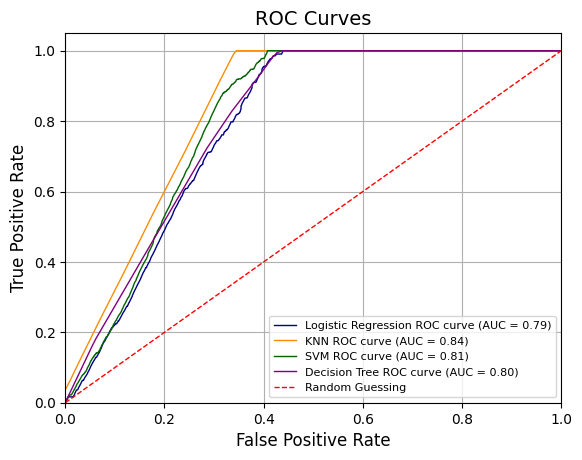

In [580]:
# Logistic Regression

# Calculate ROC curve
fpr_lr_best, tpr_lr_best, thresholds_lr_best = roc_curve(y1_test, y1_prob_lr2)
# Calculate AUC (Area Under the Curve)
roc_auc_lr_best = auc(fpr_lr_best, tpr_lr_best)
# Plot ROC curve
plt.plot(fpr_lr_best, tpr_lr_best, color='darkblue', lw=1, label='Logistic Regression ROC curve (AUC = %0.2f)' % roc_auc_lr_best)

# K Nearest Neighbors

# Calculate ROC curve
fpr_knn_gs, tpr_knn_gs, thresholds_knn_gs = roc_curve(y2_test, y2_prob_knn2)
# Calculate AUC (Area Under the Curve)
roc_auc_knn2 = auc(fpr_knn_gs, tpr_knn_gs)
# Plot ROC curve
plt.plot(fpr_knn_gs, tpr_knn_gs, color='darkorange', lw=1, label='KNN ROC curve (AUC = %0.2f)' % roc_auc_knn2)

# Support Vector Machines

# Calculate ROC curve
fpr_svm_gs, tpr_svm_gs, thresholds_svm_gs = roc_curve(y3_test, y3_prob_svm2)
# Calculate AUC (Area Under the Curve)
roc_auc_svm2 = auc(fpr_svm_gs, tpr_svm_gs)
# Plot ROC curve
plt.plot(fpr_svm_gs, tpr_svm_gs, color='darkgreen', lw=1, label='SVM ROC curve (AUC = %0.2f)' % roc_auc_svm2)

# Decision Tree

# Calculate ROC curve
fpr_dt_gs, tpr_dt_gs, thresholds_dt = roc_curve(y4_test, y4_prob_dt2)
# Calculate AUC (Area Under the Curve)
roc_auc_dt2 = auc(fpr_dt_gs, tpr_dt_gs)
# Plot ROC curve
plt.plot(fpr_dt_gs, tpr_dt_gs, color='purple', lw=1, label='Decision Tree ROC curve (AUC = %0.2f)' % roc_auc_dt2)

# Plot ROC curve

# plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves', fontsize=14)
plt.legend(loc='lower right', fontsize=8)
plt.grid(True)
plt.show()

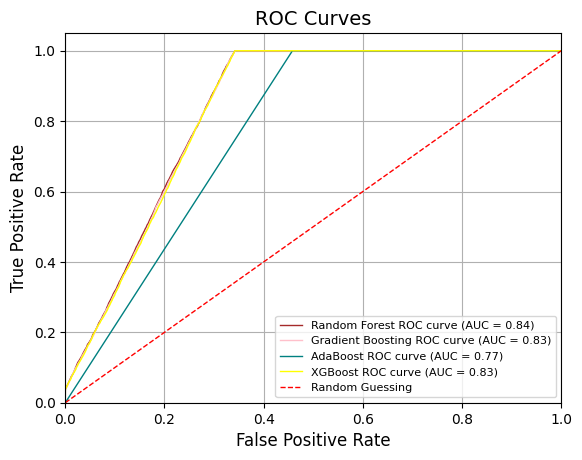

In [581]:
# Random Forest

# Calculate ROC curve
fpr_rf_gs, tpr_rf_gs, thresholds = roc_curve(y5_test, y5_prob2)
# Calculate AUC (Area Under the Curve)
roc_auc_rf2 = auc(fpr_rf_gs, tpr_rf_gs)
# Plot ROC curve
plt.plot(fpr_rf_gs, tpr_rf_gs, color='brown', lw=1, label='Random Forest ROC curve (AUC = %0.2f)' % roc_auc_rf2)

# Gradient Boosting

# Calculate false positive rate (fpr) and true positive rate (tpr)
fpr_gb_gs, tpr_gb_gs, _ = roc_curve(y6_test, y6_prob2)

# Calculate Area Under the Curve (AUC)
roc_auc_gb2 = auc(fpr_gb_gs, tpr_gb_gs)

# Plot ROC curve
plt.plot(fpr_gb_gs, tpr_gb_gs, color='pink', lw=1, label='Gradient Boosting ROC curve (AUC = %0.2f)' % roc_auc_gb2)

# AdaBoost

# # Calculate ROC curve
fpr_ab_gs, tpr_ab_gs, _ = roc_curve(y7_test, y7_prob_ab2)
# Calculate AUC
auc_ab2 = auc(fpr_ab_gs, tpr_ab_gs)
# Plot ROC curve
plt.plot(fpr_ab_gs, tpr_ab_gs, color='teal', lw=1, label='AdaBoost ROC curve (AUC = %0.2f)' % auc_ab2)

# XGBoost

# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr_xgb_gs, tpr_xgb_gs, thresholds_xgb_gs = roc_curve(y8_test, y8_prob_xgb2)
# Calculate area under the ROC curve (AUC)
auc_xgb2 = auc(fpr_xgb_gs, tpr_xgb_gs)
# Plot ROC curve
plt.plot(fpr_xgb_gs, tpr_xgb_gs, color='yellow', lw=1, label='XGBoost ROC curve (AUC = %0.2f)' % auc_xgb2)

# Plot ROC curve

# plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves', fontsize=14)
plt.legend(loc='lower right', fontsize=8)
plt.grid(True)
plt.show()

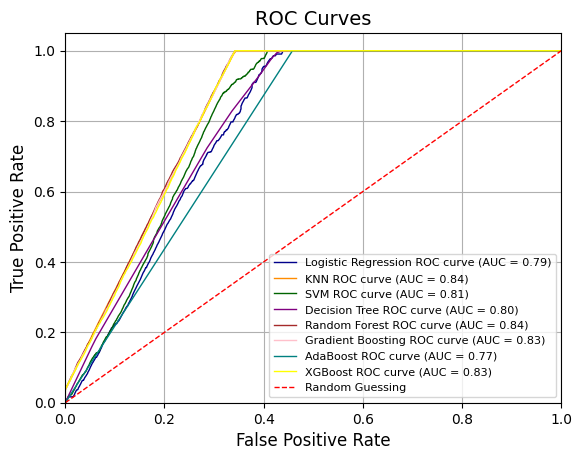

In [582]:
# Logistic Regression

# Calculate ROC curve
fpr_lr_best, tpr_lr_best, thresholds_lr_best = roc_curve(y1_test, y1_prob_lr2)
# Calculate AUC (Area Under the Curve)
roc_auc_lr_best = auc(fpr_lr_best, tpr_lr_best)
# Plot ROC curve
plt.plot(fpr_lr_best, tpr_lr_best, color='darkblue', lw=1, label='Logistic Regression ROC curve (AUC = %0.2f)' % roc_auc_lr_best)

# K Nearest Neighbors

# Calculate ROC curve
fpr_knn_gs, tpr_knn_gs, thresholds_knn_gs = roc_curve(y2_test, y2_prob_knn2)
# Calculate AUC (Area Under the Curve)
roc_auc_knn2 = auc(fpr_knn_gs, tpr_knn_gs)
# Plot ROC curve
plt.plot(fpr_knn_gs, tpr_knn_gs, color='darkorange', lw=1, label='KNN ROC curve (AUC = %0.2f)' % roc_auc_knn2)

# Support Vector Machines

# Calculate ROC curve
fpr_svm_gs, tpr_svm_gs, thresholds_svm_gs = roc_curve(y3_test, y3_prob_svm2)
# Calculate AUC (Area Under the Curve)
roc_auc_svm2 = auc(fpr_svm_gs, tpr_svm_gs)
# Plot ROC curve
plt.plot(fpr_svm_gs, tpr_svm_gs, color='darkgreen', lw=1, label='SVM ROC curve (AUC = %0.2f)' % roc_auc_svm2)

# Decision Tree

# Calculate ROC curve
fpr_dt_gs, tpr_dt_gs, thresholds_dt = roc_curve(y4_test, y4_prob_dt2)
# Calculate AUC (Area Under the Curve)
roc_auc_dt2 = auc(fpr_dt_gs, tpr_dt_gs)
# Plot ROC curve
plt.plot(fpr_dt_gs, tpr_dt_gs, color='purple', lw=1, label='Decision Tree ROC curve (AUC = %0.2f)' % roc_auc_dt2)

# Random Forest

# Calculate ROC curve
fpr_rf_gs, tpr_rf_gs, thresholds = roc_curve(y5_test, y5_prob2)
# Calculate AUC (Area Under the Curve)
roc_auc_rf2 = auc(fpr_rf_gs, tpr_rf_gs)
# Plot ROC curve
plt.plot(fpr_rf_gs, tpr_rf_gs, color='brown', lw=1, label='Random Forest ROC curve (AUC = %0.2f)' % roc_auc_rf2)

# Gradient Boosting

# Calculate false positive rate (fpr) and true positive rate (tpr)
fpr_gb_gs, tpr_gb_gs, _ = roc_curve(y6_test, y6_prob2)

# Calculate Area Under the Curve (AUC)
roc_auc_gb2 = auc(fpr_gb_gs, tpr_gb_gs)

# Plot ROC curve
plt.plot(fpr_gb_gs, tpr_gb_gs, color='pink', lw=1, label='Gradient Boosting ROC curve (AUC = %0.2f)' % roc_auc_gb2)

# AdaBoost

# # Calculate ROC curve
fpr_ab_gs, tpr_ab_gs, _ = roc_curve(y7_test, y7_prob_ab2)
# Calculate AUC
auc_ab2 = auc(fpr_ab_gs, tpr_ab_gs)
# Plot ROC curve
plt.plot(fpr_ab_gs, tpr_ab_gs, color='teal', lw=1, label='AdaBoost ROC curve (AUC = %0.2f)' % auc_ab2)

# XGBoost

# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr_xgb_gs, tpr_xgb_gs, thresholds_xgb_gs = roc_curve(y8_test, y8_prob_xgb2)
# Calculate area under the ROC curve (AUC)
auc_xgb2 = auc(fpr_xgb_gs, tpr_xgb_gs)
# Plot ROC curve
plt.plot(fpr_xgb_gs, tpr_xgb_gs, color='yellow', lw=1, label='XGBoost ROC curve (AUC = %0.2f)' % auc_xgb2)

# Plot ROC curve

# plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves', fontsize=14)
plt.legend(loc='lower right', fontsize=8)
plt.grid(True)
plt.show()

In [583]:
# Predictions Logistic Regression
observation = 20
predict_obs_lr = X1_test.iloc[observation].values.reshape(1, -1)

# Make the prediction using the logistic_model
prediction_lr = best_model_lr.predict(predict_obs_lr )

# Get the actual label for comparison
actual_lr = y1_test.iloc[observation]

# Output the results
print(f"Logistic Regression Model's prediction for the 20th sample: {prediction_lr[0]}")
print(f"Actual prediction for the 20th sample: {actual_lr}\n")

# Predictions KNN
predict_obs_knn = X2_test.iloc[observation].values.reshape(1, -1)

# Make the prediction using the chosen model (replace 'logistic_model' with your actual model variable)
prediction_knn = pipe.predict(predict_obs_knn )

# Get the actual label for comparison
actual_knn = y2_test.iloc[observation]

# Output the results
print(f"KNN Model's prediction for the 20th sample: {prediction_knn[0]}")
print(f"Actual prediction for the 20th sample: {actual_knn}\n")

# Predictions SVM
predict_obs_svm = X3_test.iloc[observation].values.reshape(1, -1)

# Make the prediction using the chosen model (replace 'logistic_model' with your actual model variable)
prediction_svm = best_model_svm.predict(predict_obs_svm )

# Get the actual label for comparison
actual_svm = y3_test.iloc[observation]

# Output the results
print(f"SVM Model's prediction for the 20th sample: {prediction_svm[0]}")
print(f"Actual prediction for the 20th sample: {actual_svm}\n")

# Predictions Decision Tree
predict_obs_dt = X4_test.iloc[observation].values.reshape(1, -1)

# Make the prediction using the chosen model (replace 'logistic_model' with your actual model variable)
prediction_dt = best_model_dt2.predict(predict_obs_dt)

# Get the actual label for comparison
actual_dt = y4_test.iloc[observation]

# Output the results
print(f"Decision Tree Model's prediction for the 20th sample: {prediction_dt[0]}")
print(f"Actual prediction for the 20th sample: {actual_dt}\n")

# Predictions Random Forest
predict_obs_rf = X5_test.iloc[observation].values.reshape(1, -1)

# Make the prediction using the chosen model (replace 'logistic_model' with your actual model variable)
prediction_rf = best_model_rf.predict(predict_obs_rf)

# Get the actual label for comparison
actual_dt = y5_test.iloc[observation]

# Output the results
print(f"Random Forest Model's prediction for the 20th sample: {prediction_rf[0]}")
print(f"Actual prediction for the 20th sample: {actual_dt}\n")

# Predictions Gradient Boosting
predict_obs_gb = X6_test.iloc[observation].values.reshape(1, -1)

# Make the prediction using the chosen model (replace 'logistic_model' with your actual model variable)
prediction_gb = best_model_gb.predict(predict_obs_gb)

# Get the actual label for comparison
actual_gb = y6_test.iloc[observation]

# Output the results
print(f"Gradient Boosting Model's prediction for the 20th sample: {prediction_gb[0]}")
print(f"Actual prediction for the 20th sample: {actual_gb}\n")

# Predictions AdaBoost
predict_obs_ab = X7_test.iloc[observation].values.reshape(1, -1)

# Make the prediction using the chosen model (replace 'logistic_model' with your actual model variable)
prediction_ab = best_model_ab2.predict(predict_obs_ab)

# Get the actual label for comparison
actual_ab = y7_test.iloc[observation]

# Output the results
print(f"AdaBoost Model's prediction for the 20th sample: {prediction_ab[0]}")
print(f"Actual prediction for the 20th sample: {actual_ab}\n")

# Predictions XGBoost
predict_obs_xgb = X8_test.iloc[observation].values.reshape(1, -1)

# Make the prediction using the chosen model (replace 'logistic_model' with your actual model variable)
prediction_xgb = best_model_xgb.predict(predict_obs_xgb)

# Get the actual label for comparison
actual_xgb = y8_test.iloc[observation]

# Output the results
print(f"XGBoost Model's prediction for the 20th sample: {prediction_xgb[0]}")
print(f"Actual prediction for the 20th sample: {actual_xgb}\n")

Logistic Regression Model's prediction for the 20th sample: 1
Actual prediction for the 20th sample: 1

KNN Model's prediction for the 20th sample: 1
Actual prediction for the 20th sample: 1

SVM Model's prediction for the 20th sample: 0
Actual prediction for the 20th sample: 1

Decision Tree Model's prediction for the 20th sample: 1
Actual prediction for the 20th sample: 1

Random Forest Model's prediction for the 20th sample: 1
Actual prediction for the 20th sample: 1

Gradient Boosting Model's prediction for the 20th sample: 1
Actual prediction for the 20th sample: 1

AdaBoost Model's prediction for the 20th sample: 1
Actual prediction for the 20th sample: 1

XGBoost Model's prediction for the 20th sample: 1
Actual prediction for the 20th sample: 1



In [613]:
# # Extract 20th observation from the dataframe

# sample = X5_test.iloc[20]
# print(sample)

# Logistic Regression - Extract 20th observation from the dataframe
# extracted_obs_lr = X1_test.iloc[20]
# extracted_ob_lr = y1_test.iloc[20]
# print("Logistic Regression - 20th Observation:\n")
# print("colo_cancer", extracted_ob_lr)
# print(extracted_obs_lr,"\n")

#KNN - Extract 20th observation from the dataframe
extracted_obs_knn = X2_test.iloc[20]
print("KNN - 20th Observation:\n")
print(extracted_obs_knn)

# # Extract 20th observation from the dataframe

# extracted_obs_svm = scaled_X3_test.iloc[20]
# print(extracted_obs_svm)

# # Extract 20th observation from the dataframe

# extracted_obs_dt = scaled_X4_test.iloc[20]
# print(extracted_obs_dt)

# # Extract 20th observation from the dataframe

# extracted_obs_rf = scaled_X5_test.iloc[20]
# print(extracted_obs_rf)

# # Random Forest - Extract 25th observation from the dataframe
# extracted_obs_rf = X5_test.iloc[20]
# extracted_ob_rf = y5_test.iloc[20]
# print("Random Forest - 20th Observation:\n")
# print("colo_cancer", extracted_ob_rf)
# print(extracted_obs_rf,"\n")

# # Extract 20th observation from the dataframe

# extracted_obs_gb = scaled_X6_test.iloc[20]
# print(extracted_obs_gb)

# # Extract 20th observation from the dataframe

# extracted_obs_ab = scaled_X7_test.iloc[20]
# print(extracted_obs_ab)

# # XGBoost - Extract 20th observation from the dataframe

# extracted_obs_xgb = scaled_X8_test.iloc[20]
# print(extracted_obs_xgb)

#extracted_obs_xgb = X8_test.iloc[20]
#extracted_ob_xgb = y8_test.iloc[20]
#print("XGBoost - 20th Observation:\n")
#print("stage_advanced            ", extracted_ob_xgb)
#print(extracted_obs_xgb,"\n")

KNN - 20th Observation:

age                           8
race_eth                      3
density_c                     3
resfnl_c3                     1
cancscrfu1yr_c                1
riskBCSC_v2_5y_cat_numeric    2
Name: 89773, dtype: object


# UnSupervised Machine Learning

##Clustering

###K-Means Clustering

In [215]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import adjusted_rand_score

In [217]:
final_df.columns

Index(['age', 'race_eth', 'density_c', 'resfnl_c3', 'cancscrfu1yr_c',
       'stage_advanced', 'riskBCSC_v2_5y_cat_numeric'],
      dtype='object')

In [219]:
#  Standardize the data
from sklearn.preprocessing import StandardScaler

# Assign the features to a variable
X9 = final_df.drop('stage_advanced', axis=1)
#y9 = final_df['colo_cancer']

# Initialize the StandardScaler
scaler_kmeans = StandardScaler()

# Fit and transform the features data to scale
scaled_X_kmeans = scaler_kmeans.fit_transform(X9)

**Elbow Method**

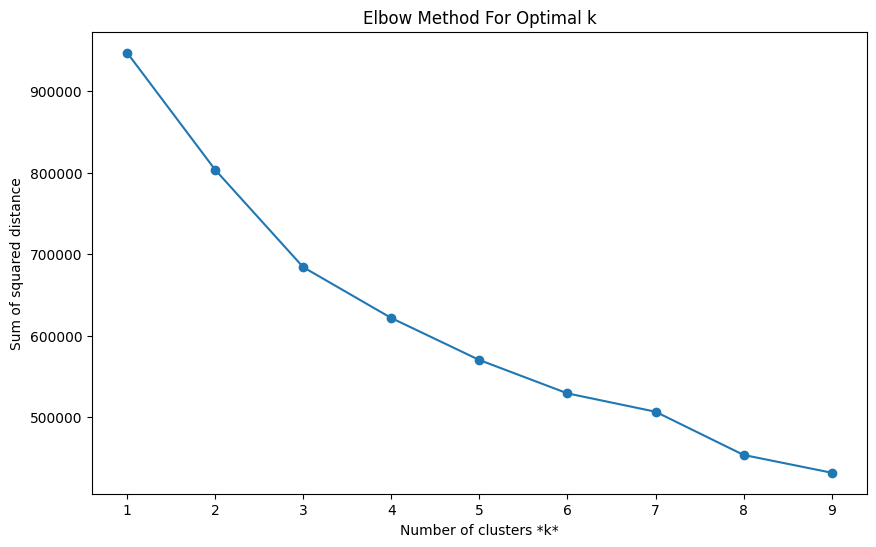

In [223]:
# Use the elbow method to find the optimal number of clusters
ssd = []
list_k = list(range(1, 10))
for k in list_k:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_X_kmeans)
    ssd.append(km.inertia_)

# Plot SSD for each *k*
plt.figure(figsize=(10, 6))
plt.plot(list_k, ssd, '-o')
plt.xlabel('Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.title('Elbow Method For Optimal k')
plt.show()

<Axes: >

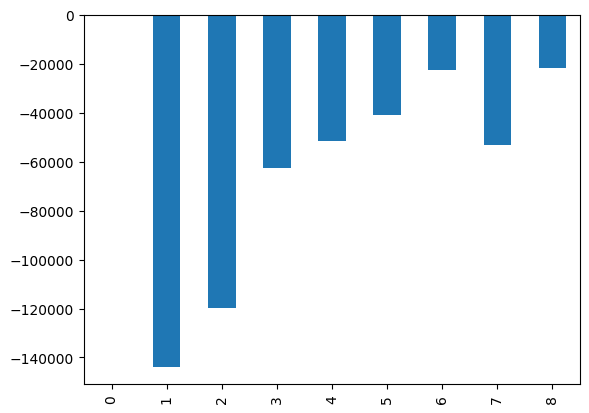

In [225]:
# Display the sum of squared distance in a barchart
pd.Series(ssd).diff().plot(kind='bar')

In [227]:
# Choose k after checking the elbow plot
k = 8
kmeans = KMeans(n_clusters=k, random_state=50)
kmeans.fit(scaled_X_kmeans)

KMeans(random_state=50)

In [229]:
# Assign clusters back to the DataFrame
X9['cluster'] = kmeans.labels_

In [231]:
len(scaled_X_kmeans)

157904

In [233]:
len(kmeans.labels_)

157904

In [235]:
# Check the dataframe to see if the cluster got added
X9.head()

age  race_eth density_c  resfnl_c3  cancscrfu1yr_c  \
0    6         1         4          1               0   
1    9         2         4          1               1   
2    7         5         2          0               1   
3    6         1         2          0               0   
4    7         2         3          0               1   

   riskBCSC_v2_5y_cat_numeric  cluster  
0                           1        5  
1                           4        2  
2                           1        7  
3                           2        3  
4                           4        2

In [237]:
X9.shape

(157904, 7)

<Axes: >

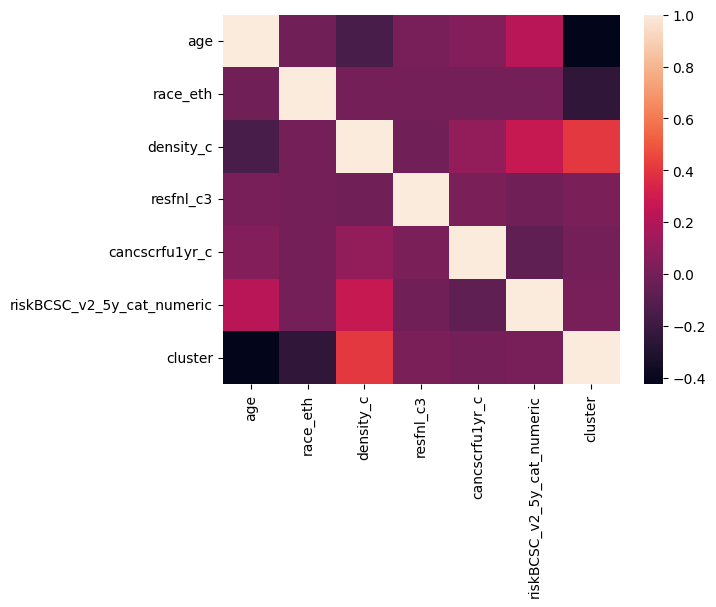

In [239]:
sns.heatmap(X9.corr())

In [241]:
X9.corr()['cluster']

age                          -0.426036
race_eth                     -0.246452
density_c                     0.406299
resfnl_c3                     0.020116
cancscrfu1yr_c               -0.001843
riskBCSC_v2_5y_cat_numeric    0.010503
cluster                       1.000000
Name: cluster, dtype: float64

<Axes: >

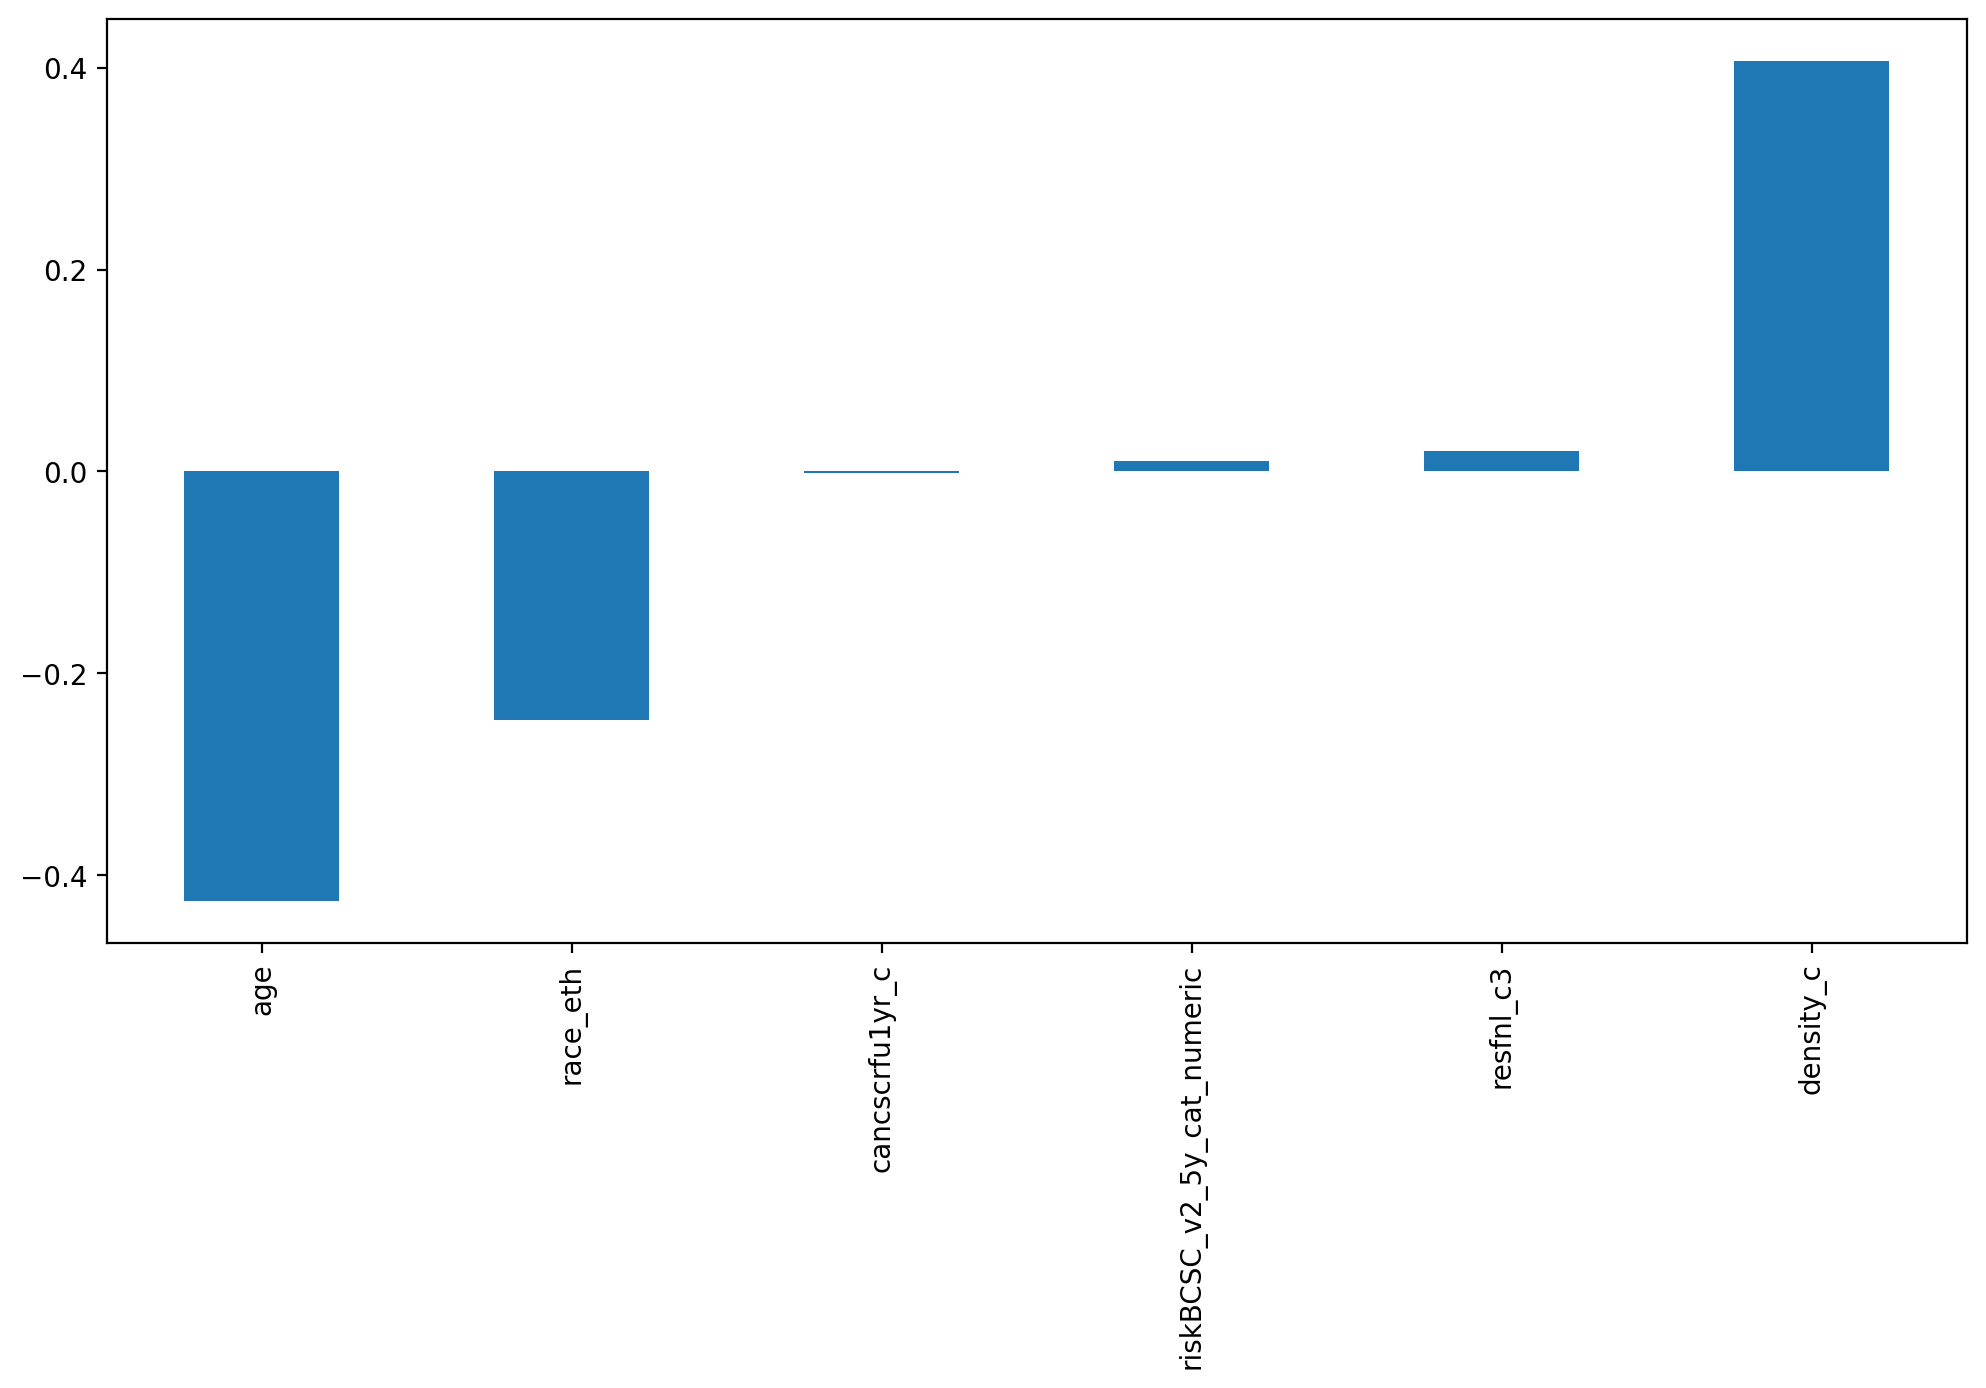

In [243]:
plt.figure(figsize=(12,6), dpi=200)
X9.corr()['cluster'].iloc[:-1].sort_values().plot(kind='bar')

cluster
1    24503
4    21320
7    21086
3    19847
0    19612
6    18053
2    16736
5    13705
Name: count, dtype: int64


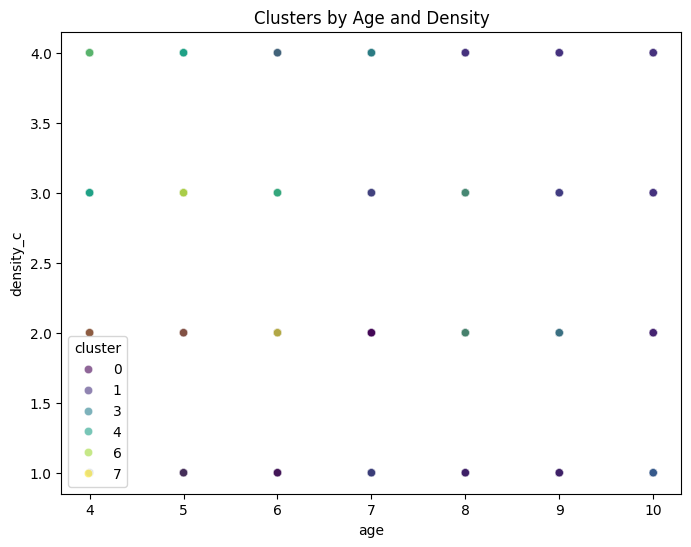

In [603]:
# Analyze cluster distribution
print(X9['cluster'].value_counts())

# Plotting the clusters to see distribution(with two variables age and density)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='density_c', hue='cluster', data=X9, palette='viridis', alpha=0.6)
plt.title('Clusters by Age and Density')
plt.show()

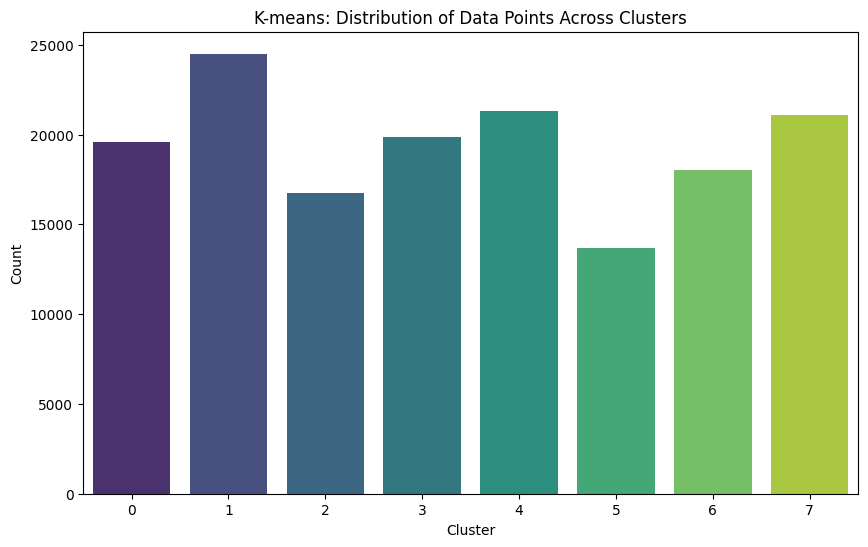

In [604]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=X9, palette='viridis')
plt.title('K-means: Distribution of Data Points Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [245]:
import pandas as pd

# Check if the dataframe 'X9' already includes the 'cluster' labels from the K-means clustering
# Group by the cluster labels and calculate mean for each cluster
cluster_means = X9.groupby('cluster').mean()

# Display the cluster means
print("Cluster Means:")
print(cluster_means)

Cluster Means:
              age  race_eth density_c  resfnl_c3  cancscrfu1yr_c  \
cluster                                                            
0        7.723730  2.818564  1.479991   0.647942        1.000000   
1        6.950763  8.860589  2.709613   0.511032        0.749698   
2        8.673912  2.800367  3.072218   0.267929        1.000000   
3        6.924616  2.842201  2.924398   0.000000        0.000000   
4        6.722218  2.931748  1.590566   0.484369        0.000000   
5        6.890470  2.830656    3.0514   1.000000        0.000000   
6        6.270353  2.806379  3.244556   1.000000        1.000000   
7        5.786780  2.831002  3.112963   0.000000        0.995881   

         riskBCSC_v2_5y_cat_numeric  
cluster                              
0                          0.756305  
1                          1.906208  
2                          3.052234  
3                          2.657727  
4                          0.672739  
5                          2.581077  


In [249]:
print(cluster_means.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         8 non-null      float64
 1   race_eth                    8 non-null      float64
 2   density_c                   8 non-null      object 
 3   resfnl_c3                   8 non-null      float64
 4   cancscrfu1yr_c              8 non-null      float64
 5   riskBCSC_v2_5y_cat_numeric  8 non-null      float64
dtypes: float64(5), object(1)
memory usage: 416.0+ bytes
None


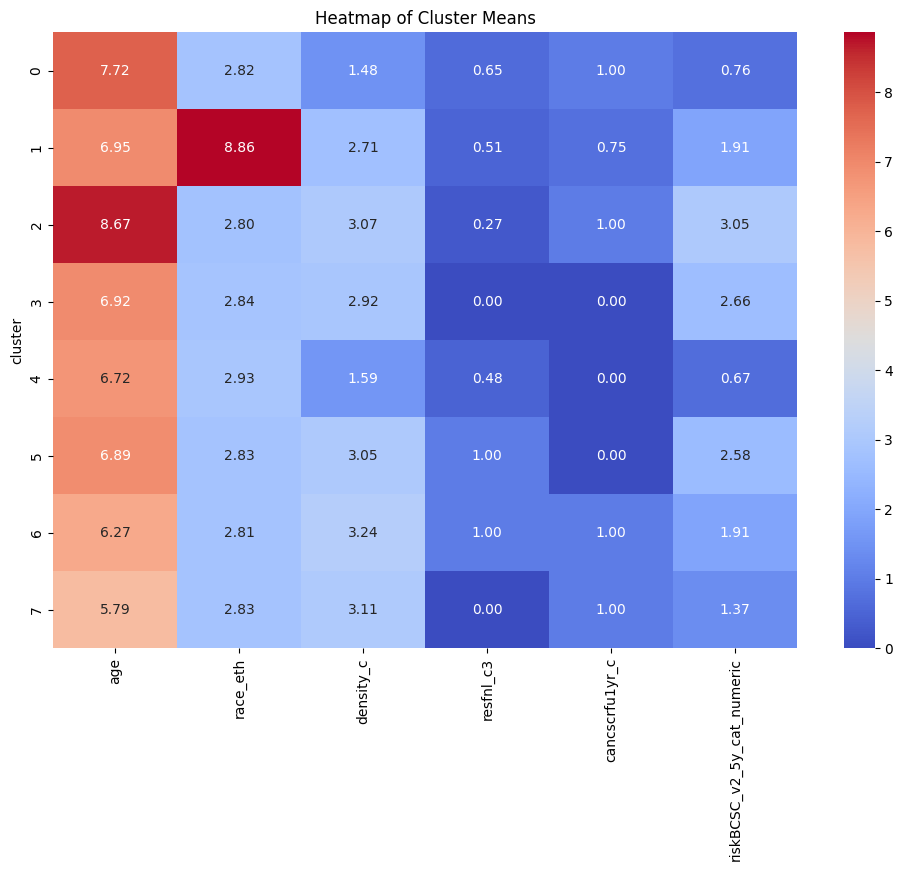

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert values to numeric, coercing errors 
cluster_means['density_c'] = pd.to_numeric(cluster_means['density_c'], errors='coerce')

# Create a heatmap of the cluster means
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Cluster Means')
plt.show()

In [ ]:
# import pandas as pd
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt

# # Step 1: Standardize the data
# scaler = StandardScaler()
# X9_scaled = scaler.fit_transform(X9)

# # Step 2: Determine the optimal number of clusters (K) using the Elbow Method
# # You can use the Elbow Method to find the optimal value of K
# # This step helps you choose the appropriate value of K (number of clusters)
# # by looking for the "elbow" point in the within-cluster sum of squares (WCSS) plot
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
#     kmeans.fit(X9_scaled)
#     wcss.append(kmeans.inertia_)

# # Plot the Elbow Method graph
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
# plt.title('Elbow Method')
# plt.xlabel('Number of Clusters (K)')
# plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
# plt.xticks(range(1, 11))
# plt.grid(True)
# plt.show()

# # Based on the Elbow Method, choose the optimal value of K
# # In this example, let's say we choose K=3

# # Step 3: Fit the K-means model to the data
# kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
# kmeans.fit(X9_scaled)

# # Step 4: Get cluster labels for each data point
# cluster_labels = kmeans.labels_

# # Step 5: Add cluster labels to the DataFrame
# X9['Cluster'] = cluster_labels

# # Step 6: Analyze the clusters (optional)
# # You can analyze the characteristics of each cluster by examining the centroids,
# # exploring cluster statistics, and visualizing cluster distributions.

# # Example: Visualizing clusters (for 2D data)
# plt.figure(figsize=(10, 6))
# plt.scatter(X9['age'], X9['bmi_curr'], c=X9['Cluster'], cmap='viridis')
# plt.title('K-means Clustering')
# plt.xlabel('Age')
# plt.ylabel('BMI')
# plt.show()

####Visualization for K-means clusters

In [615]:
# For K-means using X9
kmeans = KMeans(n_clusters=8, random_state=50)  # Adjust the number of clusters as determined
y_kmeans = kmeans.fit_predict(X9)
final_df['cluster'] = y_kmeans  # Ensure final_df includes all data

In [616]:
import pandas as pd

# Cross-tabulation for K-means clusters
ct_kmeans = pd.crosstab(final_df['cluster'], final_df['stage_advanced'])
print("Cross-tabulation for K-means clusters:")
print(ct_kmeans)

Cross-tabulation for K-means clusters:
stage_advanced      0      1
cluster                     
0                6793  10972
1                6839   5391
2               17076   9904
3                6730   6728
4               12069  16380
5                5792  12780
6               14302  10790
7                7830   4486


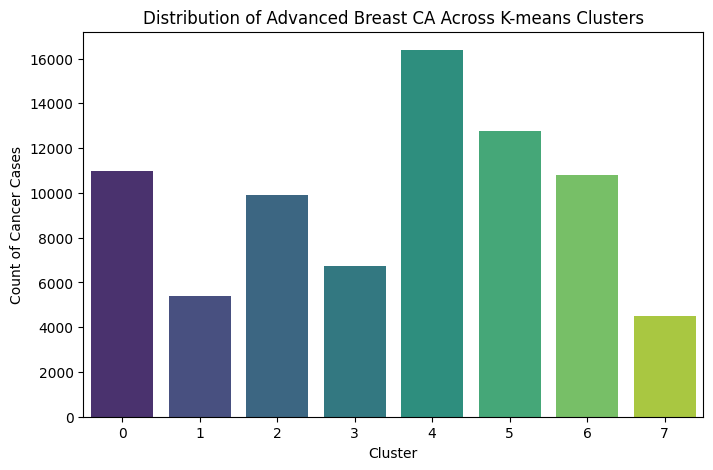

In [617]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization for K-means clusters
plt.figure(figsize=(8, 5))
sns.barplot(x=ct_kmeans.index, y=ct_kmeans[1], palette='viridis')  # '1' indicates cancer presence
plt.title('Distribution of Advanced Breast CA Across K-means Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count of Cancer Cases')
plt.show()

### Hierarchical Clustering

In [160]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import adjusted_rand_score

In [162]:
#  Standardize the data
from sklearn.preprocessing import StandardScaler

# Assign the features to a variable
X10 = final_df.drop('stage_advanced', axis=1)

# Initialize the StandardScaler
scaler_hcluster = StandardScaler()

# Fit and transform the features data to scale
X10_scaled = scaler_hcluster.fit_transform(X10)

**Dendrogram**

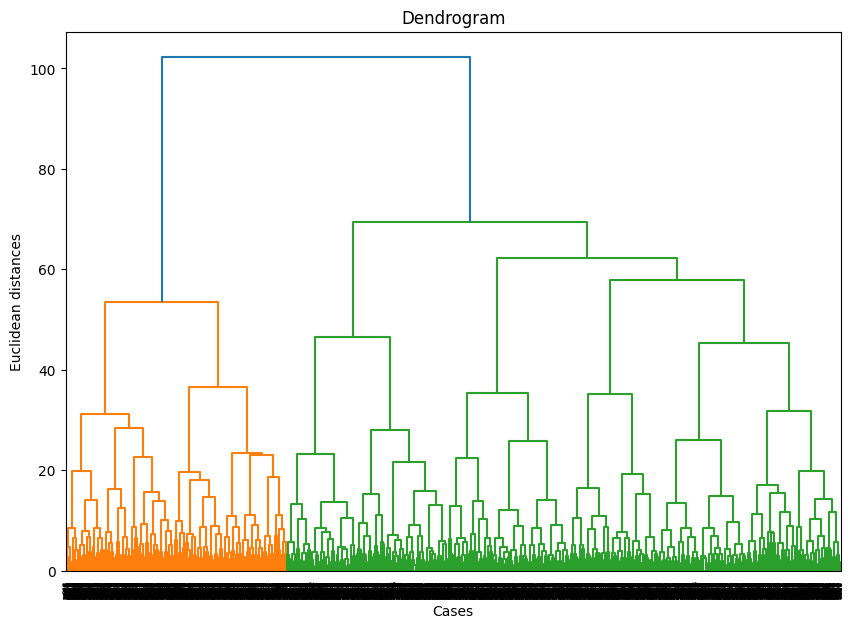

In [165]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

sample_size = 5000  # Adjust as needed
random_indices = np.random.choice(X10_scaled.shape[0], sample_size, replace=False)
X10_scaled_sample = X10_scaled[random_indices]

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X10_scaled_sample, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Cases')
plt.ylabel('Euclidean distances')
plt.show()

In [166]:
#Fit the Hierarchical Clustering Model. Chose 8 clusters from the dendrogram
hc = AgglomerativeClustering(n_clusters=8, linkage='ward')
y_hc_sample = hc.fit_predict(X10_scaled_sample)

# Assign cluster labels back for analysis
X10['cluster_hc'] = -1
X10.loc[X10.index[random_indices], 'cluster_hc'] = y_hc_sample


In [169]:
X10.head()

age  race_eth density_c  resfnl_c3  cancscrfu1yr_c  \
0    7         1         2          0               0   
1    5         9         2          0               0   
2    6         2         1          0               0   
3    8         2         1          1               1   
4    6         1         3          0               0   

   riskBCSC_v2_5y_cat_numeric  cluster_hc  
0                           1          -1  
1                           4          -1  
2                           3          -1  
3                           1          -1  
4                           1          -1

In [171]:
# Cluster counts
print(X10['cluster_hc'].value_counts())

# Cluster means
cluster_means_hc = X10.groupby('cluster_hc').mean()
print(cluster_means_hc)

cluster_hc
-1    150592
 1       786
 0       724
 5       701
 2       605
 3       591
 4       574
 7       568
 6       451
Name: count, dtype: int64
                 age  race_eth density_c  resfnl_c3  cancscrfu1yr_c  \
cluster_hc                                                            
-1          6.963318  3.367344  2.691796   0.518553        0.727901   
 0          6.881215  3.276243  2.569061   1.000000        0.000000   
 1          6.080153  3.436387  3.442748   0.000000        1.000000   
 2          6.814876  6.087603  3.016529   1.000000        1.000000   
 3          7.037225  3.348562  1.774958   0.000000        1.000000   
 4          9.163763  2.277003  2.891986   0.540070        1.000000   
 5          6.874465  3.282454  2.523538   0.000000        0.000000   
 6          7.000000  2.669623  1.549889   1.000000        1.000000   
 7          6.128521  1.772887  3.410211   1.000000        1.000000   

            riskBCSC_v2_5y_cat_numeric  
cluster_hc             

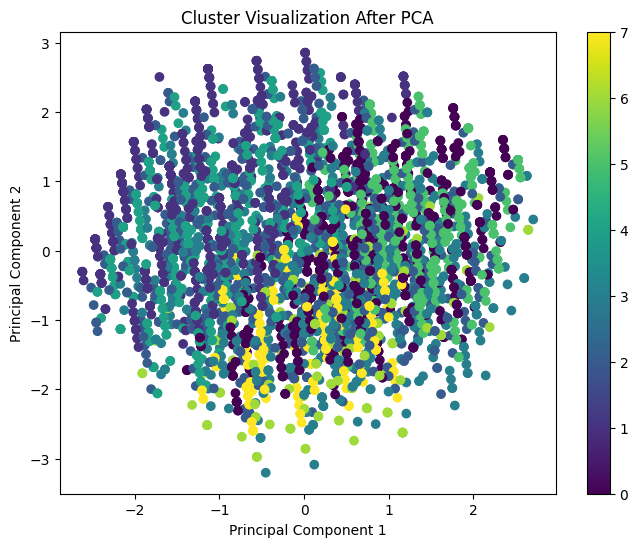

In [219]:
from sklearn.decomposition import PCA

pca_sample = PCA(n_components=2)
X10_pca_sample = pca_sample.fit_transform(X10_scaled_sample)

plt.figure(figsize=(8, 6))
plt.scatter(X10_pca_sample[:, 0], X10_pca_sample[:, 1], c=y_hc, cmap='viridis')
plt.title('Cluster Visualization After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

####Visualization for Hierarchical clusters

In [173]:
# For Hierarchical Clustering using X10
hc = AgglomerativeClustering(n_clusters=6, linkage='ward')
y_hc_sample = hc.fit_predict(X10_scaled_sample)

final_df['cluster_hc'] = -1

final_df.loc[final_df.index[random_indices], 'cluster_hc'] = y_hc_sample

In [175]:
import pandas as pd

# Cross-tabulation for Hierarchical clusters
ct_hierarchical = pd.crosstab(final_df['cluster_hc'], final_df['stage_advanced'])
print("\nCross-tabulation for Hierarchical clusters:")
print(ct_hierarchical)


Cross-tabulation for Hierarchical clusters:
stage_advanced      0      1
cluster_hc                  
-1              75249  75343
 0                320    722
 1                374    799
 2                724      0
 3                257    529
 4                171    403
 5                701      0


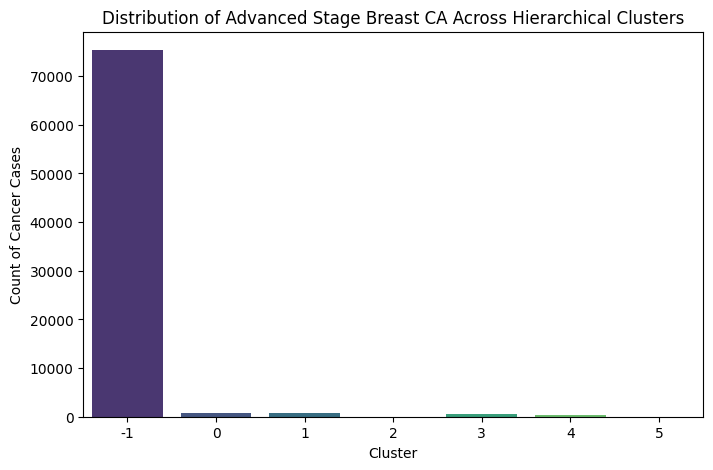

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization for Hierarchical clusters
plt.figure(figsize=(8, 5))
sns.barplot(x=ct_hierarchical.index, y=ct_hierarchical[1], palette='viridis') # '1' indicates cancer presence
plt.title('Distribution of Advanced Stage Breast CA Across Hierarchical Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count of Cancer Cases')
plt.show()

In [189]:
from sklearn.preprocessing import MinMaxScaler

In [191]:
scaler_hc1 = MinMaxScaler()

In [193]:
scaled_data_hc1 = scaler_hc1.fit_transform(X10)

In [195]:
scaled_data_hc1

array([[0.5       , 0.        , 0.33333333, ..., 0.        , 0.25      ,
        0.        ],
       [0.16666667, 1.        , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.125     , 0.        , ..., 0.        , 0.75      ,
        0.        ],
       ...,
       [0.5       , 0.5       , 0.66666667, ..., 1.        , 0.25      ,
        0.        ],
       [0.5       , 1.        , 0.33333333, ..., 1.        , 0.25      ,
        0.        ],
       [0.83333333, 0.25      , 1.        , ..., 1.        , 0.5       ,
        0.        ]])

In [197]:
scaled_df_hc1 = pd.DataFrame(scaled_data_hc1,columns=X10.columns)

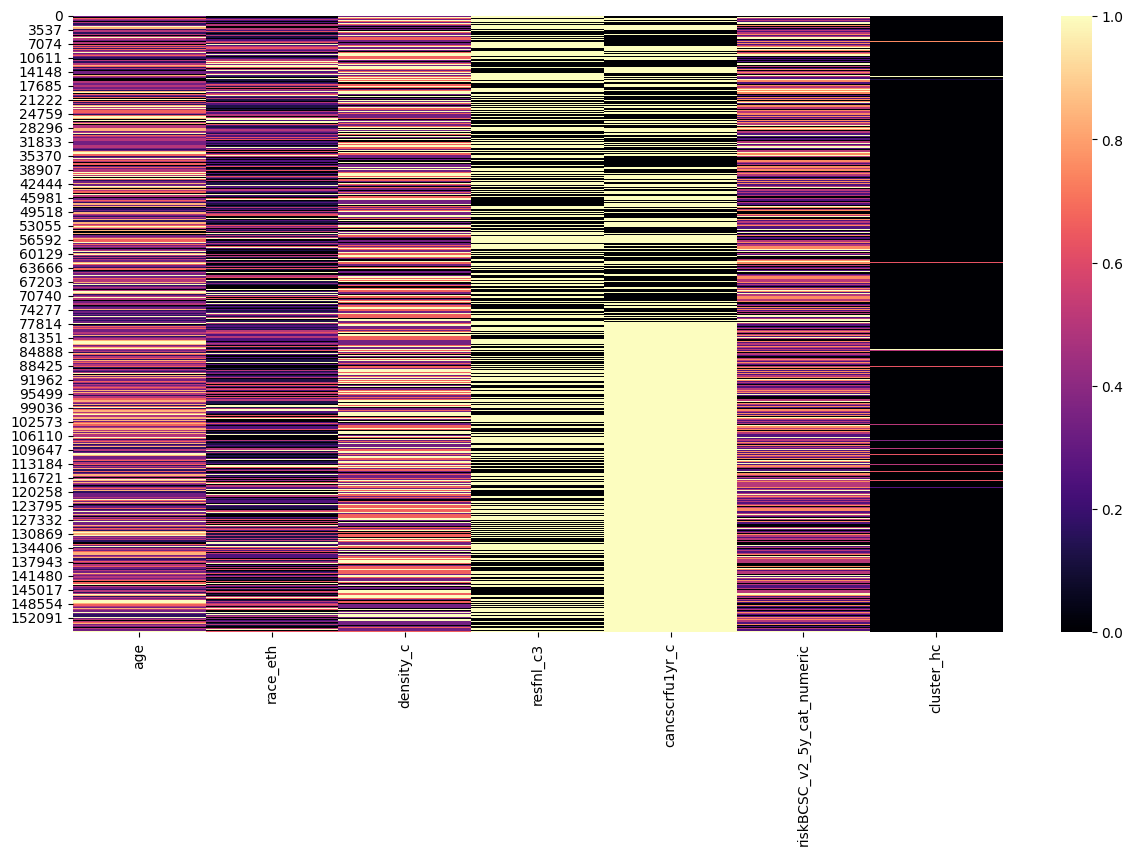

In [199]:
plt.figure(figsize=(15,8))
sns.heatmap(scaled_df_hc1,cmap='magma');

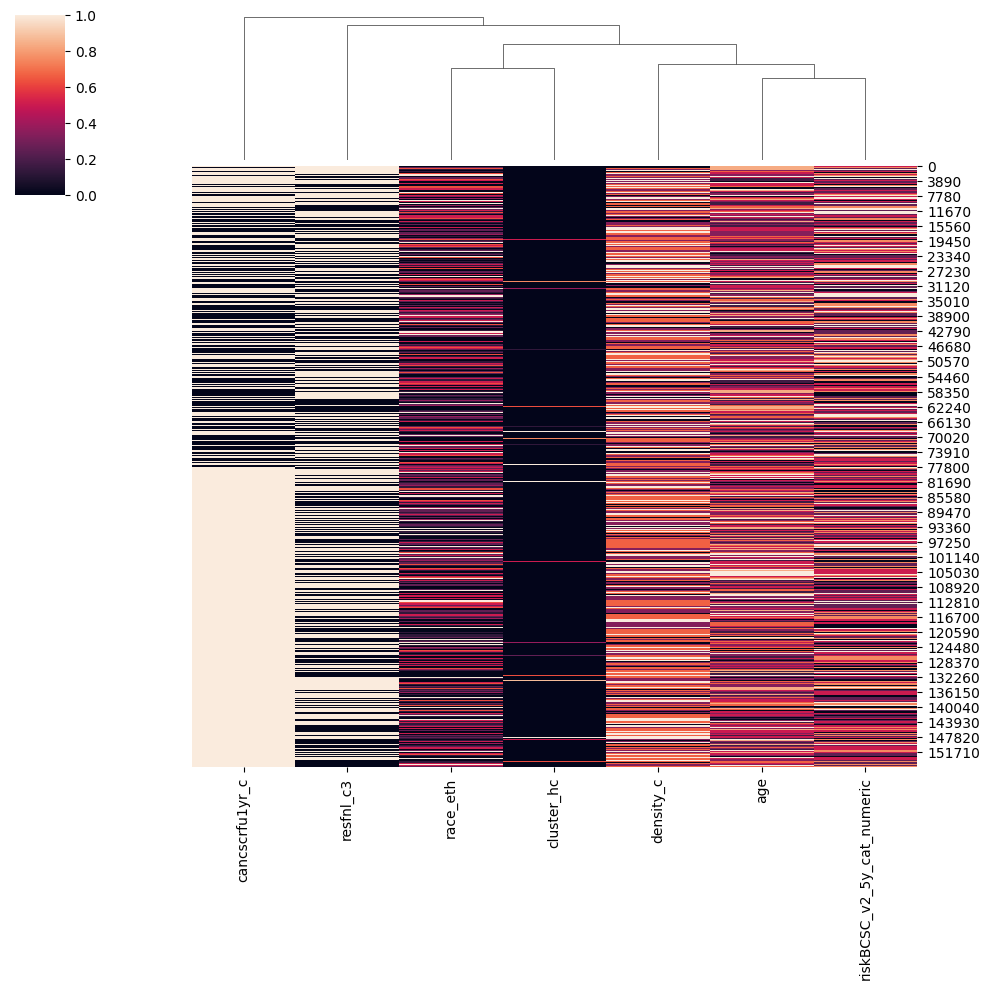

In [201]:
sns.clustermap(scaled_df_hc1,row_cluster=False)

**Using Scikit-Learn**

In [204]:
from sklearn.cluster import AgglomerativeClustering

In [206]:
model_hc1 = AgglomerativeClustering(n_clusters=8)

In [208]:
sample_size = 10000  # adjust to a reasonable size for your computer
if scaled_df_hc1.shape[0] > sample_size:
    scaled_df_hc1_sample = scaled_df_hc1.sample(n=sample_size, random_state=42)
    cluster_labels_hc1_sample = model_hc1.fit_predict(scaled_df_hc1_sample)  
    sample_indices = scaled_df_hc1.index.get_indexer(scaled_df_hc1_sample.index)
else:
    cluster_labels_hc1_sample = model_hc1.fit_predict(scaled_df_hc1)  
    sample_indices = np.arange(scaled_df_hc1.shape[0]) 

In [210]:
cluster_labels_hc1_sample

array([0, 7, 3, ..., 5, 3, 6])

In [212]:
X10['cluster_hc'] = -1  # Initialize the column with a default value
X10.loc[X10.index[sample_indices], 'cluster_hc'] = cluster_labels_hc1_sample


<Axes: xlabel='age', ylabel='density_c'>

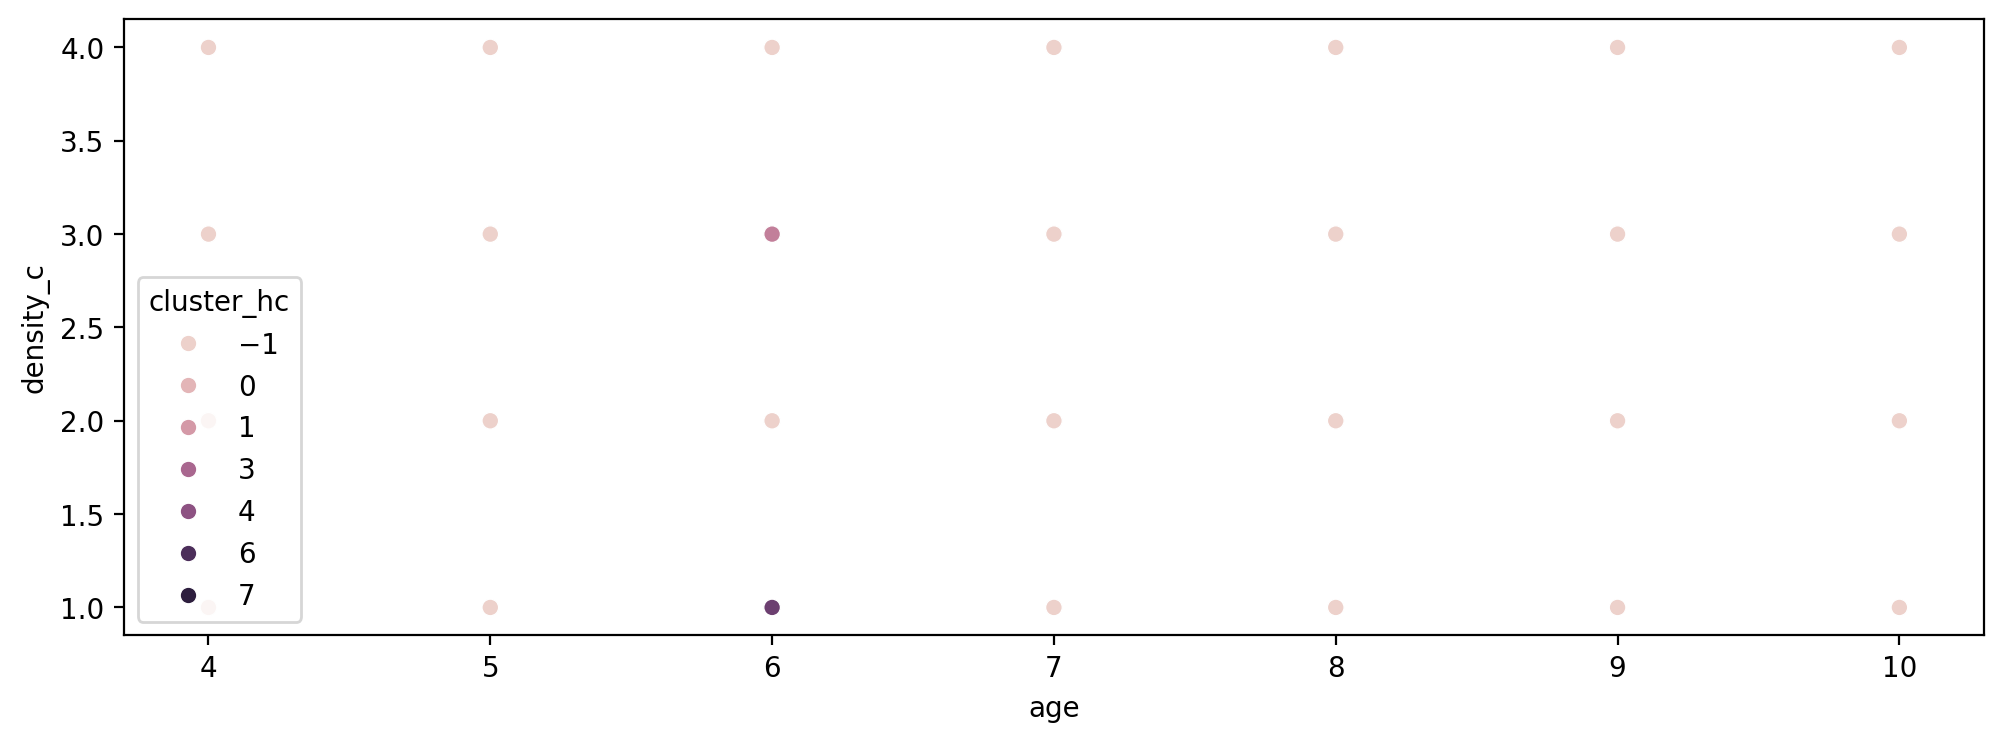

In [214]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(data=X10,x='age',y='density_c',hue= 'cluster_hc')

##### Exploring Number of Clusters with Dendrograms

In [217]:
model_hc2 = AgglomerativeClustering(n_clusters=None,distance_threshold=0)

In [219]:
cluster_labels_hc2 = model_hc2.fit_predict(scaled_df_hc1_sample)

In [221]:
cluster_labels_hc2

array([9999, 9998, 9997, ...,    2,    1,    0])

In [223]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

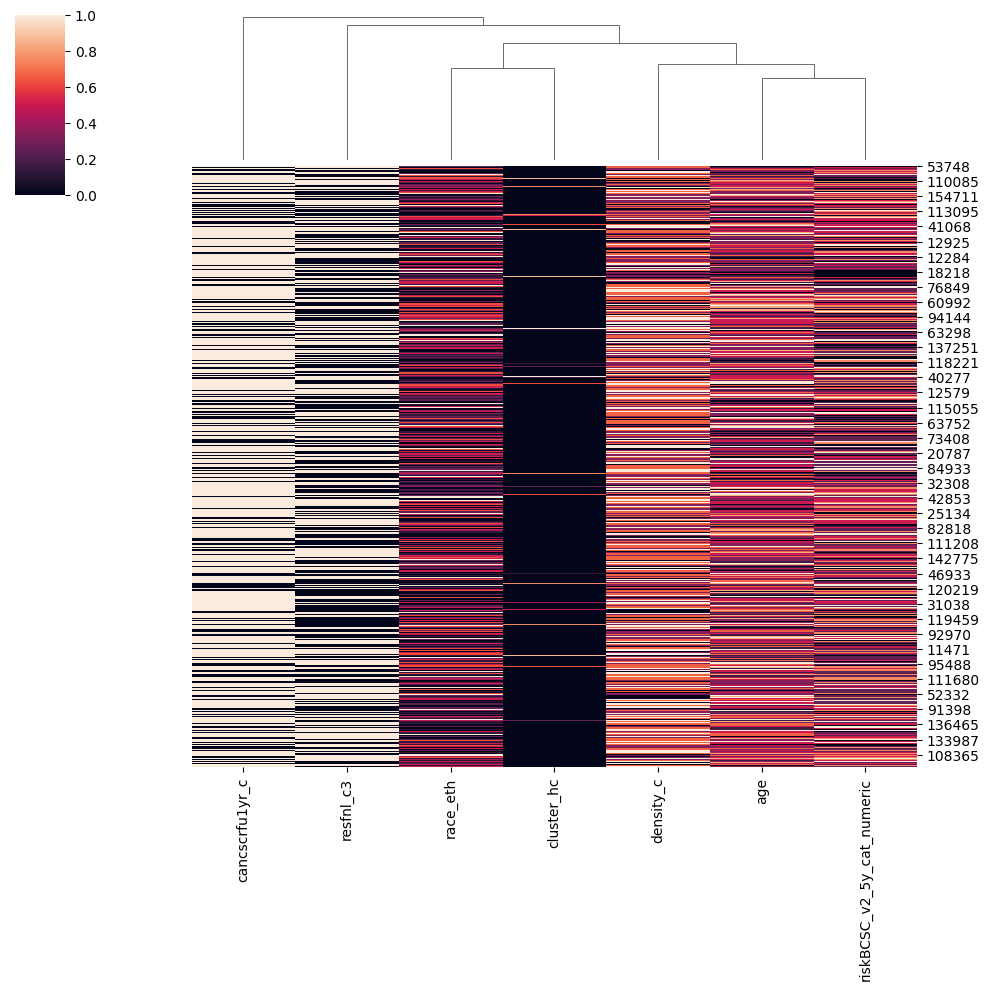

In [225]:
sns.clustermap(scaled_df_hc1_sample,row_cluster=False)

In [227]:
cluster_labels_hc2

array([9999, 9998, 9997, ...,    2,    1,    0])

In [229]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

##### Linkage Model

In [232]:
linkage_matrix_hc1 = hierarchy.linkage(model_hc2.children_)

In [234]:
linkage_matrix_hc1

array([[1.06600000e+03, 1.06700000e+03, 1.41421356e+00, 2.00000000e+00],
       [1.24200000e+03, 2.30300000e+03, 1.41421356e+00, 2.00000000e+00],
       [2.13400000e+03, 2.43000000e+03, 1.41421356e+00, 2.00000000e+00],
       ...,
       [1.99920000e+04, 1.99930000e+04, 6.34104881e+02, 9.99700000e+03],
       [9.53500000e+03, 1.99940000e+04, 8.11160280e+02, 9.99800000e+03],
       [9.41000000e+03, 1.99950000e+04, 9.54541251e+02, 9.99900000e+03]])

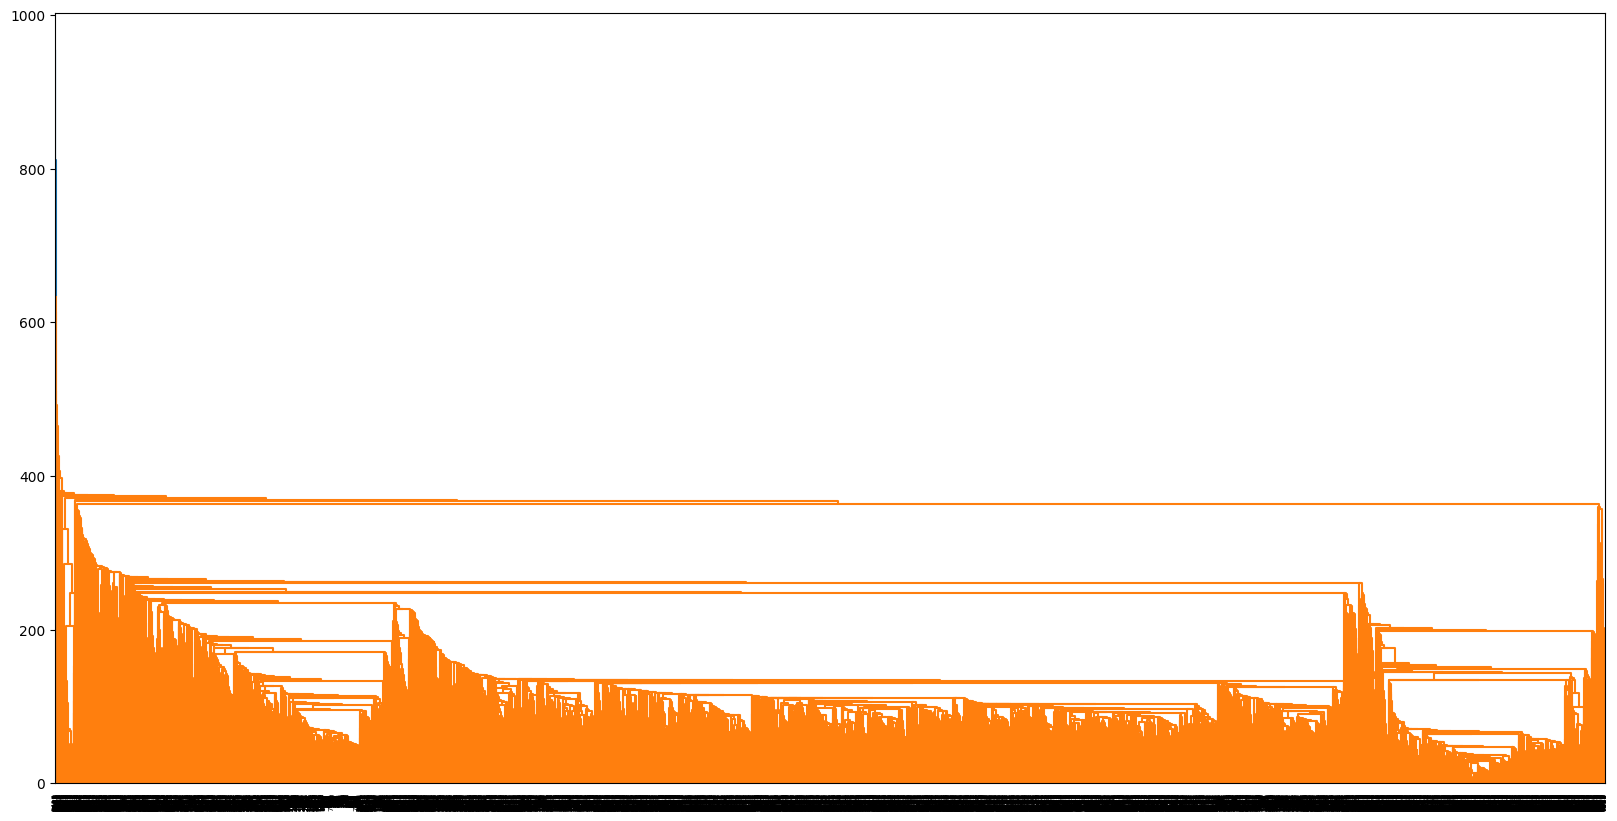

In [236]:
plt.figure(figsize=(20,10))
# Warning! This plot will take awhile!!
dn = hierarchy.dendrogram(linkage_matrix_hc1)

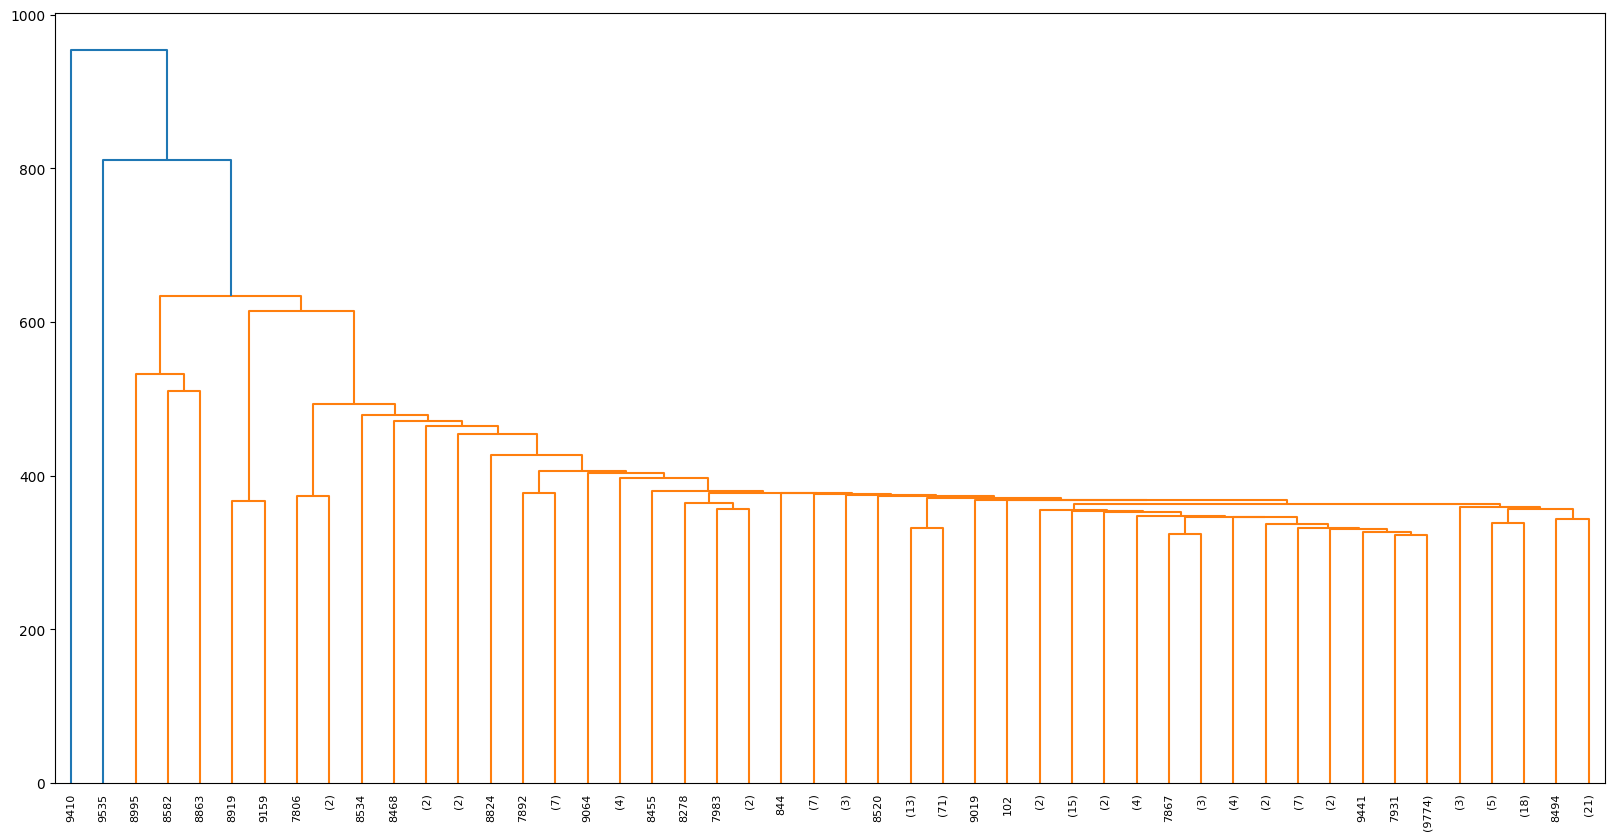

In [238]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix_hc1,truncate_mode='lastp',p=48)

##### Threshold Distance


**Distance between two points**

In [242]:
scaled_df_hc1_sample.describe()

age      race_eth     density_c     resfnl_c3  cancscrfu1yr_c  \
count  10000.000000  10000.000000  10000.000000  10000.000000    10000.000000   
mean       0.495367      0.297463      0.564333      0.515500        0.731000   
std        0.286168      0.303096      0.341411      0.499785        0.443462   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%        0.333333      0.000000      0.333333      0.000000        0.000000   
50%        0.500000      0.250000      0.666667      1.000000        1.000000   
75%        0.666667      0.500000      1.000000      1.000000        1.000000   
max        1.000000      1.000000      1.000000      1.000000        1.000000   

       riskBCSC_v2_5y_cat_numeric    cluster_hc  
count                10000.000000  10000.000000  
mean                     0.460025      0.018650  
std                      0.324644      0.112515  
min                      0.000000      0.000000  
25%                      0.250000      0.000000  
50%                      0.500000      0.000000  
75%                      0.750000      0.000000  
max                      1.000000      1.000000

In [244]:
scaled_df_hc1_sample['age'].idxmax()

130215

In [246]:
scaled_df_hc1_sample['density_c'].idxmin()

5071

In [248]:
# Euclidean distance calculated with numpy
a = scaled_df_hc1_sample.iloc[1097]
b = scaled_df_hc1_sample.iloc[0]
dist = np.linalg.norm(a-b)

In [250]:
dist

1.14564392373896

**Maximum distance possible**

In [253]:
np.sqrt(len(scaled_df_hc1_sample.columns))

2.6457513110645907

#####Model Creation

**Creating a Model Based on Distance Threshold**

In [257]:
model_hc2 = AgglomerativeClustering(n_clusters=None,distance_threshold=2)

In [259]:
cluster_labels_hc2 = model_hc2.fit_predict(scaled_df_hc1_sample)

In [261]:
cluster_labels_hc2

array([193,  42,   3, ..., 181, 103,  65])

In [263]:
np.unique(cluster_labels_hc2)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

#####Linkage Matrix

In [266]:
linkage_matrix_hc2 = hierarchy.linkage(model_hc2.children_)

In [268]:
linkage_matrix_hc2

array([[1.06600000e+03, 1.06700000e+03, 1.41421356e+00, 2.00000000e+00],
       [1.24200000e+03, 2.30300000e+03, 1.41421356e+00, 2.00000000e+00],
       [2.13400000e+03, 2.43000000e+03, 1.41421356e+00, 2.00000000e+00],
       ...,
       [1.99920000e+04, 1.99930000e+04, 6.34104881e+02, 9.99700000e+03],
       [9.53500000e+03, 1.99940000e+04, 8.11160280e+02, 9.99800000e+03],
       [9.41000000e+03, 1.99950000e+04, 9.54541251e+02, 9.99900000e+03]])

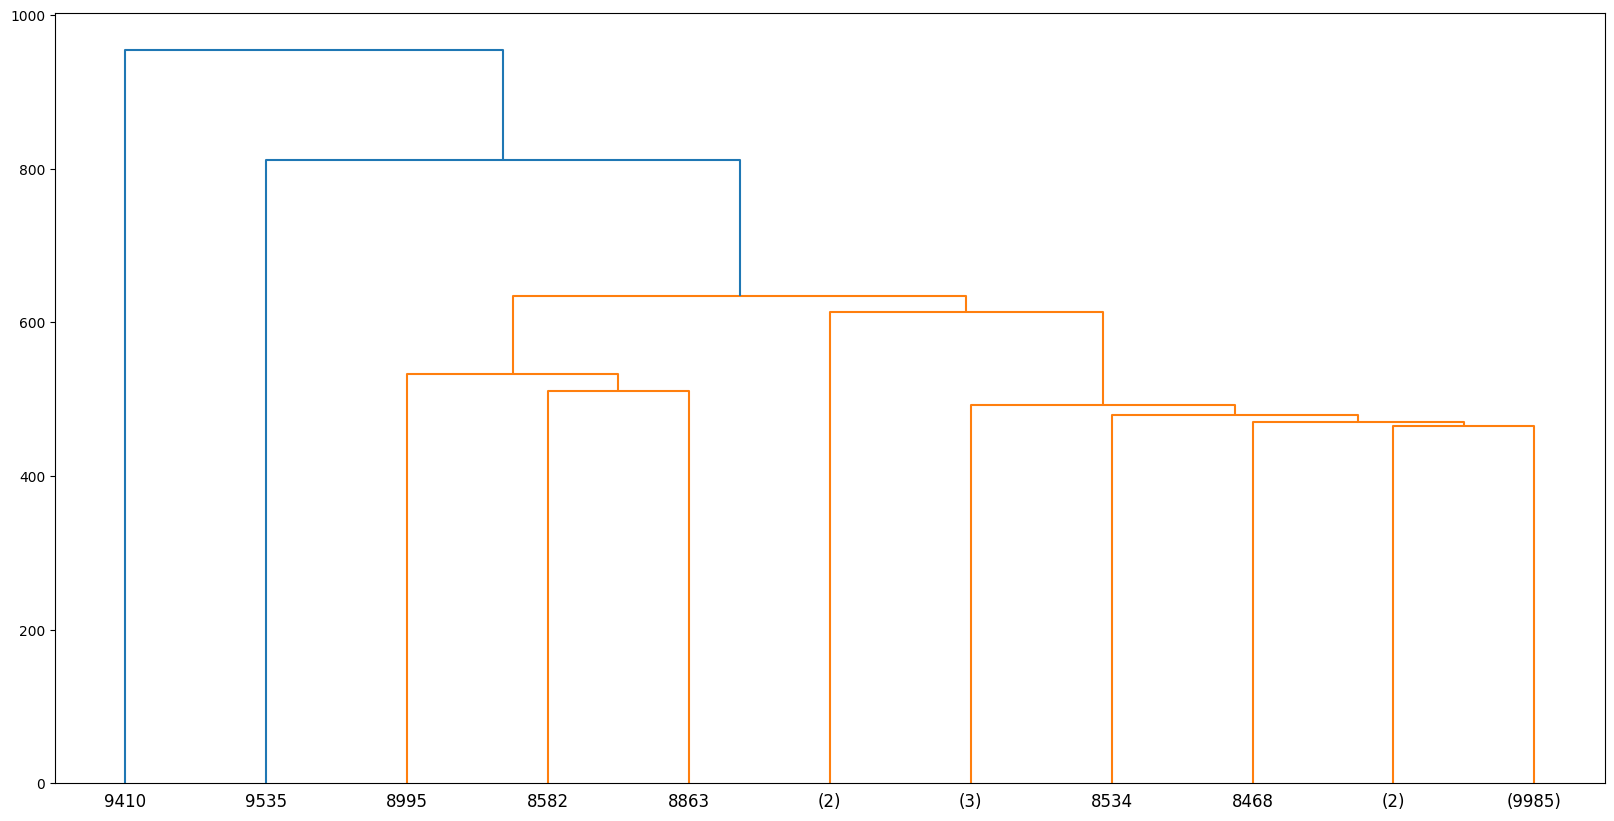

In [270]:
plt.figure(figsize=(20,10))
dn_hc2 = hierarchy.dendrogram(linkage_matrix_hc2,truncate_mode='lastp',p=11)